<!DOCTYPE html>
<html>
<head>
<style>
    .header-banner {
        background-color: white;
        color: black; 
        padding: 1rem; 
        font-family: 'Nunito', sans-serif;
    }
    .header-content {
        max-width: 2000px;
        margin: 0 auto;
        display: flex;
        align-items: center;
        gap: 2rem;
    }
    .logo {
        max-width: 160px;
    }
    .text-content {
        flex: 1;
    }
    .text-content h1 {
        font-size: 34px;
        margin: 0 0 10px;
        font-weight: 700;
        color: #7e4d02ff;
        border-bottom: 2px solid #e5c120ff;
        padding-bottom: 10px;
    }
    .text-content h2 {
        font-size: 21px;
        margin: 0 0 5px;
        font-weight: 600;
        color: #222;
    }
    .member-list {
        display: grid;
        grid-template-columns: repeat(2, auto);
        gap: 6px 40px;
        font-size: 17px;
        color: #444;
    }
    .member {
        position: relative;
        padding-left: 20px;
    }
</style>
<link rel="preconnect" href="https://fonts.googleapis.com">
<link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
<link href="https://fonts.googleapis.com/css2?family=Nunito:wght@400;700&display=swap" rel="stylesheet">
</head>
<body>

<header class="header-banner">
    <div class="header-content">
        <img src="https://i.ibb.co/JBPWVYR/Logo-Nova-IMS-Black.png" alt="NOVA IMS Logo" class="logo">
        <div class="text-content">
            <h1>Cars 4 You: Expediting Car Evaluations with ML</h1>
            <h2>Group 37</h2>
            <div class="member-list">
                <div class="member">Filipa Pereira, 20240509</div>
                <div class="member">Gonçalo Silva, 20250354</div>
                <div class="member">Marta La Feria, 20211051 </div>
                <div class="member">Tomás Coroa, 20250394 </div>
            </div>
        </div>
    </div>
</header>

</body>
</html>

<div style="background-color:#e4b3c2ff; border:1.5px solid #e4b3c2ff; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

- FALAR SOBRE O **CRISP-DM** + PAPER + GRÁFICO/IMAGEM + INDEX + EDA
- **ABSTRACT**: 200 to 300 words. What is the context? What are your goals? What did you do? What were your main results, and what conclusions did you draw from them?
- Group Member **CONTRIBUTIONS**
- model assessment strategy that allows you to create and compare different candidate models to identify the most generalizable one. 
- best (or set of best) model(s) -> explore ways to improve their performance (e.g. hyperparameter tuning or pre-processing/feature selection adjustments)
- VER A CONSISTÊNCIA DAS FUNÇÕES COM INPUT DEFINIDO OU NÃO

<br><br>
- Será que interessa a data? database from 2020
- Procurar a real base de dados
</div>

# <span style="color: #ffffff;">1 | Identifying Business Needs</span>

<div style="background-color:#e5c120ff; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px rgba(227, 167, 108, 1);">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: #644712ff;"><b>1 | Identifying Business Needs</b></span>
    </h1>
</div>
<br>
<div style="background-color:#e4b3c2ff; border:1.5px solid #e4b3c2ff; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

- Overview and main goals of the project
- Description of the overall process and identification of model assessment approach adopted in the work (CV, LOO, Holdout, etc...
</div>

<br>

**Cars 4 You** is an online car resale company that buys vehicles from multiple brands and resells them for profit. Currently, cars must be inspected by mechanics before purchase, but growing demand has created long waiting lists. This delays the process and drives potential customers to competitors. The company’s main business need is to speed up car evaluations by developing a **predictive model that can estimate car prices directly from user-provided information**, without requiring a mechanic’s inspection. <br>
We have available the following attributes:

<div style="display: flex; justify-content: center; margin-top: 20px;">


|       | **Attribute**                               | **Description**                                                                  |
|-------|--------------------------------------------|---------------------------------------------------------------------------------|
| **0** | `carID`                               | An attribute that contains an identifier for each car                                                     |
| **1** | `Brand`                                 | The car’s main brand (e.g. Ford, Toyota)                                                               |
| **2** | `model`                              | The car model                                  |
| **3** | `year` | The year of Registration of the Car                   |
| **4** | `mileage`               |     The total reported distance travelled by the car (in miles)               |  
| **5** | `tax`                        | The amount of road tax (in £) that, in 2020, was applicable to the car in question                            |
| **6** | `fuelType`                         | Type of Fuel used by the car (Diesel, Petrol, Hybrid, Electric)                             |
| **7** | `mpg`                                   | Average Miles per Gallon                                      |
| **8** | `engineSize`                                    | Size of Engine in liters (Cubic Decimeters)                                       |
| **9** | `paintQuality%`                                    | The mechanic’s assessment of the cars’ overall paint quality and hull integrity (filled by the mechanic during evaluation)                                       |
| **10**| `previousOwners`                                | Number of previous registered owners of the vehicle                                   |
| **11**| `hasDamage`     | Boolean marker filled by the seller at the time of registration stating whether the car is damaged or not                 |
| **12**| `price`                        | The car’s price when purchased by Cars 4 You (in £)                           |


</div  >

<div style="background-color:#e5c120ff; padding:1px; border-radius:10px;">
</div>

In [ ]:
import pandas as pd
import numpy as np

# For the split
from sklearn.model_selection import train_test_split

# To deal with inconsistencies
#from rapidfuzz import process
from datetime import datetime
import unicodedata, re, difflib
from difflib import SequenceMatcher

#To define functions
from typing import Optional

from collections import defaultdict

# For EDA
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from wordcloud import WordCloud

# For encoding categorical variables
from sklearn.preprocessing import OneHotEncoder

# For scaling
from sklearn.preprocessing import StandardScaler

# Disable FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set the style of the visualization
pd.set_option('display.float_format', lambda x: '%.2f' % x) # display floats with 2 decimal places

# for better resolution plots
%config InlineBackend.figure_format = 'retina'

# Setting seaborn style
plt.style.use('ggplot')
sns.set_theme(style='white')

In [2]:
### APAGAR ###
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn
#!pip install scikit-learn
### APAGAR ### !pip install rapidfuzz
#              !pip install thefuzz
#!pip install wordcloud

In [ ]:
# Load both training and testing datasets
car_eval = pd.read_csv('Data/train.csv')
X_test = pd.read_csv('Data/test.csv')

### APAGAR ### EXPLICAR COMO SE CHEGA A EXTRAIR ESTE CSV
# brand_model_dic = pd.read_csv('../project_data/brands_models.csv')

# <span style="color: #ffffff;">2 |  Data Exploration and Preprocessing</span>

<div style="background-color:#e5c120ff; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px rgba(227, 167, 108, 1);">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: #644712ff;"><b>2 | Data Exploration and Preprocessing</b></span>
    </h1>
</div>
<br>

<div style="background-color:#e4b3c2ff; border:1.5px solid #e4b3c2ff; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

- Description of data received -> key insights
 - Steps taken to clean and prepare the data based on exploration
<br><br><br>
 - Check data contents, provide descriptive statistics and check for inconsistencies in the data.
 - Explore data visually and extract relevant insights. Explain your rationale and findings. Do not forget to analyse multivariate relationships.
 - Are there any missing values? Take action to handle them.
 - Check the dataset for outliers and pre-process them. Justify your decisions.
 - Deal with categorical variables.
 - Review current features and create extra features if needed. Explain your steps.
 - Perform data scaling. Explain the reasoning behind your choices.
 <br><br>

 - Define and implement a clear and unambiguous strategy for **feature selection**. Use the methods discussed in the course. Present and justify your final selection.

</div>


## <span style="color: #ffffff;">2.1 |  Data Content</span>

<div style="background-color:#644712c5; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2.1 | Data Content</b></span>
    </h1>
</div>

In [3]:
car_eval.head()

carID   Brand      model    year  price transmission  mileage fuelType  \
0  69512      VW       Golf 2016.00  22290    Semi-Auto 28421.00   Petrol   
1  53000  Toyota      Yaris 2019.00  13790       Manual  4589.00   Petrol   
2   6366    Audi         Q2 2019.00  24990    Semi-Auto  3624.00   Petrol   
3  29021    Ford     FIESTA 2018.00  12500        anual  9102.00   Petrol   
4  10062     BMW   2 Series 2019.00  22995       Manual  1000.00   Petrol   

     tax   mpg  engineSize  paintQuality%  previousOwners  hasDamage  
0    NaN 11.42        2.00          63.00            4.00       0.00  
1 145.00 47.90        1.50          50.00            1.00       0.00  
2 145.00 40.90        1.50          56.00            4.00       0.00  
3 145.00 65.70        1.00          50.00           -2.34       0.00  
4 145.00 42.80        1.50          97.00            3.00       0.00

In [4]:
X_test.head()

carID    Brand         model    year transmission   mileage fuelType  \
0   89856  Hyundai           I30 2022.88    Automatic  30700.00   petrol   
1  106581       VW        Tiguan 2017.00    Semi-Auto -48190.66   Petrol   
2   80886      BMW      2 Series 2016.00    Automatic  36792.00   Petrol   
3  100174     Opel   Grandland X 2019.00       Manual   5533.00   Petrol   
4   81376      BMW      1 Series 2019.00    Semi-Auto   9058.00   Diesel   

     tax   mpg  engineSize  paintQuality%  previousOwners  hasDamage  
0 205.00 41.50        1.60          61.00            3.00       0.00  
1 150.00 38.20        2.00          60.00            2.00       0.00  
2 125.00 51.40        1.50          94.00            2.00       0.00  
3 145.00 44.10        1.20          77.00            1.00       0.00  
4 150.00 51.40        2.00          45.00            4.00       0.00

It is useful to use `.head()` function to get an overview of the variables and their contents, as well as a first impression of the preprocessing steps that will be required.

<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

By observing just a few rows, we can already identify both categorical and numerical variables. Since categorical variables are present, we know that some type of encoding will be required before using them in the model. Some of the numerical variables (like `year` and `previousOwners`) should not be treated as continuous . It is also noticeable that there are missing values, at least in the variable `tax`. Additionally, there are some spelling errors and inconsistencies in text formatting, such as differences in lowercase and uppercase (ex: `transmission` includes both "Manual" and "anual").
</div>


In [5]:
car_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    74451 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        74462 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


In [6]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32567 entries, 0 to 32566
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           32567 non-null  int64  
 1   Brand           31918 non-null  object 
 2   model           31917 non-null  object 
 3   year            31914 non-null  float64
 4   transmission    31944 non-null  object 
 5   mileage         31878 non-null  float64
 6   fuelType        31911 non-null  object 
 7   tax             29259 non-null  float64
 8   mpg             29279 non-null  float64
 9   engineSize      31939 non-null  float64
 10  paintQuality%   31942 non-null  float64
 11  previousOwners  31970 non-null  float64
 12  hasDamage       31970 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 3.2+ MB


It is also useful to use the `.info()` function to check the data types of each variable and identify the presence of missing values, which helps to plan the necessary preprocessing steps.
<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

The train and test datasets contain the same variables, except for the target variable `price`, as expected. The data types are consistent across both datasets, however, some issues are present.

The training set contains 75,973 records and all variables have missing values except for the identifier `carID` and the target variable `price`.
The test set contains 32,567 records and also shows missing values in all variables except for the identifier `carID`.

Moreover, it can be noted that the variables `year` and `previousOwners` should indeed be numeric, but of integer type (int64) rather than continuous (float64). The variable `hasDamage` should be boolean, as a car either has damage or it does not. Finally, `carID` should be categorical, but since it is a unique identifier and will not be used in the model, there is no need to modify its data type.

</div>


In [7]:
#Check for duplicates
print(f"Total duplicates: {car_eval.duplicated().sum()}")
#Check for duplicates without the carID column
print(f"Duplicates without carID: {car_eval.drop(columns=['carID']).duplicated().sum()}")
#Check for duplicates without the price column
print(f"Duplicates without price and carID: {car_eval.drop(columns=['price', 'carID']).duplicated().sum()}")

# Repeat for the test set
print(f"Total duplicates in test set: {X_test.duplicated().sum()}")
print(f"Duplicates without carID in test set: {X_test.drop(columns=['carID']).duplicated().sum()}")

Total duplicates: 0
Duplicates without carID: 4
Duplicates without price and carID: 11
Total duplicates in test set: 0
Duplicates without carID in test set: 0


In [47]:
### APAGAR MAYBE ###

# # Duplicates without carID
# dup_no_id = car_eval[car_eval.drop(columns=['carID']).duplicated(keep=False)]
# print("\nDuplicates without carID:")
# display(dup_no_id.sort_values(by=dup_no_id.columns.tolist()))

# # Duplicates without price and carID
# dup_no_id_price = car_eval[car_eval.drop(columns=['price', 'carID']).duplicated(keep=False)]
# print("\nDuplicates without price and carID:")
# display(dup_no_id_price.sort_values(by=dup_no_id_price.columns.tolist()))

<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

We can see that although there are no duplicates when considering all columns, there are 4 duplicates in the training set when the `carID` column is excluded. We consider these to be true duplicates and therefore remove them.
Additionally, there are 11 duplicates when excluding both `carID` and `price`. Since `carID` is only an identifier and not an input variable, having identical inputs with different target values would confuse the model; there would be no apparent reason for predicting different prices. This increases noise and reduces the model’s generalization ability, so these duplicates are also removed.
</div>

In [8]:
# Remove duplicates without considering carID and then without considering price and carID
car_eval = car_eval.drop_duplicates(subset=car_eval.columns.difference(['carID']))
car_eval = car_eval.drop_duplicates(subset=car_eval.columns.difference(['carID', 'price']))

print(f"Duplicates without carID: {car_eval.drop(columns=['carID']).duplicated().sum()}")
print(f"Duplicates without price and carID: {car_eval.drop(columns=['price', 'carID']).duplicated().sum()}")

Duplicates without carID: 0
Duplicates without price and carID: 0


In [49]:
### APAGAR ###
# # duplicates that have all the same values in mileage,tax, mpg, engineSize, paintQuality% and previousOwners
# duplicates_idx = car_eval.duplicated(subset=['mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners'],keep=False)
# pd.set_option('display.max_rows', None)
# display(car_eval[duplicates_idx])

# MAYBE TRY MEAN/MEDIAN AND DELETE BOTH OBSERVATIONS
#  528	59584	OPEL	Corsa	2019.00	9990	Manual	100.00	"NaN"    145.00	43.50	1.40	44.00	4.00	0.00
# 1658	60221	Opel	Corsa	2019.00	10490	Manual	100.00	"Petrol" 145.00	43.50	1.40	44.00	4.00	0.00

# 14737	21475	FORD	Focus	2016.00	9000	 "NaN"	-42650.45	Petrol	NaN	NaN	1.00	93.00	1.00	0.00
# 61272	29178	Ford	Focus	2018.00	13500	"Manual"-42650.45	Petrol	NaN	NaN	1.00	93.00	1.00	0.00

# 42475	39818	Mercedes	"A Class"	2020.00	25879	Semi-Auto	1000.00	Petrol	145.00	53.30	1.30	73.00	2.00	0.00
# 53457	38297	Mercedes	"NaN"       2020.00	26519	Semi-Auto	1000.00	Petrol	145.00	53.30	1.30	73.00	2.00	0.00
# -----------------------------
# Têm preços diferentes mas tudo é igual
# 50606	59684	Opel	Mokka	2016.00	10500	Manual	NaN	Petrol	160.00	44.80	1.40	90.00	2.00	0.00
# 51598	60068	opel	Mokka	2016.00	9010	Manua	NaN	Petrol	160.00	44.80	1.40	90.00	2.00	0.00

# 19824	71941	VW	Golf	2019.00	28800	Semi-Auto	100.00	Petrol	150.00	32.80	2.00	73.00	4.00	0.00
# 75837	66842	VW	Golf	2019.00	29000	Semi-Auto	100.00	Petrol	150.00	32.80	2.00	73.00	4.00	0.00

# 18608	58441	Opel	Astra	2017.00	9495	Manual	24160.00	Petrol	125.00	51.40	1.40	75.00	4.00	0.00
# 32773	60327	Opel	Astra	2017.00	10691	Manual	24160.00	Petrol	125.00	51.40	1.40	75.00	4.00	0.00

# 17258	64121	Opel	Corsa	2019.00	10990	Manual	100.00	Petrol	145.00	43.50	1.40	98.00	3.00	0.00
# 63884	60076	Opel	Corsa	2019.00	9990	Manual	100.00	Petrol	145.00	43.50	1.40	98.00	3.00	0.00

# 1117	61662	Opel	Corsa	2019.00	10990	Manual	100.00	Petrol	145.00	43.50	1.40	44.00	0.00	0.00
# 71388	55913	Opel	Corsa	2019.00	9990	Manual	100.00	Petrol	145.00	43.50	1.40	44.00	0.00	0.00

# 1016	31670	Hyundai	I10	2018.00	7495	Manual	15207.00	Petrol	145.00	60.10	1.00	86.00	1.00	0.00
# 42217	34281	Hyundai	I10	2018.00	7895	Manual	15207.00	Petrol	145.00	60.10	1.00	86.00	1.00	0.00

# 2302	58986	Opel	Astra	2020.00	16350	Manual	10.00	Petrol	145.00	54.30	1.20	37.00	3.00	0.00
# 17851	58117	Opel	Astra	2020.00	15295	Manual	10.00	Petrol	145.00	54.30	1.20	37.00	3.00	0.00

# 10091	57126	Opel	CORSA	2019.00	15600	Manual	NaN	Petrol	145.00	43.50	1.40	69.00	0.00	0.00
# 14684	59770	OPEL	Corsa	2019.00	8995	anual	NaN	petrol	145.00	43.50	1.40	69.00	0.00	0.00

# 12724	62122	NaN	    Astra	2020.00	14990	Manual	100.00	Petrol	145.00	54.30	1.20	62.00	1.00	0.00
# 19687	63977	Opel	Astra	2020.00	15690	Manua	100.00	Petrol	145.00	54.30	1.20	62.00	1.00	0.00

# 17240	36582	Mercedes	A Class	2020.00	25879	Semi-Auto	1000.00	petrol	145.00	53.30	1.30	96.00	3.00	0.00
# 33417	43174	Mercede	    A Class	2020.00	25559	Semi-Aut	1000.00	Petrol	145.00	53.30	1.30	96.00	3.00	0.00
# -----------------------------
# Tudo igual portanto depois de imputation temos de retirar antes de ir para missings juntando price
# 56102	7782	BMW	     NaN    	NaN	21898	Manual	4100.00	Petrol	150.00	41.50	1.50	40.00	2.00	0.00
# 69382	11560	BMW	1 SERIES	2019.00	21898	Manual	4100.00	Petrol	150.00	41.50	1.50	40.00	2.00	NaN

# 3127	59143	 pel	Astra	2019.00	14775	Manual	10.00	Diesel	145.00	58.90	1.60	76.00	4.00	0.00
# 5614	58836	Opel	Astra	2019.00	14775	Manual	10.00	Diesel	145.00	58.90	1.60	76.00	4.00	0.00

# 42120	28593	Ford	Focus	2019.00	19500	Manual	3000.00	Diese	NaN	NaN	1.50	91.00	4.00	0.00
# 45996	21775	Ford	Focus	2019.00	19500	Manual	3000.00	Diesel	NaN	NaN	1.50	91.00	4.00	0.00

# 10579	42198	Mercedes	C Class	2014.00	11750	Semi-Auto	77043.00	Diesel	NaN	NaN	2.10	47.00	2.00	0.00
# 41122	37638	 ercedes	C Class	2014.00	11750	Semi-Auto	77043.00	Diesel	NaN	NaN	2.10	47.00	2.00	0.00

# 14181	59616	Opel	Astra	2020.00	15990	Manual	100.00	Petrol	145.00	54.30	1.20	46.00	1.00	0.00
# 61168	58733	Opel	Astra	2020.00	15820	Manual	100.00	Petrol	145.00	54.30	1.20	46.00	1.00	0.00 (nem sei como não deu duplicate)


In [9]:
# Set "carID" as index since it is a unique identifier as confirmed by the .info() output
car_eval.set_index('carID', inplace=True)
X_test.set_index('carID', inplace=True)

## <span style="color: #ffffff;">2.2 |  Descriptive Statistics</span>

<div style="background-color:#644712c5; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2.2 | Descriptive Statistics</b></span>
    </h1>
</div>

In [10]:
# Get numerical columns
numeric_cols = car_eval.select_dtypes(include='number')

# Describe
numeric_desc = numeric_cols.describe().T

# Add skewness and kurtosis
numeric_desc['skew'] = numeric_cols.skew()
numeric_desc['kurtosis'] = numeric_cols.kurtosis()
numeric_desc

count     mean      std       min      25%      50%  \
year           74471.00  2017.10     2.21   1970.00  2016.00  2017.00   
price          75962.00 16882.26  9737.28    450.00 10200.00 14699.00   
mileage        74500.00 23006.39 22130.27 -58540.57  7426.00 17303.00   
tax            68060.00   120.33    65.52    -91.12   125.00   145.00   
mpg            68038.00    55.15    16.50    -43.42    46.30    54.30   
engineSize     74446.00     1.66     0.57     -0.10     1.20     1.60   
paintQuality%  74438.00    64.59    21.02      1.64    47.00    65.00   
previousOwners 74412.00     1.99     1.47     -2.35     1.00     2.00   
hasDamage      74414.00     0.00     0.00      0.00     0.00     0.00   

                    75%       max  skew  kurtosis  
year            2019.00   2024.12 -1.85     11.80  
price          20950.00 159999.00  2.28     12.00  
mileage        32432.25 323000.00  1.55      5.23  
tax              145.00    580.00  0.05      3.56  
mpg               62.80    470.80  7.30    158.66  
engineSize         2.00      6.60  1.23      4.44  
paintQuality%     82.00    125.59 -0.01     -0.77  
previousOwners     3.00      6.26 -0.00     -0.85  
hasDamage          0.00      0.00  0.00      0.00

<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

In addition to the insights drawn so far from the numerical variables in the training dataset, we can further highlight:
- **`year`**: has a distribution centered around 2017, indicating that most cars in the dataset are relatively recent (from 2016 onwards). The minimum value of 1970 reveals a few much older vehicles. The negative skewness (-1.85) confirms a concentration of newer models, with a long left tail representing these rare older cars. The high kurtosis (11.8) further suggests a narrow and peaked distribution with extreme values, reinforcing that while some cars are old, the vast majority belong to modern years.

- **`price`**: has a mean of around 16,882 with considerable dispersion (std ≈ 9,737). About 75% of cars cost up to roughly 20,950, while the maximum price reaches nearly 160,000, indicating the presence of some luxury vehicles. The positive skew (2.28) shows a strongly right-skewed distribution, with most cars priced lower but a few extremely high values. The high kurtosis (12.0) further highlights a long-tailed distribution with notable outliers at the upper end.

- **`mileage`**: shows an average of around 23,000 miles with considerable dispersion (standard deviation ≈ 22,130), reflecting the diversity in vehicle usage. The quartiles indicate that 50% of cars have between approximately 7,400 and 32,400 miles, typical of relatively recent vehicles with regular use. The positive skewness (1.55) shows that most vehicles have low to moderate mileage, while a few have very high values. The kurtosis (5.23) confirms the presence of some outliers. The negative minimum value (-58,540) is unrealistic and will be corrected, although it does not substantially alter the overall pattern of the variable.
<!-- affecting the mean, standard deviation, and the lower tail. Despite this, the positive skew (1.56) indicates that most cars have moderate mileage, with a few high-mileage outliers -->

- **`tax`**: has an average of around £120, with values mostly concentrated between £125 and £145 (25th and 75th percentiles), suggesting that most cars fall within similar tax bands, typical of low- to mid-emission vehicles. The dispersion is moderate (std ≈ 66), and the near-zero skewness (0.05) indicates an approximately symmetric distribution, further supported by the kurtosis (3.56) close to normality. The negative value (-91.12) is logically impossible and slightly affects the symmetry of the distribution. We will treat or remove it to prevent bias in further analyses and predictive models.

- **`mpg`**: has an average of about 55 mpg, with most values ranging between 46 and 63 mpg, reflecting a dataset dominated by vehicles with fuel efficiency typical of modern cars. However, the strong right skewness (7.30) and extremely high kurtosis (158.66) indicate the presence of severe outliers that should be carefully examined. The negative minimum (-43.42) is physically impossible and should be removed. If not properly treated, this variable could distort its relationship with `price` in the final model and harm predictive performance.

- **`engineSize`**: presents a realistic distribution, with an average of 1.66L and most vehicles between 1.2L and 2.0L. The positive skewness (1.23) and slightly high kurtosis (4.44) indicate a few cars with larger engines, up to 6.6L. The negative minimum value (-0.1)  is technically impossible and may slightly influence the positive skew.

- **`paintQuality%`**: presents a balanced distribution (skew ≈ 0, kurtosis ≈ -0.8), suggesting values are spread almost symmetrically around the mean (64.6). Most cars have paint quality between 47% and 82%, with few extreme values. This variable seems approximately normal, with moderate dispersion (std = 21.0). The maximum value (125.59%) is unrealistic for a percentage scale.

- **`previousOwners`**: displays a symmetric distribution (skew ≈ 0), centered around 2 previous owners on average, with most cars having between 1 and 3 owners. Kurtosis is slightly negative (-0.85), indicating a flatter-than-normal shape (less concentration around the mean). The negative minimum value (-2.35) is clearly invalid, and after removing these negative entries, the distribution is expected to approximate a normal shape.

- **`hasDamage`**: this analysis is not strictly appropriate, since the variable is binary (though its type has not yet been converted). Nonetheless, we can see no variation, all values are 0. This makes the variable meaningless in its current form, as it should be boolean (0 = no damage, 1 = damaged). Since the “1” category never appears, the feature provides no analytical value. It could be removed from the model, although we will further investigate its origin.

</div>


In [11]:
# Get numerical columns
numeric_cols_t = X_test.select_dtypes(include='number')

# Describe
numeric_desc_t = numeric_cols_t.describe().T

# Add skewness and kurtosis
numeric_desc_t['skew'] = numeric_cols_t.skew()
numeric_desc_t['kurtosis'] = numeric_cols_t.kurtosis()
numeric_desc_t

count     mean      std       min     25%      50%      75%  \
year           31914.00  2017.10     2.21   1991.00 2016.00  2017.00  2019.00   
mileage        31878.00 22952.66 22132.76 -58540.57 7298.25 17225.50 32500.00   
tax            29259.00   120.57    65.56    -91.12  125.00   145.00   145.00   
mpg            29279.00    55.21    17.64    -43.42   46.30    54.30    62.80   
engineSize     31939.00     1.67     0.57     -0.10    1.20     1.60     2.00   
paintQuality%  31942.00    64.45    21.14      1.64   47.00    65.00    82.00   
previousOwners 31970.00     2.01     1.47     -2.35    1.00     2.00     3.00   
hasDamage      31970.00     0.00     0.00      0.00    0.00     0.00     0.00   

                     max  skew  kurtosis  
year             2024.12 -1.61      6.81  
mileage        279000.00  1.49      4.46  
tax               580.00  0.08      3.74  
mpg               470.80  8.76    186.44  
engineSize          6.60  1.18      3.93  
paintQuality%     125.59 -0.01     -0.74  
previousOwners      6.26 -0.00     -0.81  
hasDamage           0.00  0.00      0.00

<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

Regarding the test set in comparison with the previously analyzed training set:
- **`year`**: maintains almost the same distribution, with an identical mean and equal interquartile ranges, but with a higher minimum value (1991 vs. 1970), indicating the absence of the oldest vehicles in the test set. The lower skewness (-1.61 vs. -1.85) and kurtosis (6.81 vs. 11.8) suggest a slightly less concentrated distribution with fewer extreme values.

- **`mileage`**: shows values that are nearly identical, including the same impossible negative minimum, showing that the same type of measurement error persists. However, there is a slight reduction in skewness (1.49 vs. 1.55) and kurtosis (4.46 vs. 5.23), suggesting a somewhat more balanced distribution.

- **`tax`**: exhibits an almost identical distribution between the two datasets, again including the invalid negative value. Both the mean and quartiles are nearly the same, indicating structural consistency in the test set. Minor variations in skewness (0.08 vs. 0.05) and kurtosis (3.74 vs. 3.56) are not significant.

- **`mpg`**: although the central statistics remain identical, the test set shows greater dispersion (std 17.64 vs. 16.50), higher skewness (8.76 vs. 7.30), and even higher kurtosis (186.44 vs. 158.66), reflecting a stronger presence of extreme values. The negative values remain and must be corrected, as they significantly influence the distribution and may harm the performance of the price prediction model.

- **`engineSize`**: behaves almost identically to the training set, with similar mean and dispersion. The slight decrease in skewness (1.18 vs. 1.23) and kurtosis (3.93 vs. 4.44) indicates a marginally more homogeneous distribution in the test set.

- **`paintQuality%`**: shows very similar distributions across both datasets. The means (≈64.5) and quartiles remain practically unchanged, as do the shape measures (skewness and kurtosis near zero), demonstrating stability and good representativeness of this variable between training and testing.

- **`previousOwners`**: has nearly identical values, including the same impossible negative minimum (-2.35). The means (≈2) and quartiles match, and the distribution remains symmetric, confirming consistency across datasets, although the negative anomaly still needs correction. 

- **`hasDamage`**: continues to show no variation, containing only zeros in both datasets. The recommendation stands where its source should be reviewed, and its removal from the model should be considered.

</div>


In [12]:
# Get categorical columns
cat_cols = car_eval.select_dtypes(include='object')

# Basic describe for categorical variables
cat_desc = cat_cols.describe().T

# Add proportion of the most frequent category
cat_desc['top_freq_ratio'] = cat_desc['freq'] / cat_desc['count']

cat_desc

count unique     top   freq top_freq_ratio
Brand         74441     72    Ford  14806           0.20
model         74445    735   Focus   6351           0.09
transmission  74440     40  Manual  38042           0.51
fuelType      74451     34  Petrol  37985           0.51

<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

The categorical attributes in the training dataset also provide important insights:

- **`Brand`**: contains 72 distinct brands. The most frequent brand is `Ford`, representing 20%.

- **`model`**: shows a high level of variability (735 unique models). The most common model is the `Focus` (primarily associated with the Ford brand), accounting for 9% of all observations.

- **`transmission`**: includes 40 distinct categories, though the variable is clearly dominated by `Manual` vehicles, which make up about 51.1% of the dataset. This reflects typical market patterns, where manual transmission vehicles are still prevalent, particularly among mid-range and older models.

- **`fuelType`**: consists of 34 distinct fuel categories, with `Petrol` as the dominant type (≈51.0% of observations). This prevalence aligns with general automotive market trends, though the inclusion of other fuel types introduces potentially valuable variation for analysing price effects.

</div>

In [13]:
# Get categorical columns
cat_cols_t = X_test.select_dtypes(include='object')

# Basic describe for categorical variables
cat_desc_t = cat_cols_t.describe().T

# Add proportion of the most frequent category
cat_desc_t['top_freq_ratio'] = cat_desc_t['freq'] / cat_desc_t['count']

cat_desc_t

count unique     top   freq top_freq_ratio
Brand         31918     64    Ford   6360           0.20
model         31917    593   Focus   2721           0.09
transmission  31944     38  Manual  16312           0.51
fuelType      31911     29  Petrol  16113           0.50

<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

Regarding the categorical variables in the test set in comparison with the previously analyzed training set:

- **`Brand`**: contains slightly fewer unique brands (64 vs. 72). However, `Ford` continues to dominate, representing 20% of the observations in both datasets.

- **`model`**: there is a noticeable reduction in the number of unique models (593 vs. 735) probably due to the smaller sample size of the test set. Despite this, `Focus` remains the most frequent model, accounting for 9% of all records.

- **`transmission`**: the most common transmission type is still `Manual`, appearing in just over half of the entries (≈51%). The number of unique categories is also very similar (38 vs. 40), implying that the test set preserves the main diversity of transmission types found in the training data.

- **`fuelType`**: `Petrol` remains the dominant fuel type (50% vs. 51%). The slight decrease in the number of unique fuel types (29 vs. 34) likely reflects the absence of some rare or less common categories in the test sample.
</div>

It is important to note that, as we have already observed and will further explore later, there are numerous spelling errors and text formatting inconsistencies within the categorical variables, which significantly affect the current analysis and our overall understanding of the data. The present examination, regarding the categorical variables,mainly serves as a reference point for comparison with the results obtained after addressing these inconsistencies.

## <span style="color: #ffffff;">2.3 | Explore Data Visualizations</span>

<div style="background-color:#644712c5; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2.3 | Explore Data Visualizations</b></span>
    </h1>
</div>

In [17]:
num = car_eval.select_dtypes(include='number').columns
cat = car_eval.select_dtypes(include='object').columns


print(f'Numeric columns: {len(num)} {list(num)} \n')
print(f'Categorical columns: {len(cat)} {list(cat)}')

palette = ['#5C4212','#a92f02', '#a55b1bf9', '#b08972', '#e3a76c', '#e5c120','#f39c06','#f2e209']

Numeric columns: 9 ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners', 'hasDamage'] 

Categorical columns: 4 ['Brand', 'model', 'transmission', 'fuelType']


In [18]:
def plot_box_hist(df, cols, title, n_bins=50): 
    """
    Plot boxplots and histograms (with KDE) for a list of variables

    Args:
        df (pd.DataFrame): Input dataframe;
        cols (list): List of column names to plot;
        title (str): Title to append to the main title;
        n_bins (int): Number of bins for the histogram (default is 50).
    """
    
    # Calculate number of subplot rows 
    sp_rows = ceil(len(cols) / 2)
    
    # Create figure with double rows: one for boxplots, one for histograms
    fig, axes = plt.subplots(
        sp_rows * 2, 2,
        figsize=(14, sp_rows * 4.5),
        gridspec_kw={'height_ratios': [0.3, 0.85] * sp_rows},  # boxplots shorter, histograms taller
        tight_layout=False
    )
    
    # Ensure axes is a 2D array for consistent indexing
    axes = np.array(axes).reshape(sp_rows * 2, 2)

    # Loop through each feature to plot
    for idx, feat in enumerate(cols):
        row, col = (idx // 2) * 2, idx % 2 # Determine that variable's plot position
        ax_box, ax_hist = axes[row, col], axes[row + 1, col]

        # Boxplot
        sns.boxplot(x=df[feat], color=palette[-2], ax=ax_box, orient='h', width=0.58)
        
        # Remove axis labels
        ax_box.set_xlabel(None)
        ax_box.set_ylabel(None)
        # Remove top and right borders
        sns.despine(ax=ax_box, top=True, right=True)


        # Histogram
        sns.histplot(df[feat], bins=n_bins, color=palette[-2], kde=True, stat='percent', alpha=0.6, ax=ax_hist)
            
        # Calculate and plot statistics
        stats = {
            'mean': df[feat].mean(),
            'median': df[feat].median(),
            'q1': df[feat].quantile(0.25),
            'q3': df[feat].quantile(0.75)
        }
        # Plot vertical lines for each statistic
        for stat_name, stat_val in stats.items():
            ax_hist.axvline(
                stat_val, color=palette[list(stats.keys()).index(stat_name)], linestyle='--',
                linewidth=1.5, alpha=0.8, label=f'{stat_name.capitalize()}: {stat_val:.1f}'
            )
        # Remove top and right borders
        ax_hist.legend(loc='best', fontsize=7)
        sns.despine(ax=ax_hist, top=True, right=True)

    # Remove any unused subplots
    for i in range(len(cols) * 2+1, sp_rows * 4):
            fig.delaxes(axes.flatten()[i])
        
    # Title
    plt.suptitle("Distribution of Numerical Car Features " + title, fontweight='bold', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()


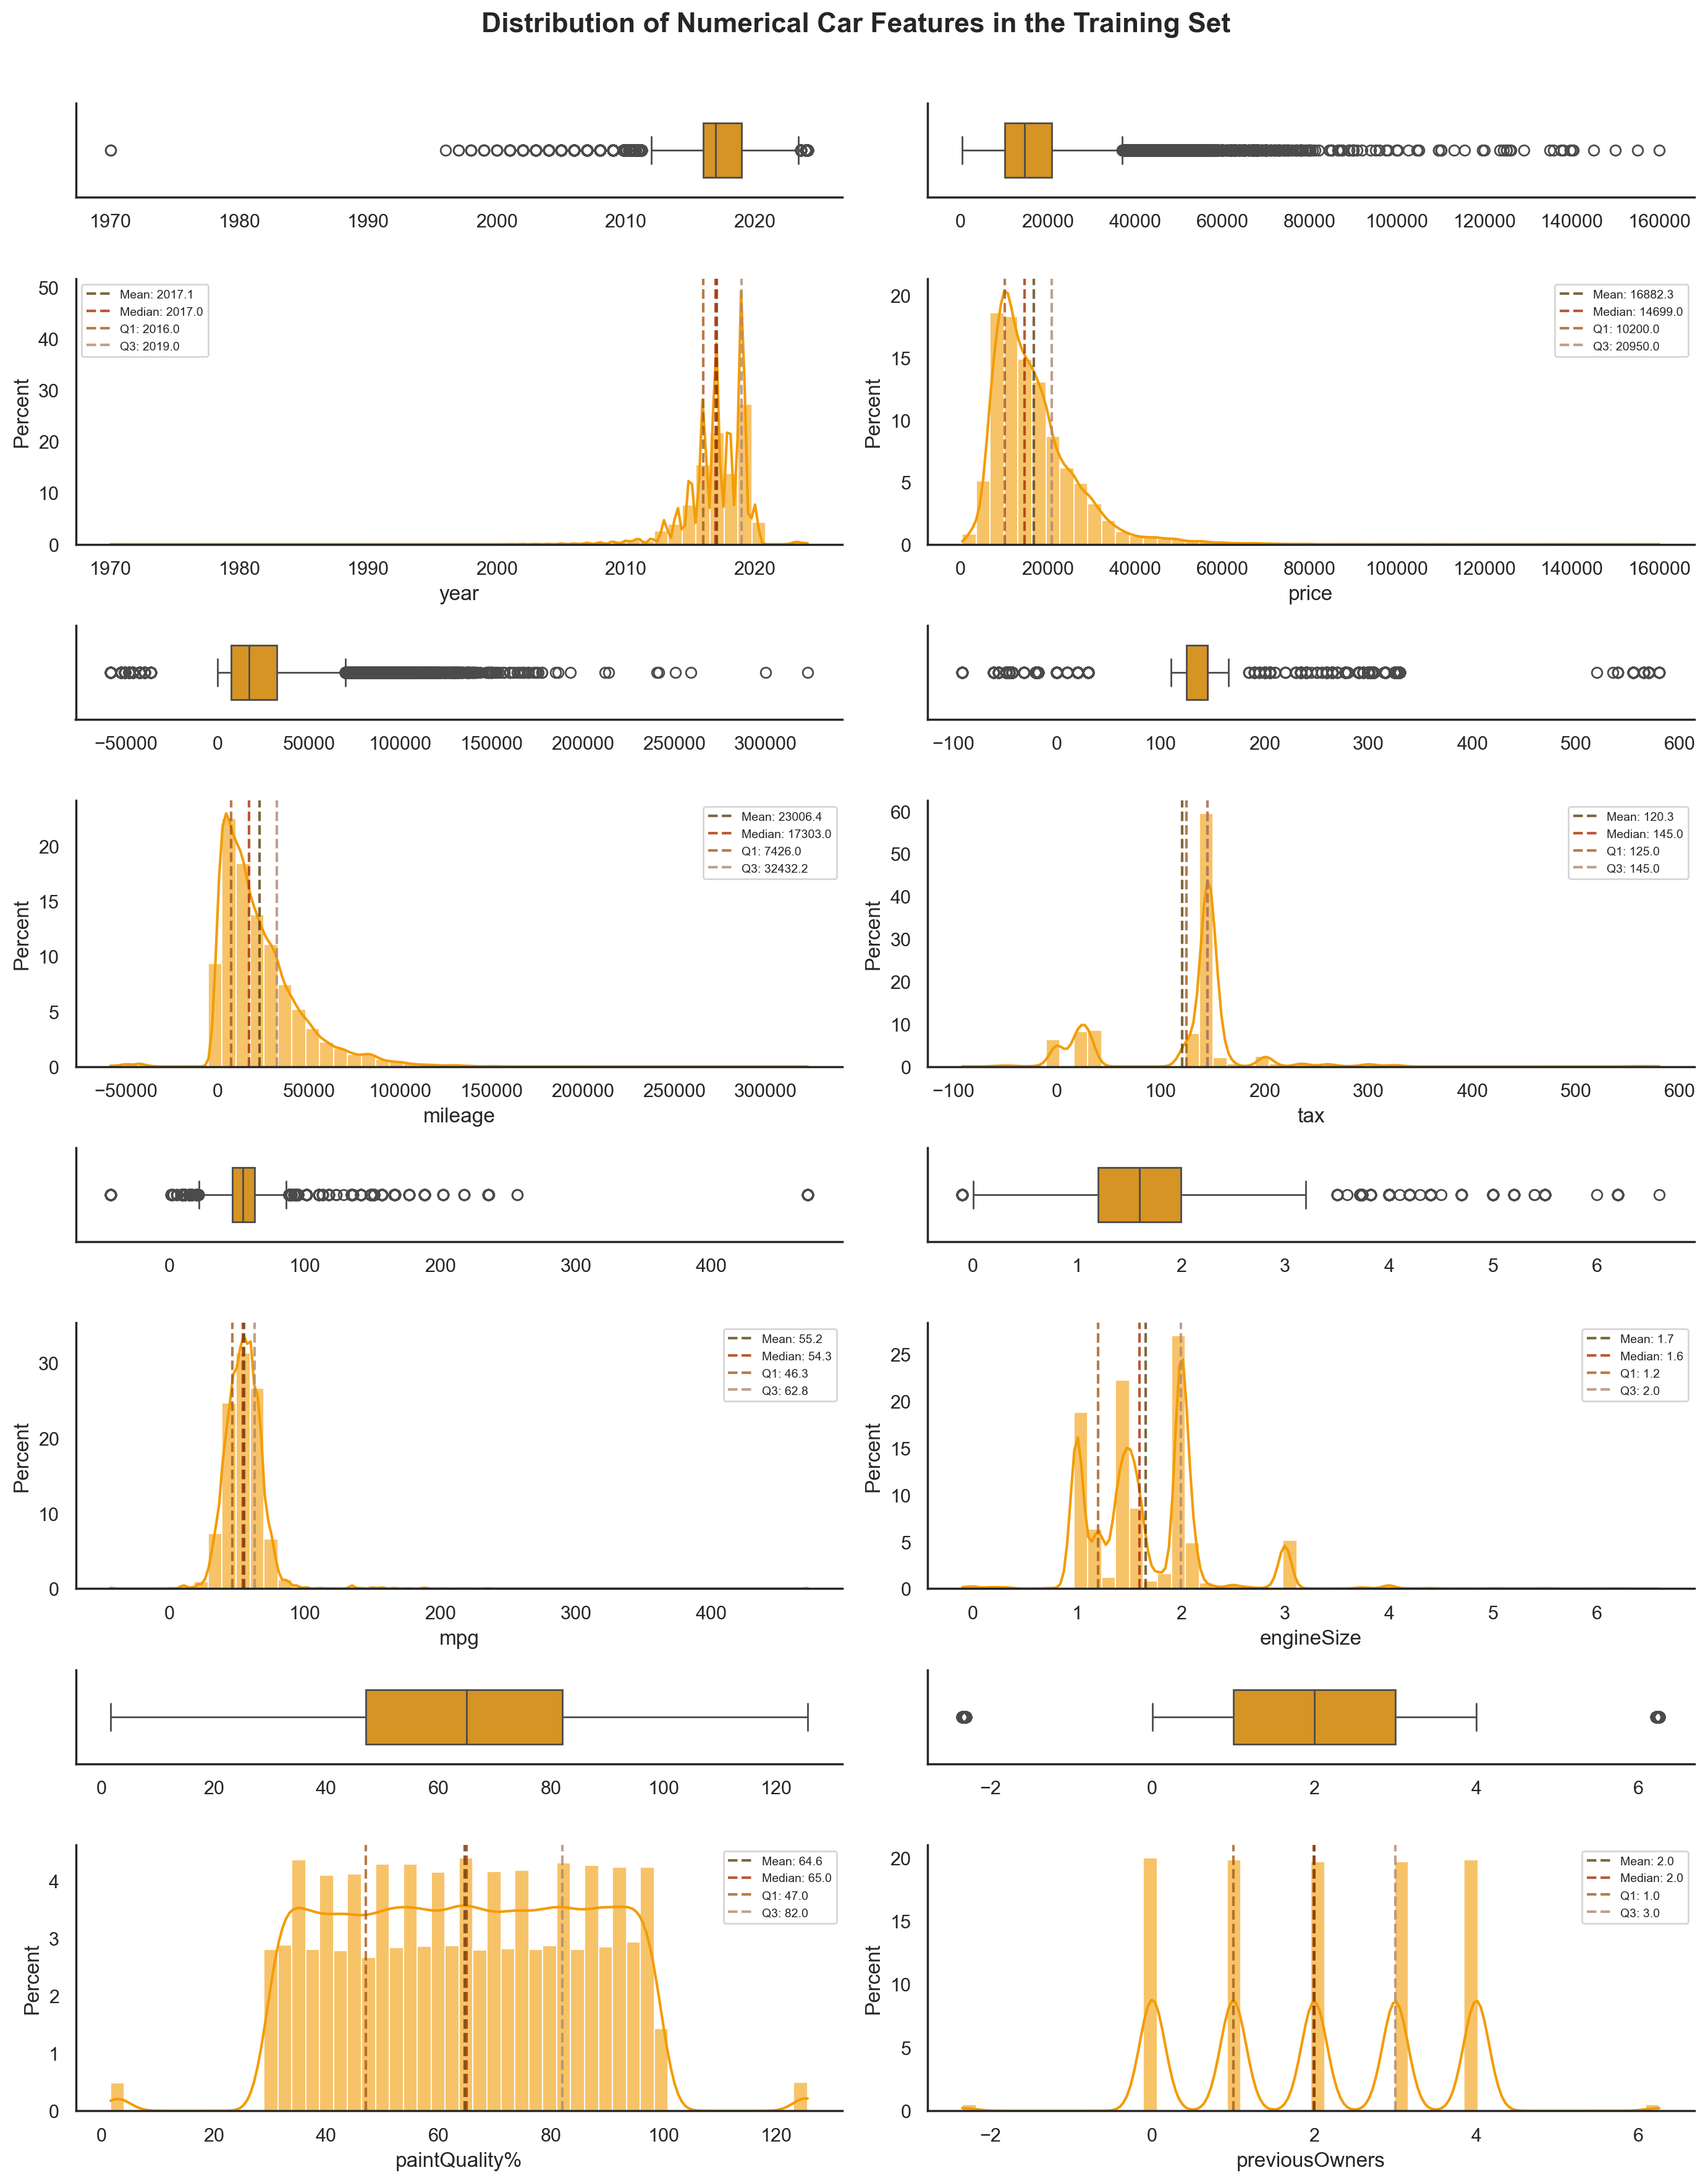

In [19]:
plot_box_hist(car_eval, num.drop(['hasDamage']), "in the Training Set")

<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

- **`Year`**: The distribution for year is left-skewed, characterized by a long tail towards older models, with the vast majority of vehicles clustered in the 2010-2020 range as noted previously. The outliers represent mainly the oldest vehicles, extending down towards 1970.

- **`Price`**: The price distribution exhibits a notable positive skew, with a large number of vehicles concentrated at lower price points and a long tail extending significantly towards very high prices, which pulls the mean above the median. The visible outliers are these high-priced vehicles stretching past 40,000.

- **`Mileage`**: As established, mileage shows a positive skew, concentrating most vehicles under 60,000 miles while having a long tail for higher mileages. Crucially, the outliers on the far left clearly show the presence of negative mileage values, confirming the existence of this error as noted before.

- **`Tax`**: The tax variable displays a bimodal distribution. We observe the presence of invalid negative outliers, as noted earlier, as well as several high-end outliers. This indicates that while the bulk of the data is clustered within specific ranges, the distribution still extends toward the extreme upper end.

- **`MPG`**: The Miles Per Gallon variable is characterized by a strong positive/right skew (mean > median),  with most of the data clustering in the lower-to-mid range MPG values and a long, thin tail extending towards higher MPG values, contributing to the presence of several right-side outliers. It also shows visible negative outliers, which are non-physical and will be addressed.

- **`EngineSize`**: The engineSize plot presents a multimodal distribution, clearly showing distinct groups, likely corresponding to common engine displacements (e.g., peaks near 1, 1.5, and 2 liters). This variable shows a positive skew with some outliers on the higher end, as well as a negative outlier that is not physically possible.

- **`PaintQuality%`**: The paintQuality% distribution is exceptionally stable and appears nearly uniform across the central range (approximately 30% to 90%). The shape measures being near zero (skew≈0 and kurtosis≈0) are visually evident in this flat distribution, and it does not show any outliers.
</div>


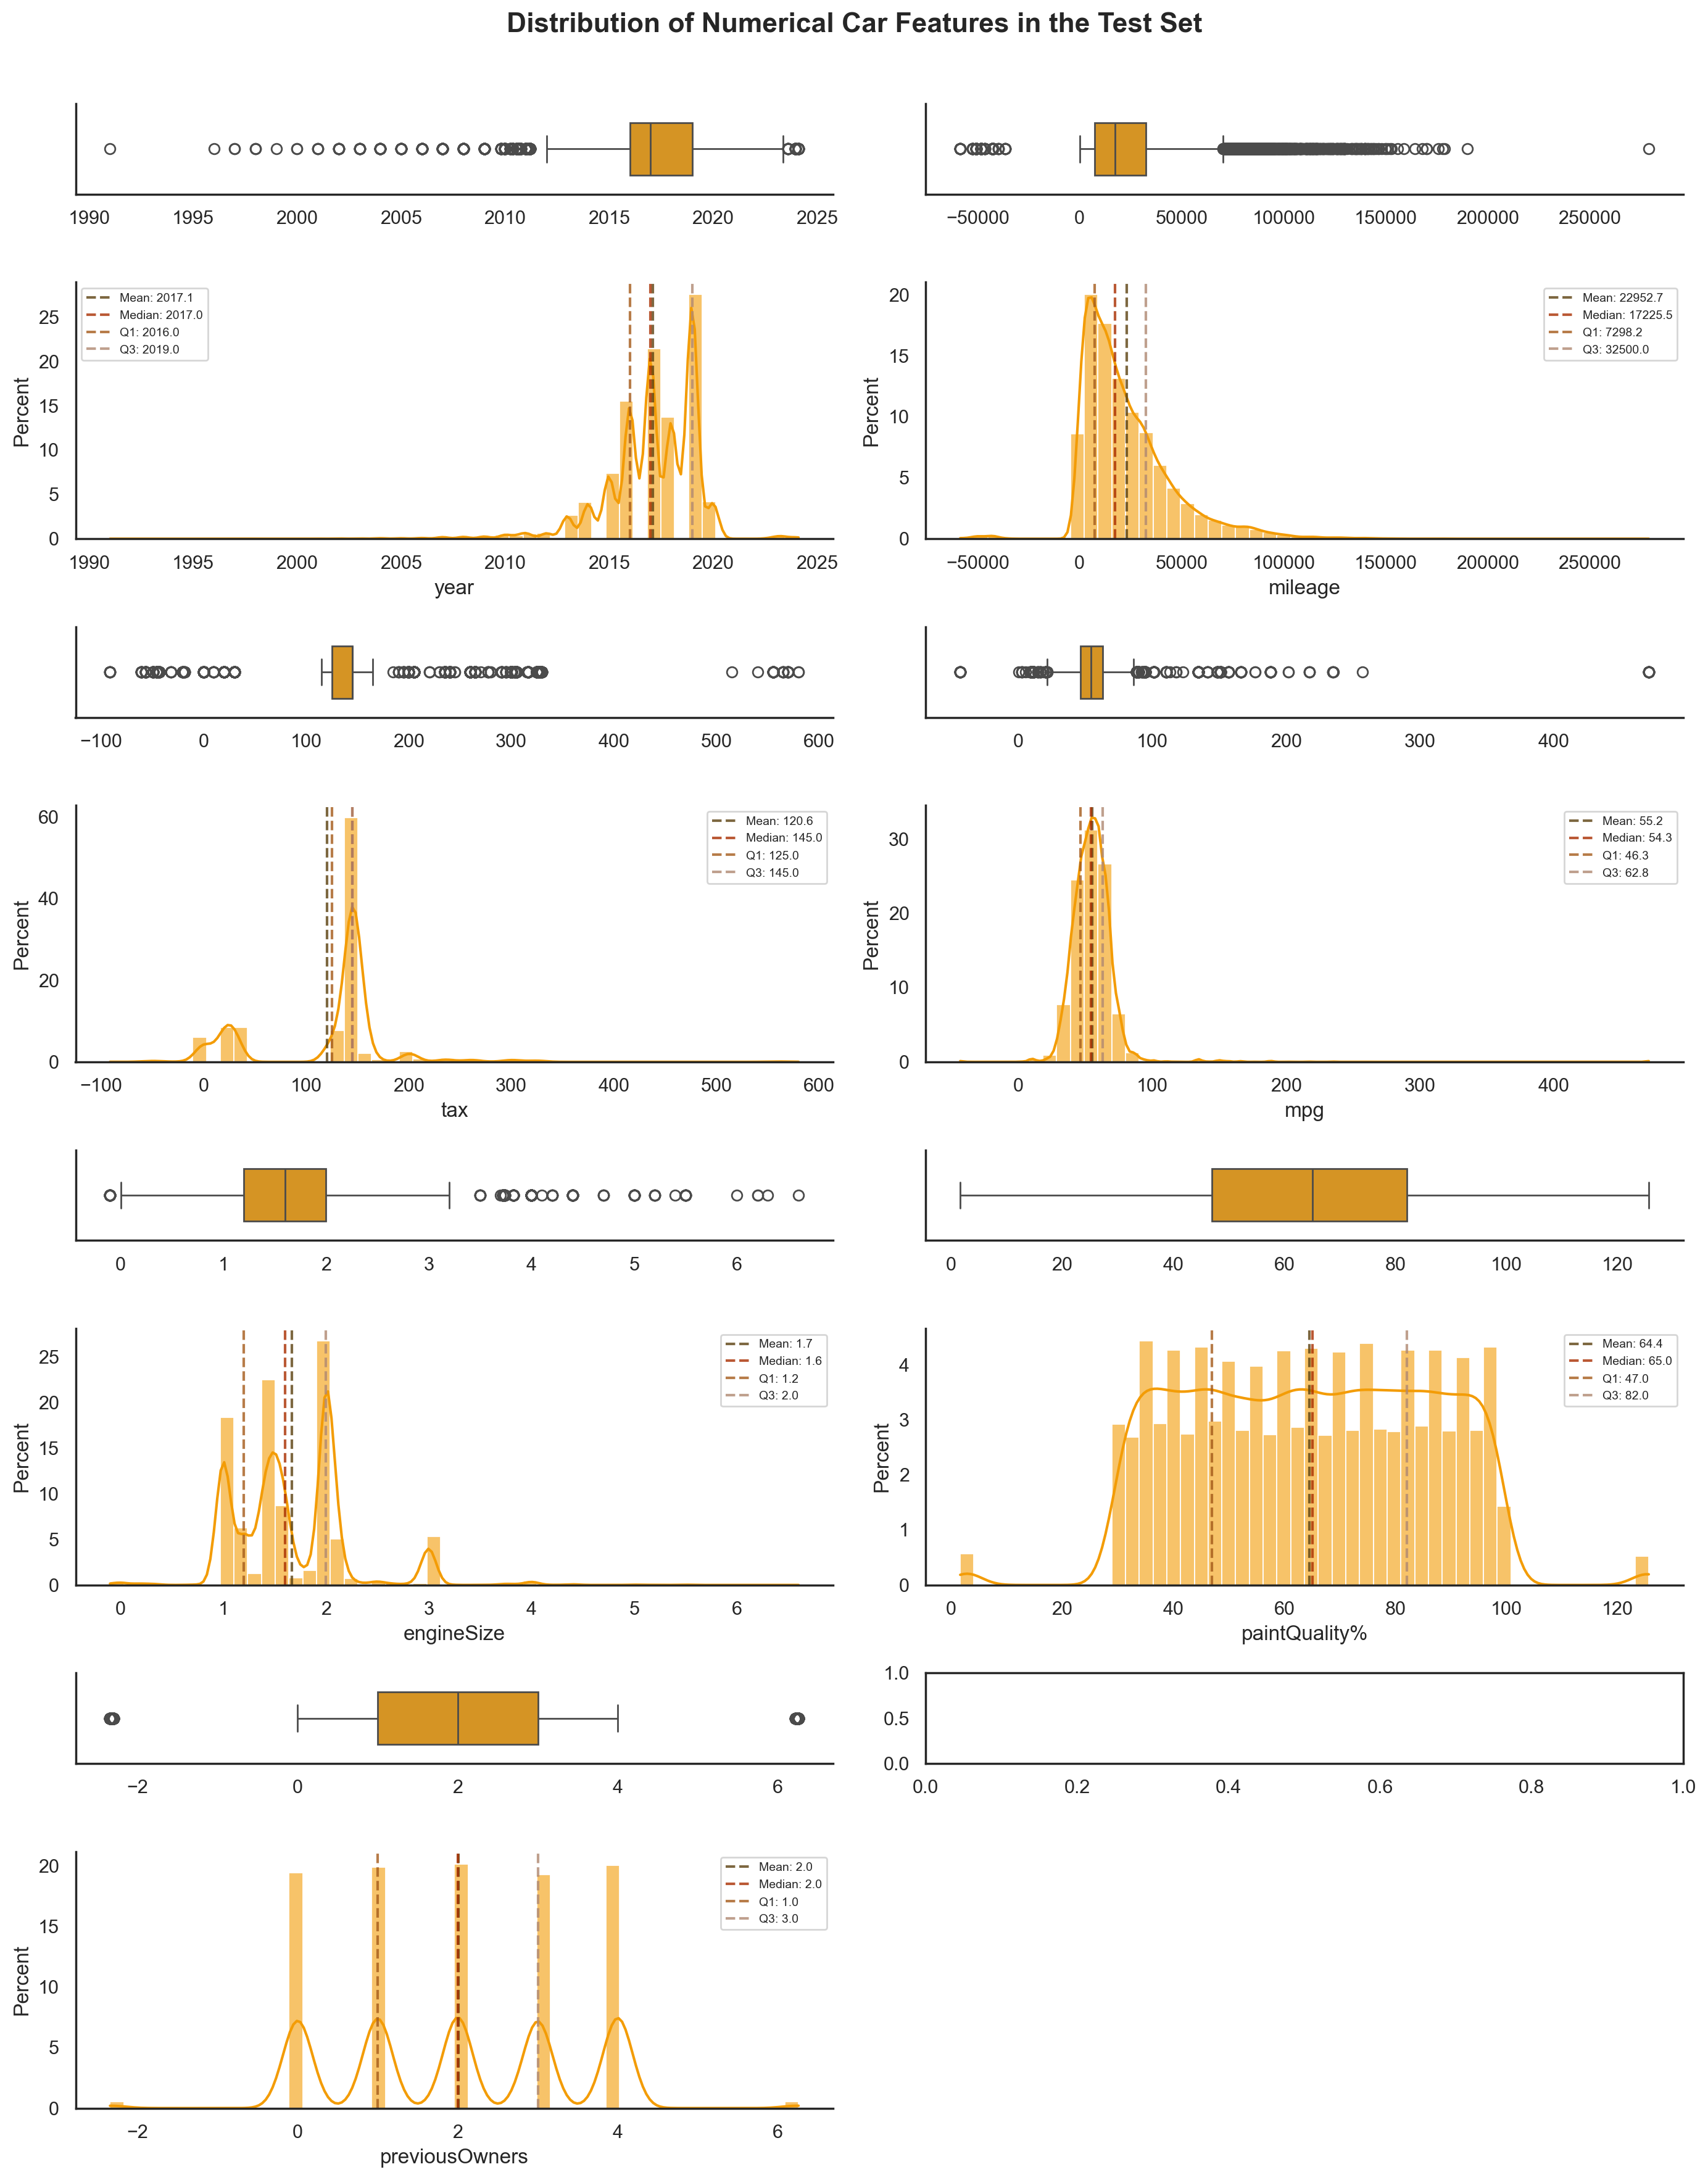

In [20]:
plot_box_hist(X_test, num.drop(['hasDamage', 'price']), "in the Test Set")

<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

- **`Year`**: The distribution in the test set closely mirrors that of the training set, maintaining a left skew with most vehicles concentrated between 2010 and 2020. However, as previously noted, the left-side outliers start later, which results in a slight reduction in both kurtosis and skewness.

- **`Mileage`**: It presents a distribution very similar to the training set: a positively skewed shape, with most values concentrated at lower mileage levels and a long tail extending toward higher mileages. The presence of negative values remains evident and must be addressed.

- **`Tax`**: As in the training dataset, the tax distribution in the test set exhibits a somewhat bimodal pattern, with the presence of invalid negative outliers and several high-end outliers extending the upper tail.

- **`MPG`**: It appears to have the exact same distribution as the training set, characterized by a strong positive skew. There are some impossible negative outliers, as well as some extreme values on the right tail, with one observation standing out markedly (exceeding 400 MPG).

- **`EngineSize`**: It exhibits almost the same distribution as the training set: a positively skewed, multimodal pattern with distinct peaks around 1, 1.5, and 2 liters. Some high-end outliers are observed, along with one negative outlier that is clearly an error.

- **`paintQuality%`**: The paintQuality% distribution in the test set also appears nearly uniform across the central range. Similarly, the visual flatness of the plot aligns with the near-zero skewness and kurtosis, with no apparent outliers present.

It is highly important that the variables in the training and test sets exhibit similar distributions, as is the case here, so that the model can perform reliably and generalize effectively to unseen data.

In [21]:
def plot_bar_wordcloud(df, cols):
    """
    Plot barplots for all columns with optional wordclouds for categorical variables.
    If a column has more than 10 unique values, only the top 10 are shown in the barplot.
    
    Args:
        df (pd.DataFrame): Input dataframe;
        cols (list or pd.Index): List of column names to plot.
    """
    
    # Loop through each column to create individual plots
    for col in cols:
        fig, axes = plt.subplots(1, 2, figsize=(16,6), gridspec_kw={'width_ratios':[1,1]}) #1 row, 2 columns
        
        # Barplot
        ax = axes[0]
        
        value_counts = df[col].value_counts(normalize=True) * 100 # percentage of each unique value in the column
        # Up to top 10 unique values
        if len(value_counts) > 10:
            value_counts = value_counts.head(10)

        sns.barplot(x=value_counts.values, y=value_counts.index, ax=ax, color='#a55b1bf9')

        # Add percentage above each bar
        for i, v in enumerate(value_counts.values):
            ax.text(v + 0.5, i, f"{v:.1f}%", va='center', fontsize=9)
        
        ax.set_title(f"{col} - Barplot", fontsize=12, fontweight='bold')
        ax.set_xlabel("Percentage")
        ax.set_ylabel(None)
        sns.despine(ax=ax, top=True, right=True)
        

        # WordCloud
        ax_wc = axes[1]
        word_counts = df[col].value_counts()
        wc = WordCloud(width=800, height=400,
                       background_color='white',
                       colormap='YlOrBr',
                       contour_width=1).generate_from_frequencies(word_counts)
        ax_wc.imshow(wc, interpolation='bilinear')
        ax_wc.axis('off')
        ax_wc.set_title(f"{col} - WordCloud", fontsize=12, fontweight='bold')
        
        plt.tight_layout()
        plt.show()

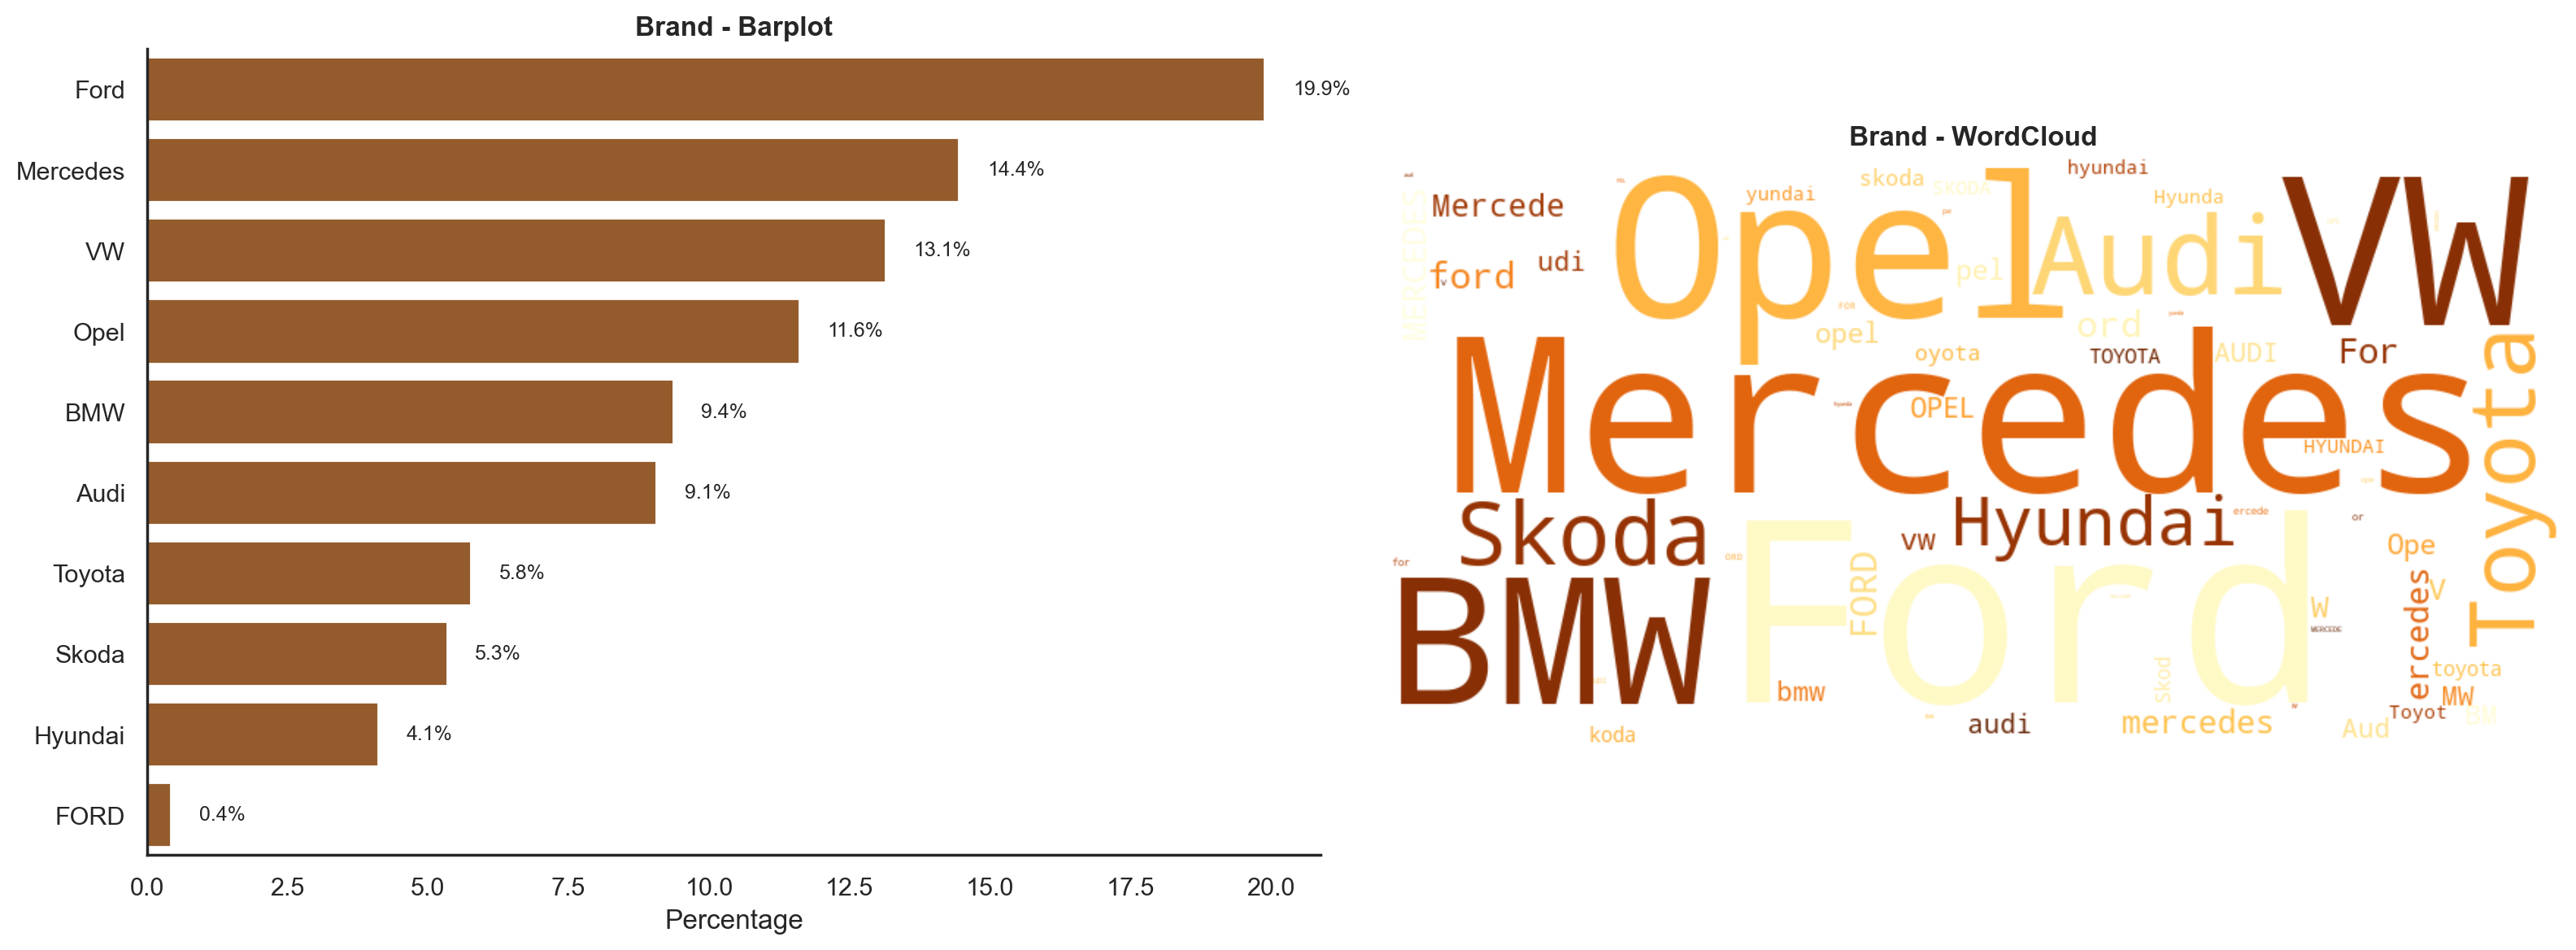

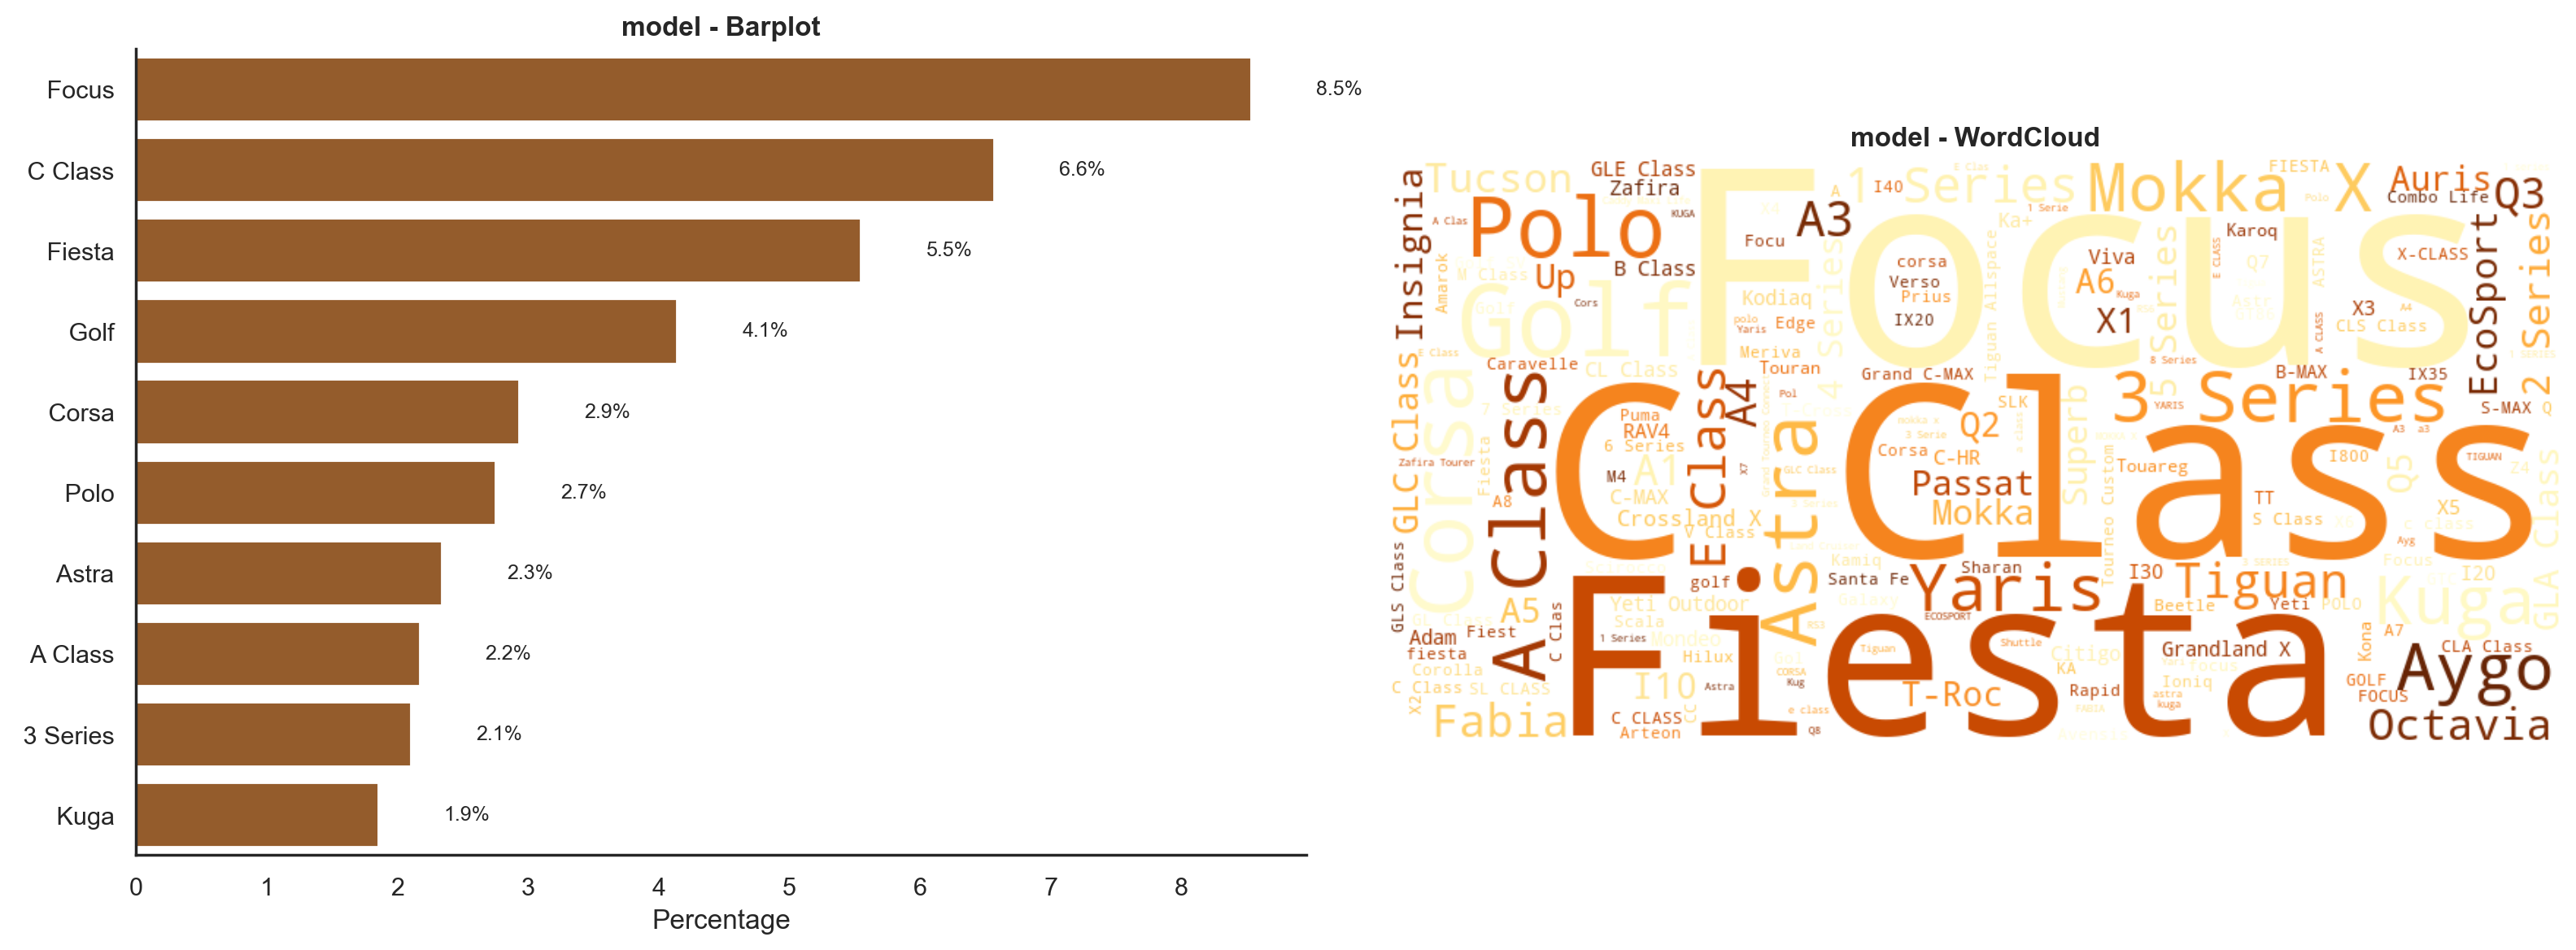

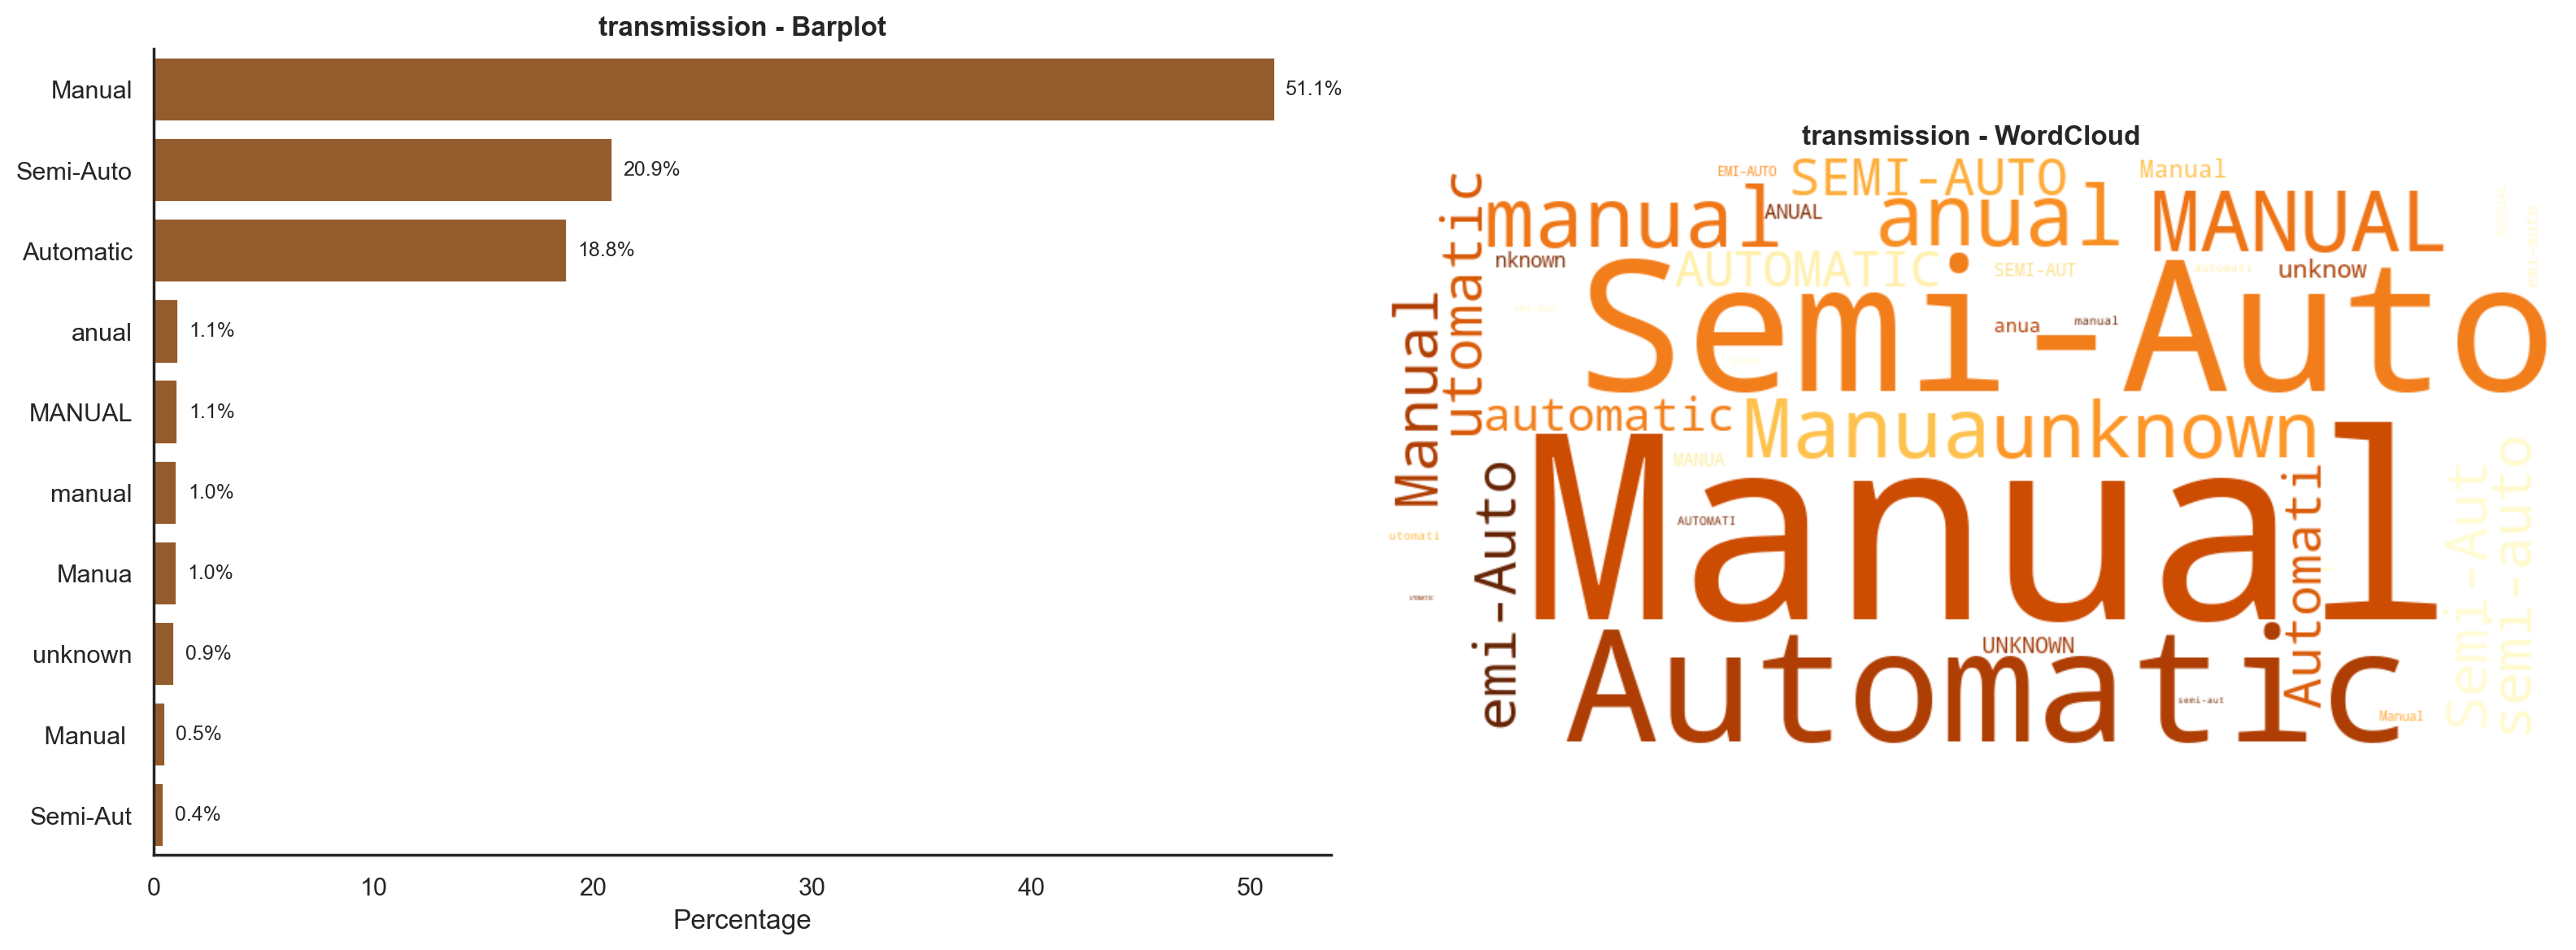

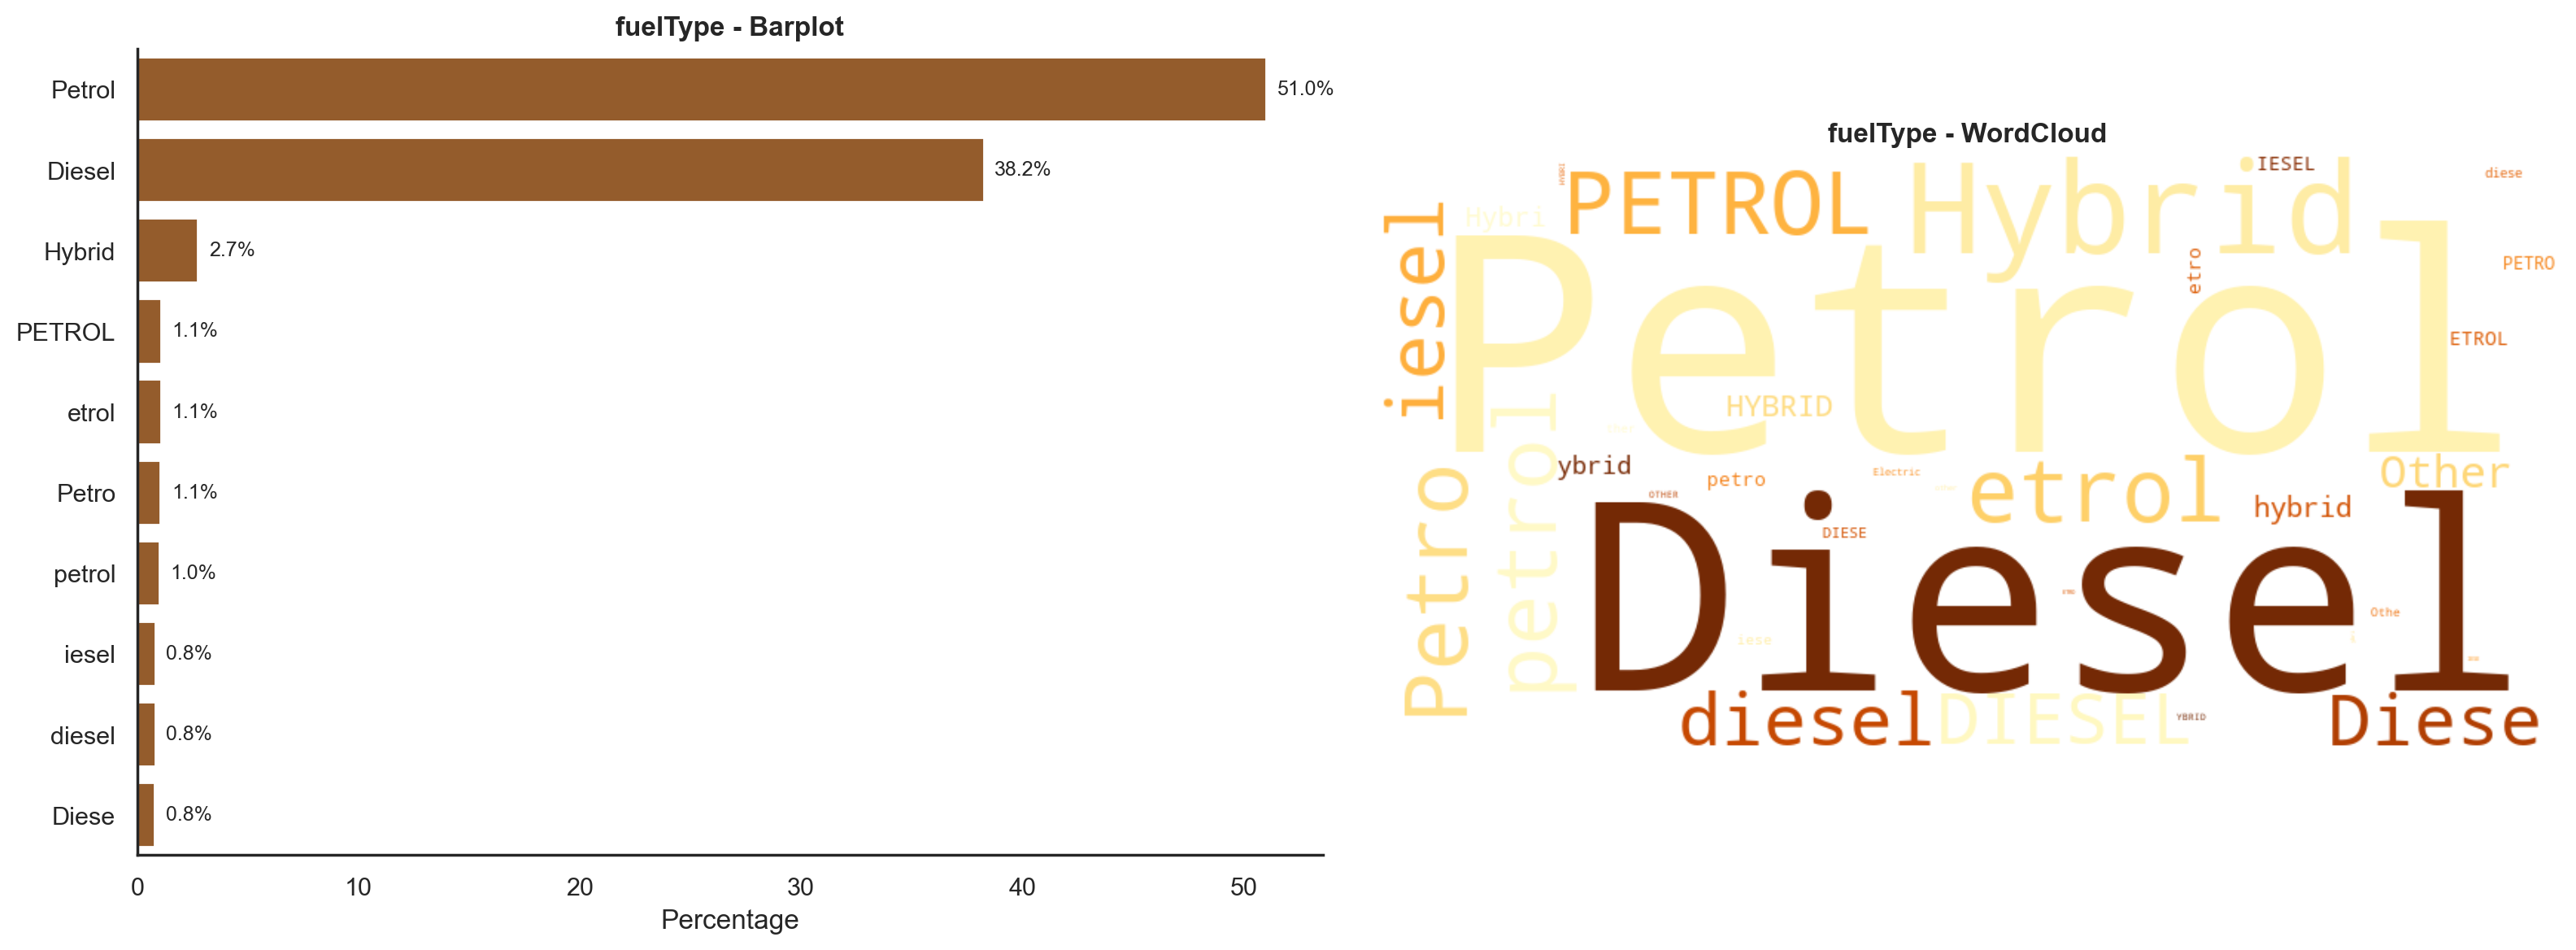

In [22]:
plot_bar_wordcloud(car_eval, cat)

<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

- **`Brand`**: the 3 brands with the highest presence in the training set are `Ford` (19.9%), `Mercedes` (14.4%), and `VW` – Volkswagen (13.1%). However, by examining the word cloud, we can see that there are many spelling errors and inconsistencies (e.g., `Opel`, `opel`, `pel`, `OPEL`). We were already aware that these issues existed, but this visualization provides a better understanding of the problem, as it could be affecting the order in which the brands appear. It will be more insightful to compare these results with those obtained after correcting inconsistencies across all variables.

- **`model`**: The most common car models are `Focus` (8.5%) from Ford, `C Class` (6.6%) from Mercedes, and `Fiesta` (5.5%) from Ford, corresponding to the most frequent car brands. There are many different car models, which makes it difficult to determine whether the same inconsistencies observed in the brand variable are present here, though this possibility cannot be ruled out.

- **`transmission`**: The most frequent transmission type is `Manual` (51.1%), followed by `Semi-Auto` (20.9%) and `Automatic` (18.8%). The word cloud reveals several spelling errors and inconsistencies, such as `anual`, `MANUAL`, and `manual`, which is affecting the statistics.

- **`fuelType`**: The most common fuel type is `Petrol` (51.0%), followed by `Diesel` (38.2%), with a sharp drop to `Hybrid` (2.7%). The word cloud reveals several spelling errors and inconsistencies, such as `diesel`, `diese`, and `DIESEL`, which is affecting the distribution.

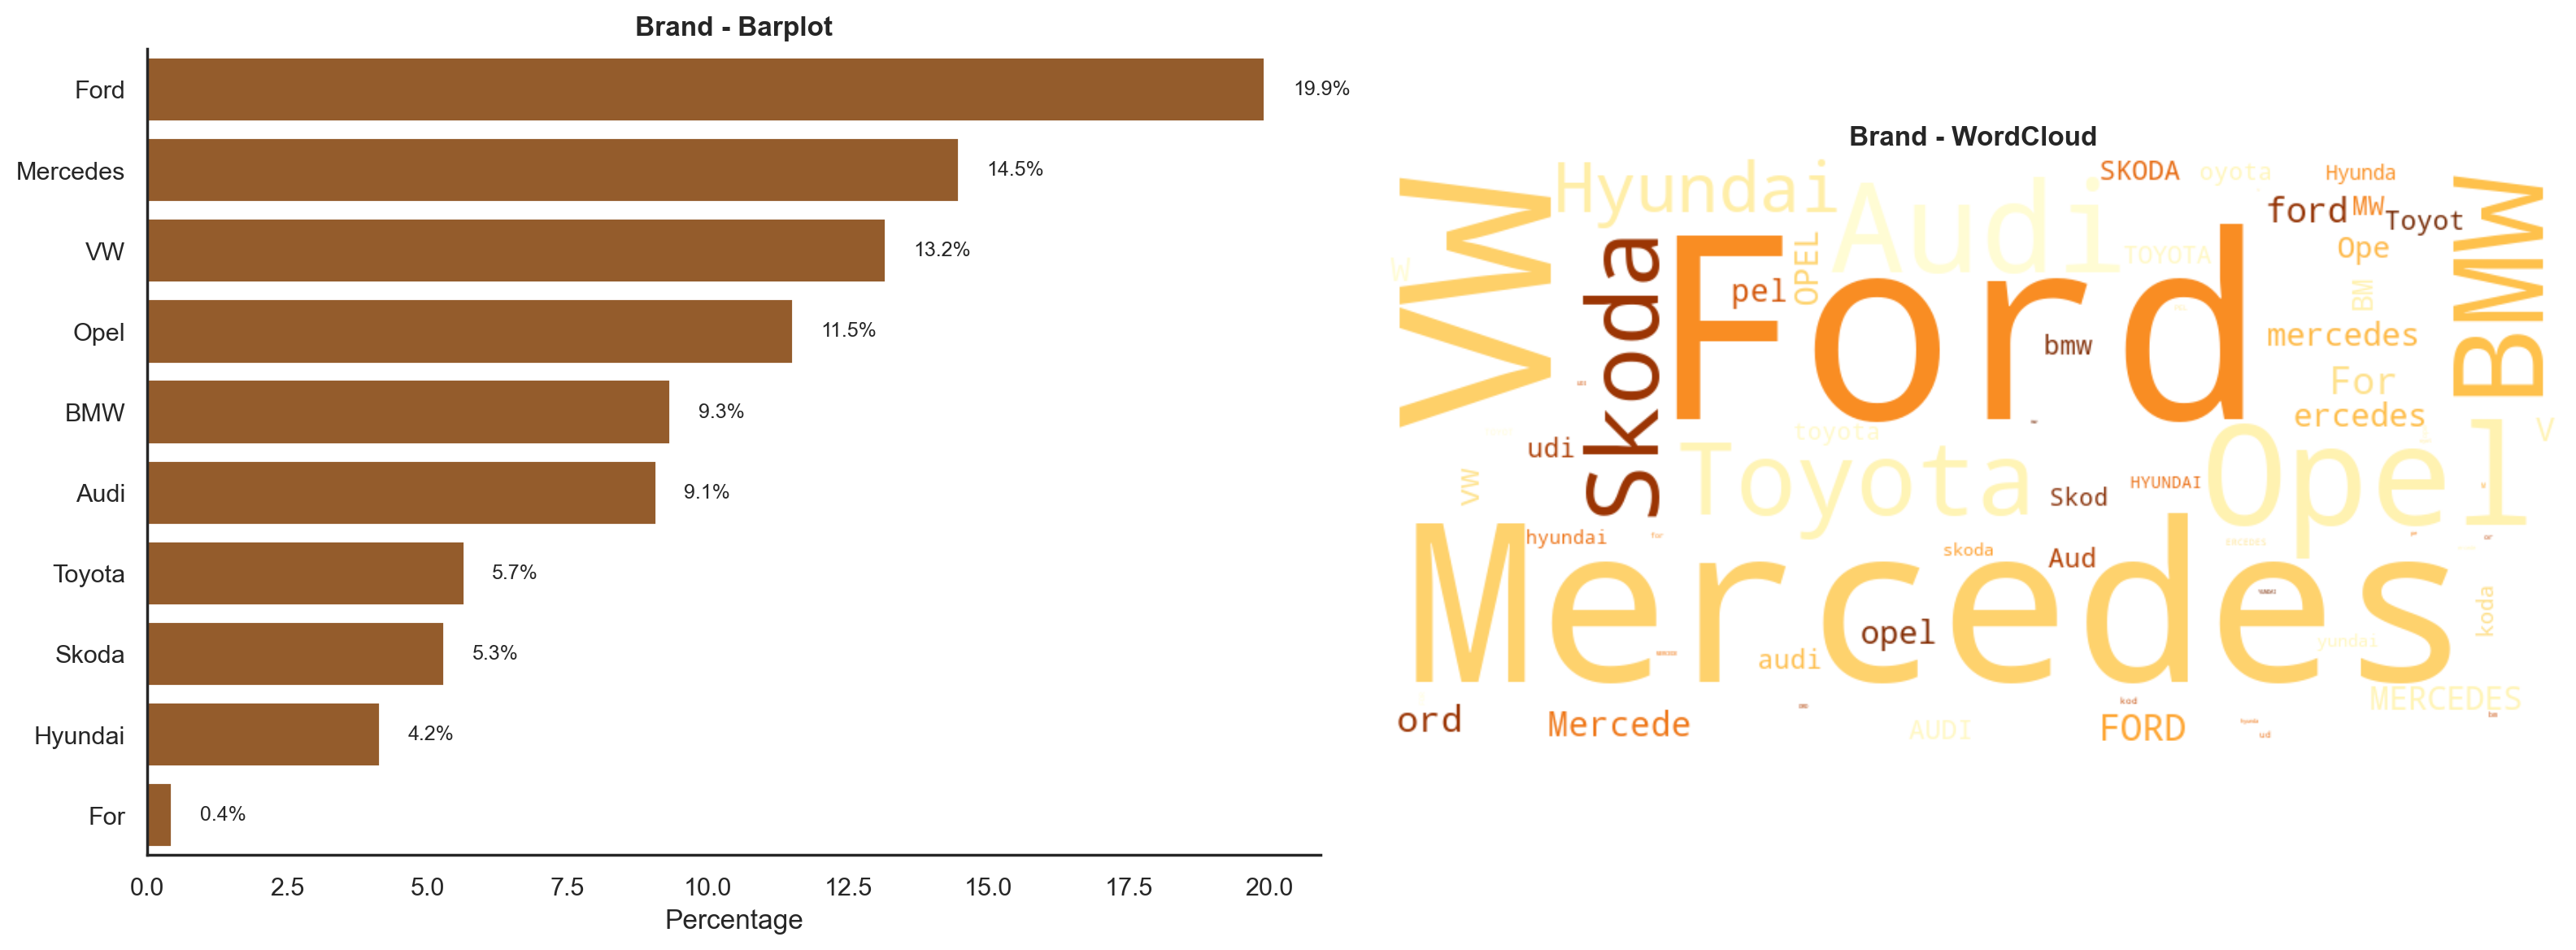

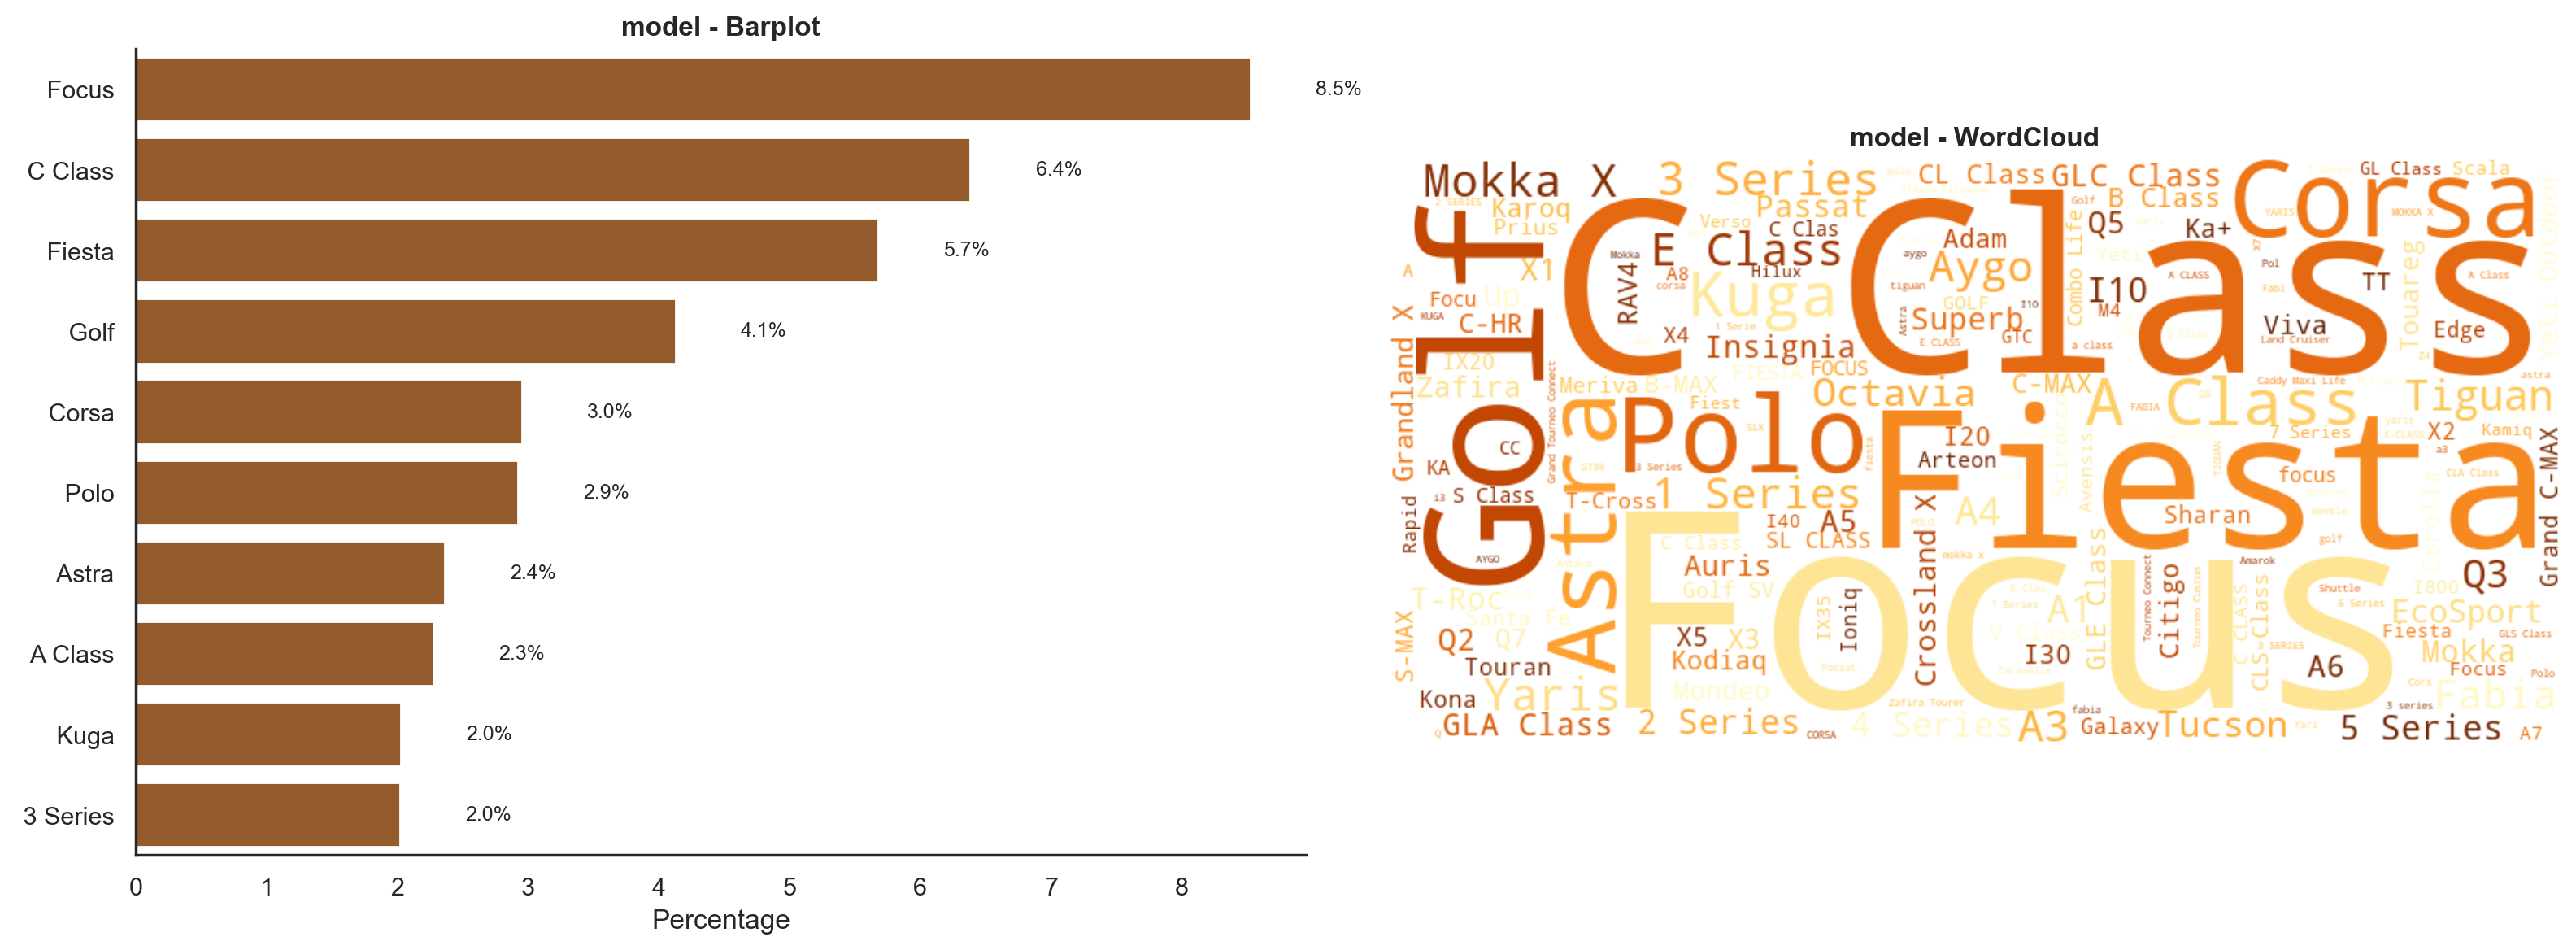

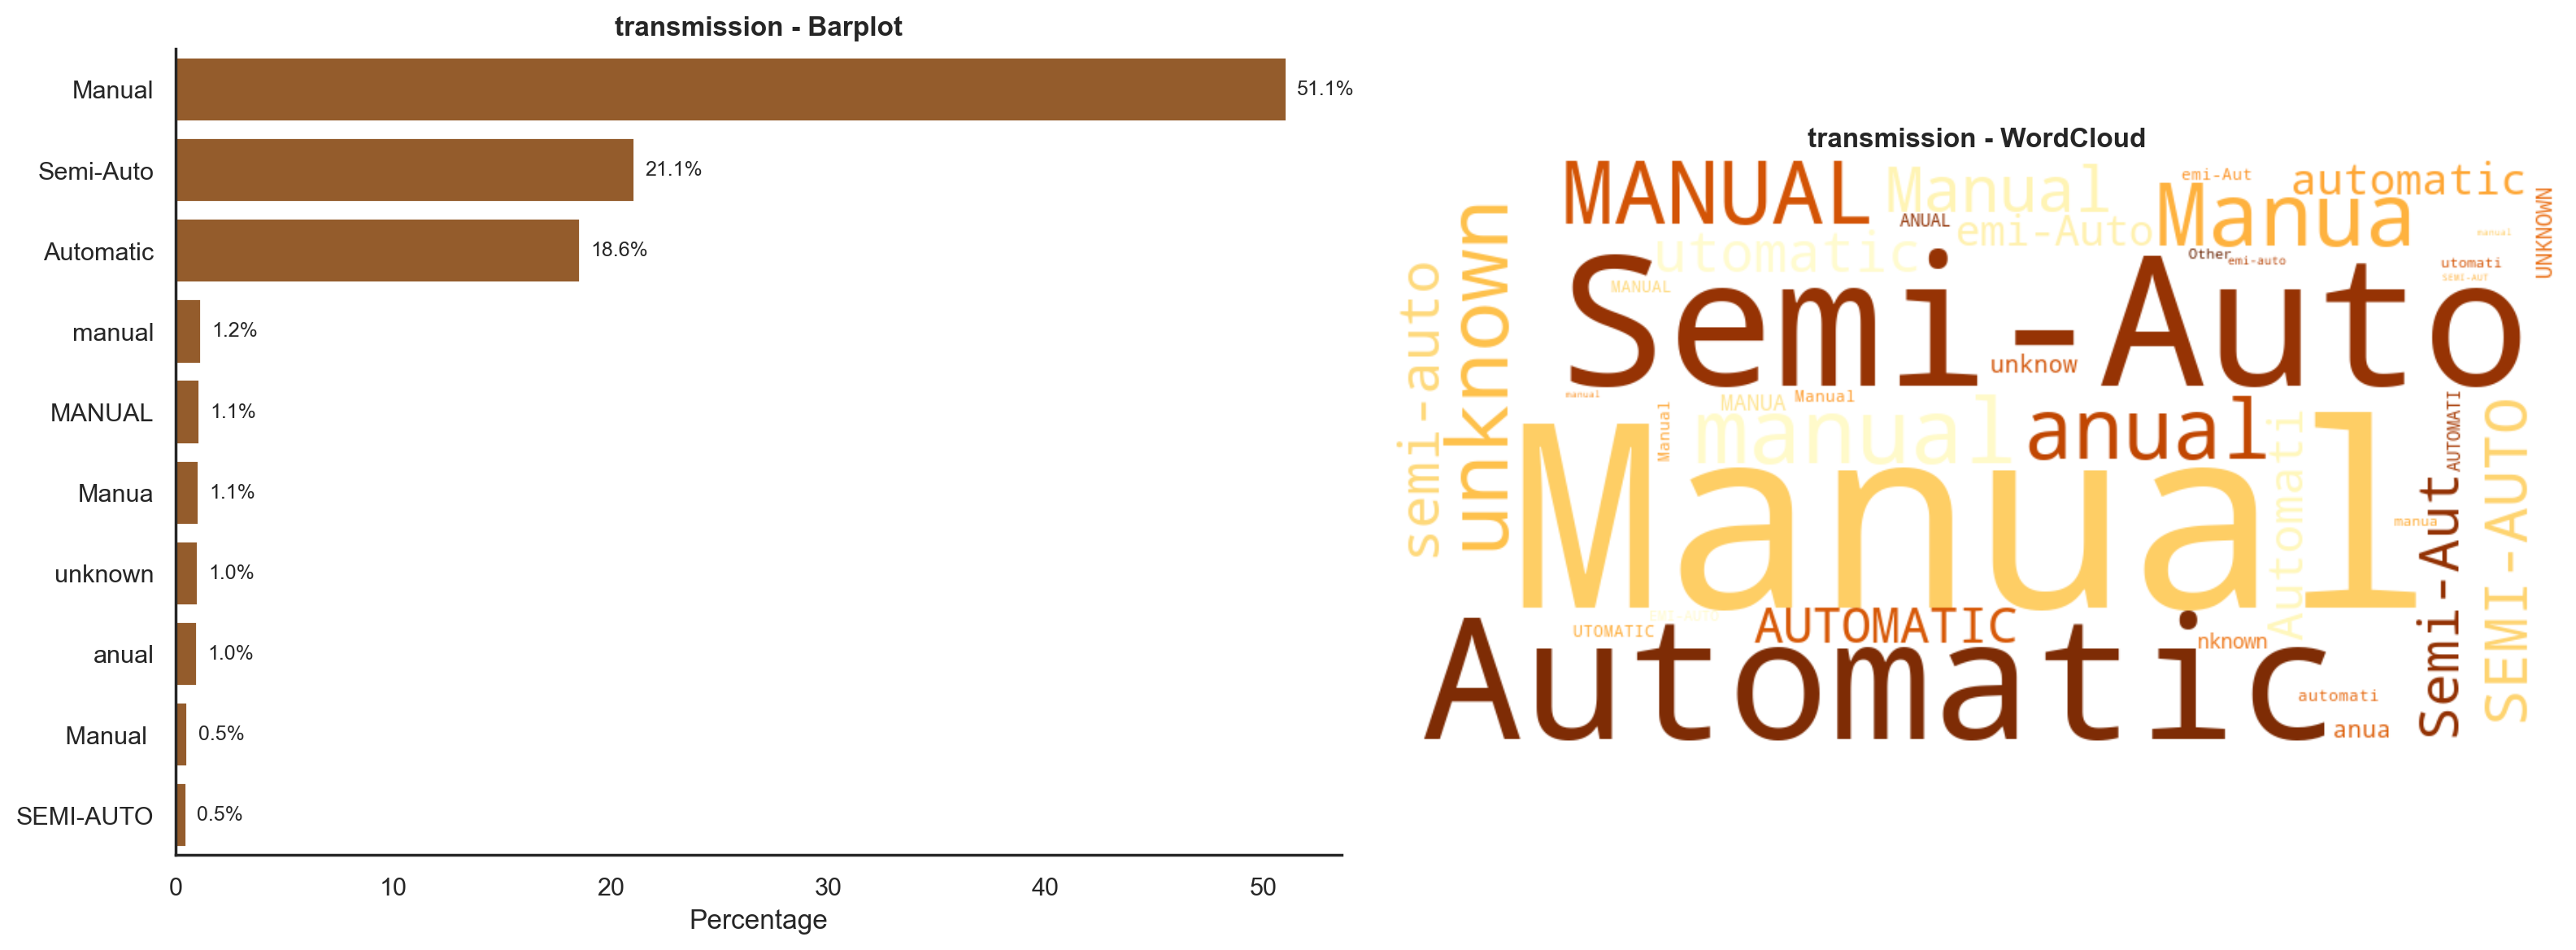

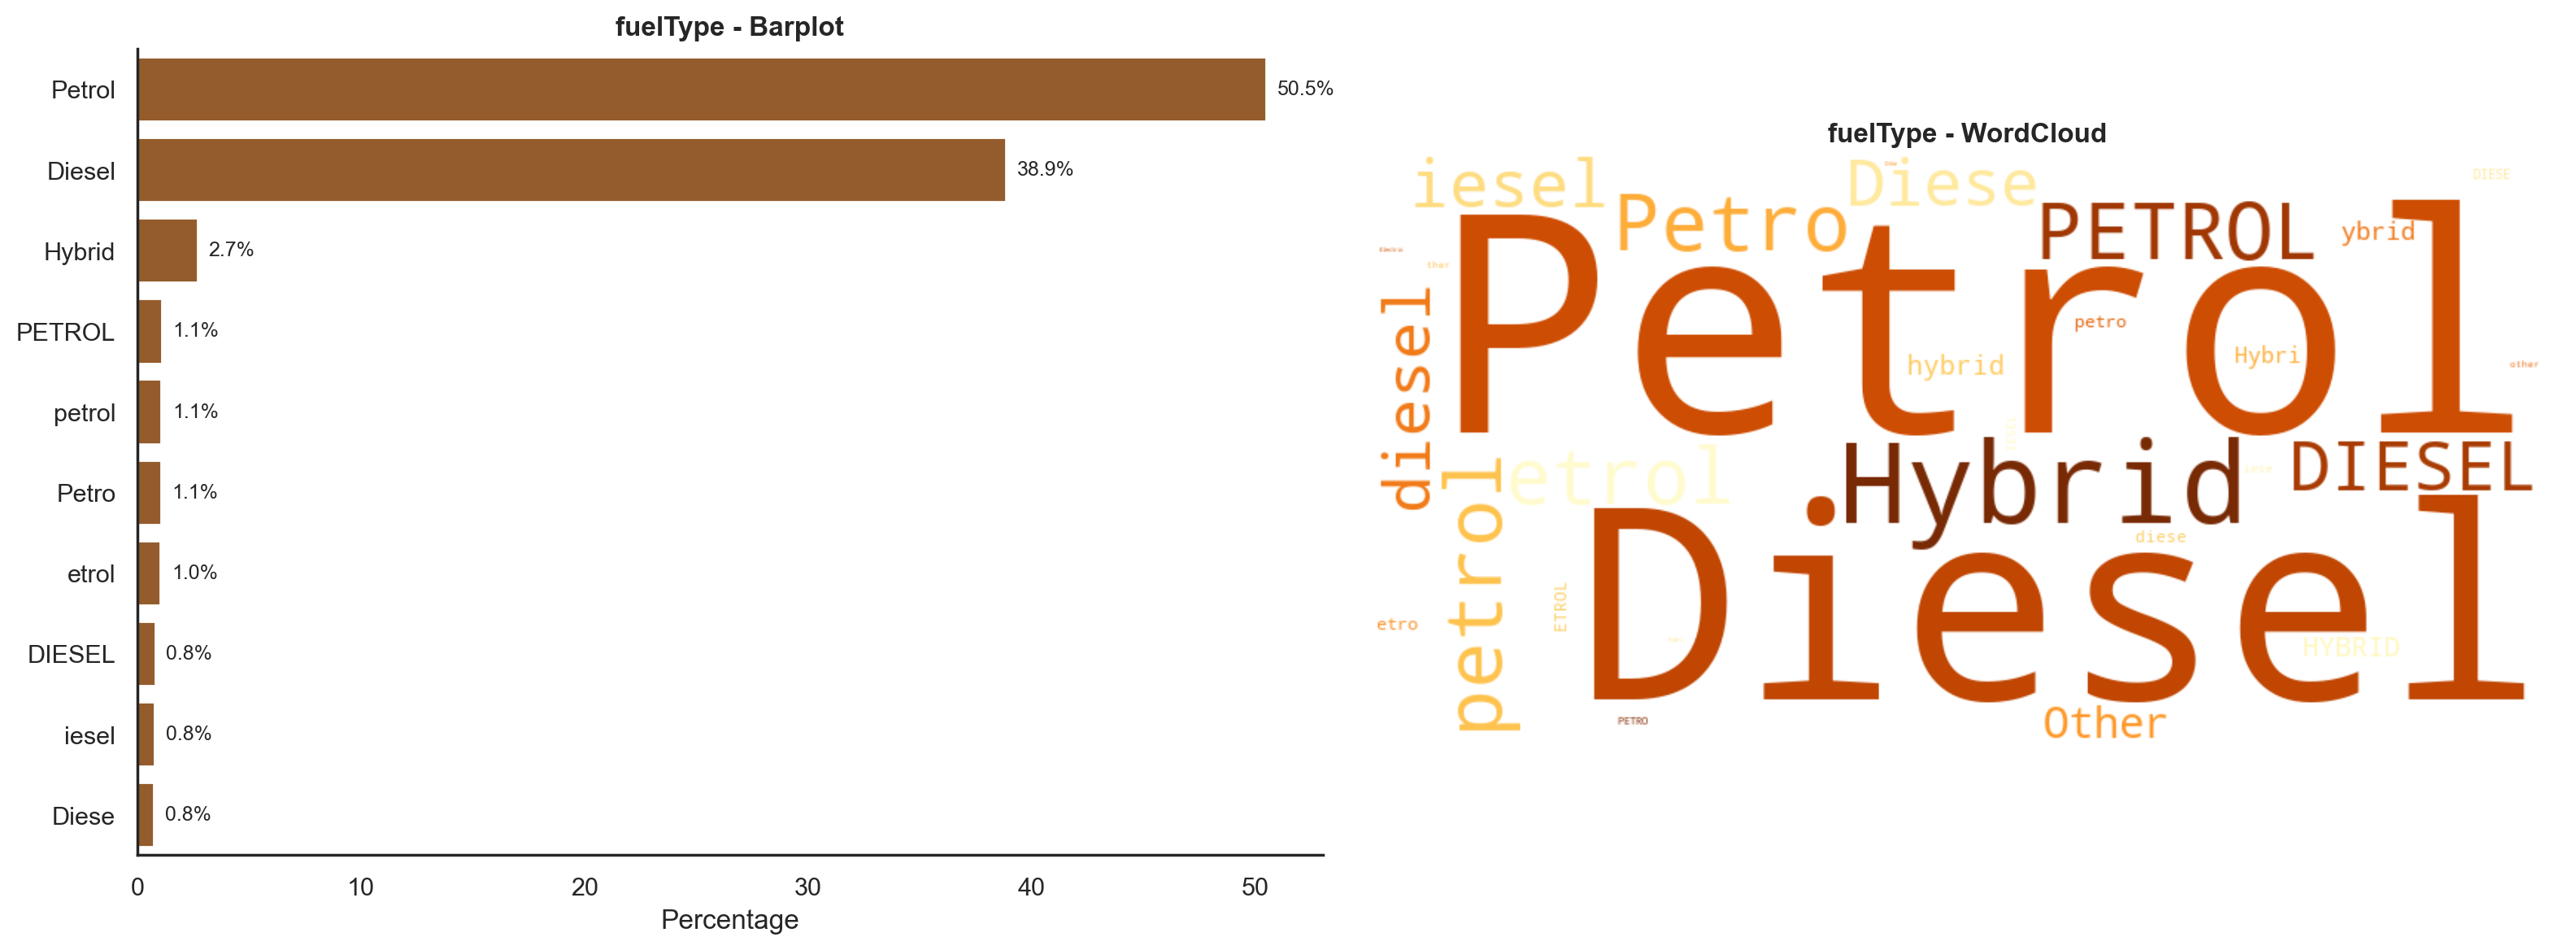

In [23]:
plot_bar_wordcloud(X_test, cat)

Basically, the variables in the test set exhibit the same distribution as in the training set, so we will skip this analysis to avoid being too repetitive.

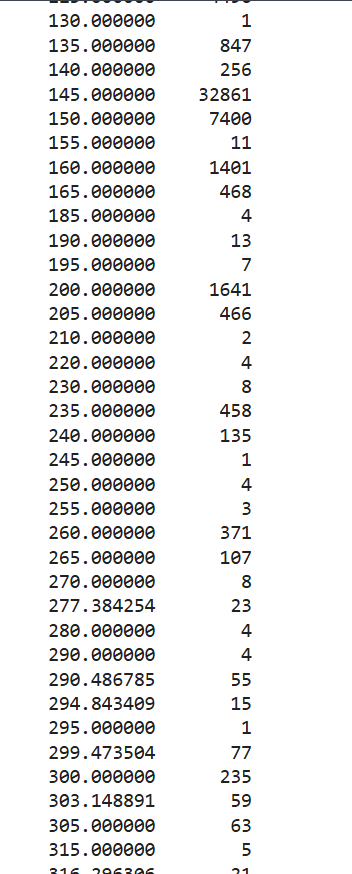
PARA A VARIÁVEL TAX

In [24]:
def plot_comparison_barplots(dataframes_dict):
    """
    Plots side-by-side VERTICAL barplots comparing the COUNTS of ALL values 
    (including '0' vs 'NaN' explicitly) across multiple DataFrames.
    """
    
    n_dfs = len(dataframes_dict)
    
    if n_dfs == 0:
        print("Error: No DataFrames provided for comparison.")
        return
    
    # 1. Layout Configuration
    fig, axes = plt.subplots(1, n_dfs, figsize=(n_dfs * 5.5, 6), squeeze=False) 
    BAR_COLOR = '#644712' 

    # 2. Plotting Loop
    for i, (df_label, df) in enumerate(dataframes_dict.items()):
        ax = axes[0, i] 

        # --- CORREÇÃO PARA VISIBILIDADE DE NaN: Substituir NaN por string e usar contagem simples ---
        df_temp = df['hasDamage'].copy()
        # Substituir NaN por uma string que será a etiqueta no eixo Y
        df_temp = df_temp.fillna('Is Missing (NaN)')
        
        # Contagem de todos os valores (0, 'Is Missing (NaN)', outros valores)
        value_counts = df_temp.value_counts()
        
        # Limitar ao Top 10 (se houver muitos valores distintos, como em 'previousOwners')
        if len(value_counts) > 10:
            value_counts = value_counts.head(10)
        
        # Garantir que se 'Is Missing (NaN)' for 0, ele ainda é adicionado para consistência (se for o caso)
        # (Esta etapa é menos necessária, mas mais segura)
        if 'Is Missing (NaN)' not in value_counts.index and df['hasDamage'].isnull().any():
             # Se houve NaNs mas o value_counts os excluiu (o que não deve acontecer com dropna=False mas é um safe guard)
             value_counts['Is Missing (NaN)'] = 0


        # Se o total for zero após a contagem, pula
        if value_counts.empty:
             ax.set_title(f"hasDamage - {df_label} (No relevant data)", fontsize=12, fontweight='bold')
             ax.axis('off')
             continue

        # Calculate Total for percentage calculation (based on what's shown)
        total_plotted = value_counts.sum()
        
        # Drawing the Barplot (Vertical)
        sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax, color=BAR_COLOR)

        # Add count and percentage label above each bar
        for j, v in enumerate(value_counts.values):
            ax.text(j, v + (value_counts.max() * 0.02), 
                    f"{v} ({v/total_plotted*100:.1f}%)", 
                    ha='center', va='bottom', fontsize=9, rotation=45)
        
        # Titles and Style
        ax.set_title(f"hasDamage - {df_label}", fontsize=12, fontweight='bold')
        ax.set_xlabel(f"Value in hasDamage'")
        ax.set_ylabel("Count") 
        sns.despine(ax=ax, top=True, right=True)

    # 3. Final Adjustment and Display
    fig.suptitle(f"Count Comparison for hasDamage Across Datasets", fontweight='bold', fontsize=16, y=1.03)
    
    plt.subplots_adjust(
        left=0.05,        
        right=0.98,         
        wspace=0.35 if n_dfs > 1 else 0, 
        top=0.90            
    )
    
    plt.show()

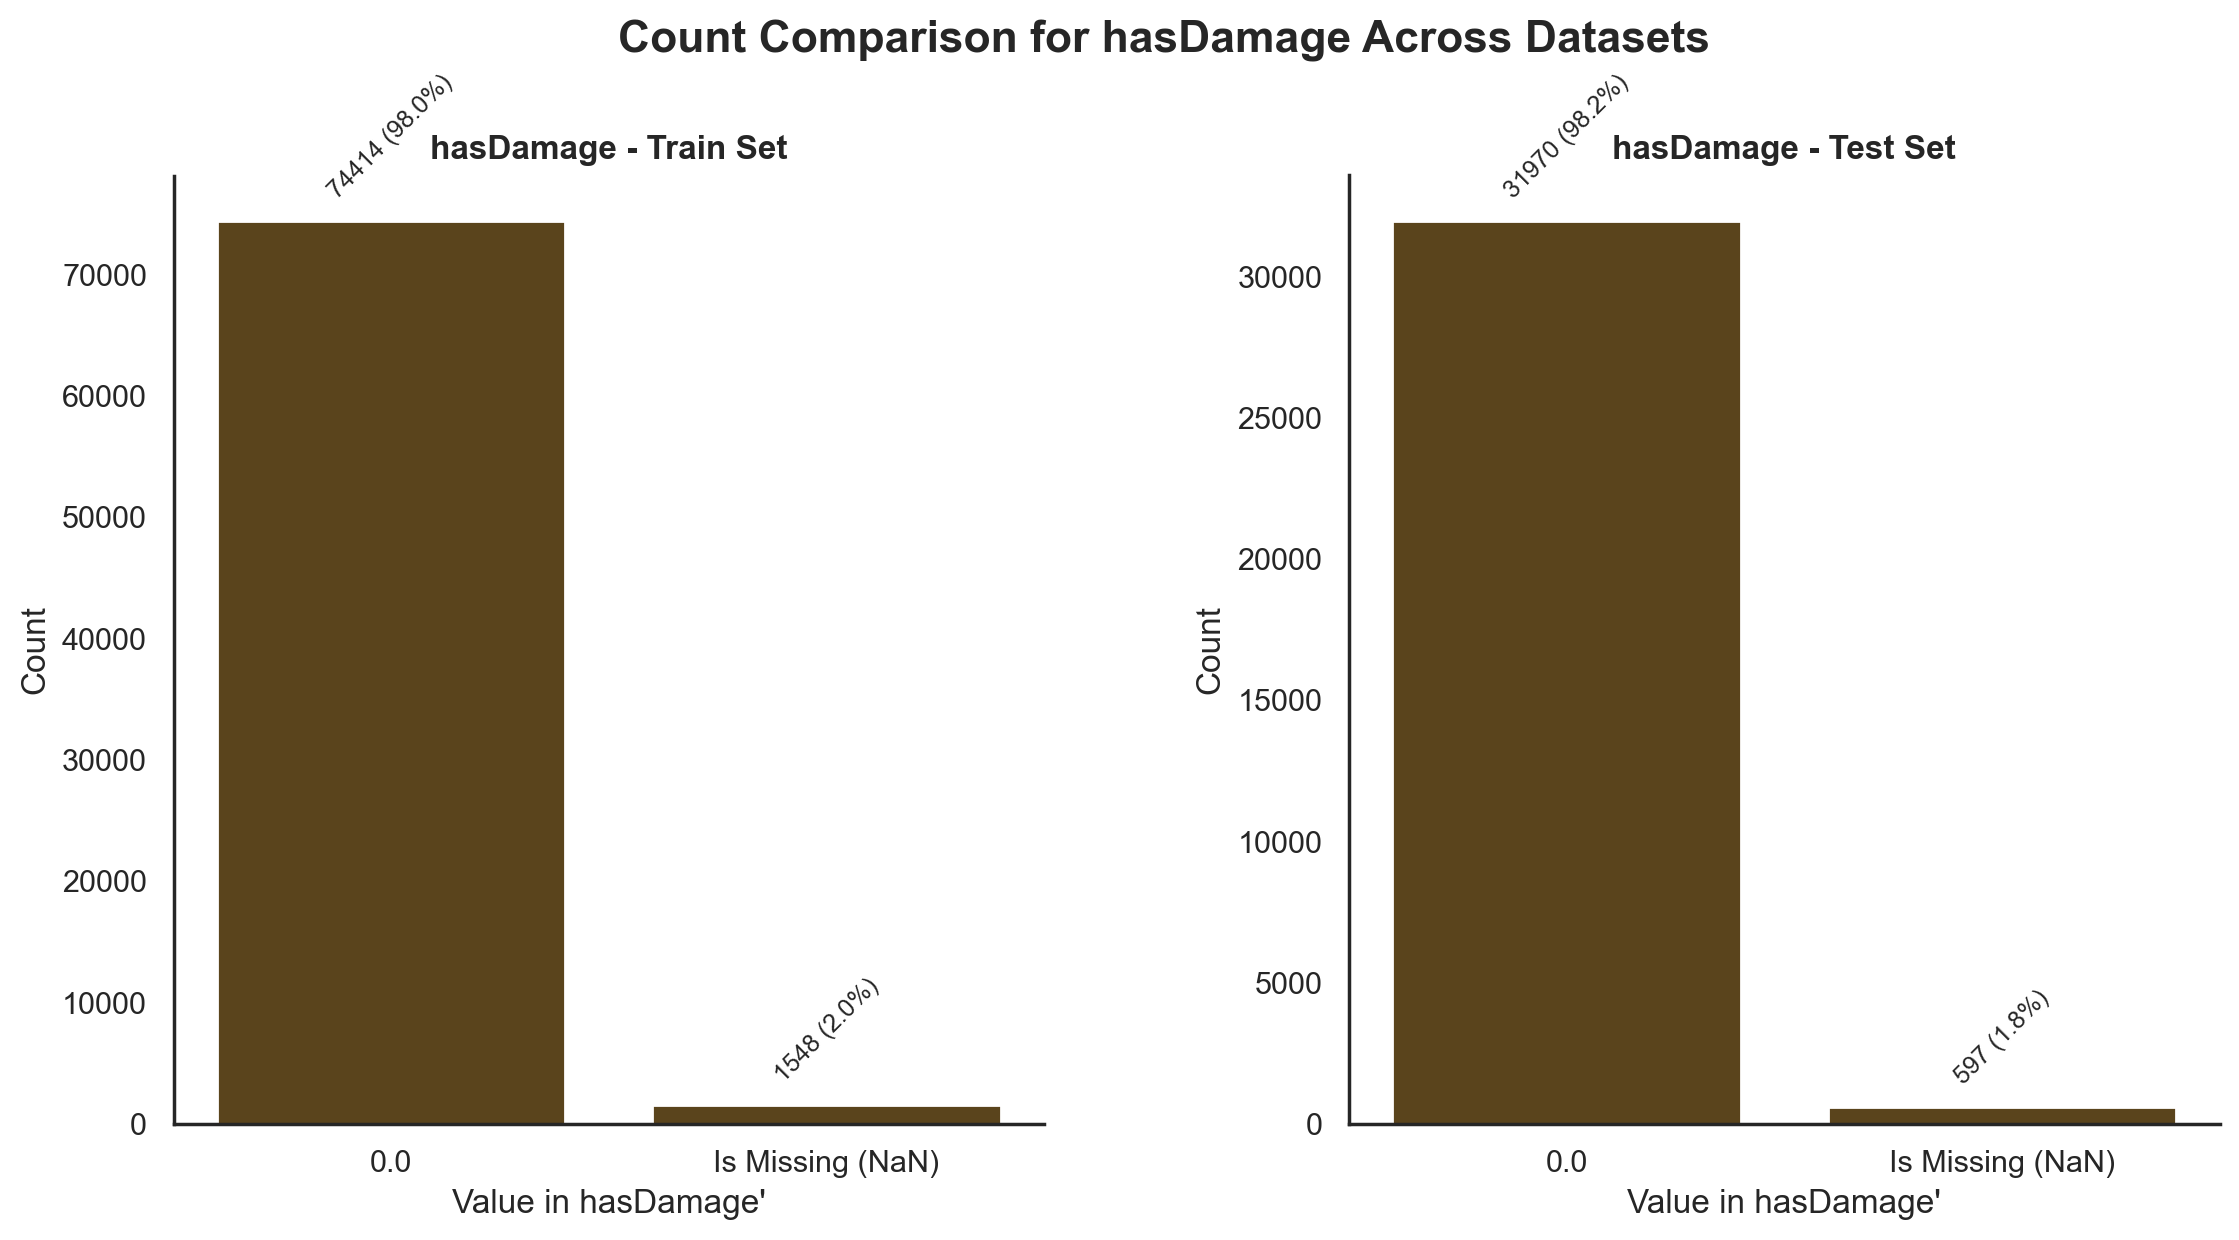

In [25]:
df = {'Train Set': car_eval,
      'Test Set': X_test}

plot_comparison_barplots(df)

<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">
TO DO
</div>

<Figure size 1300x1200 with 0 Axes>

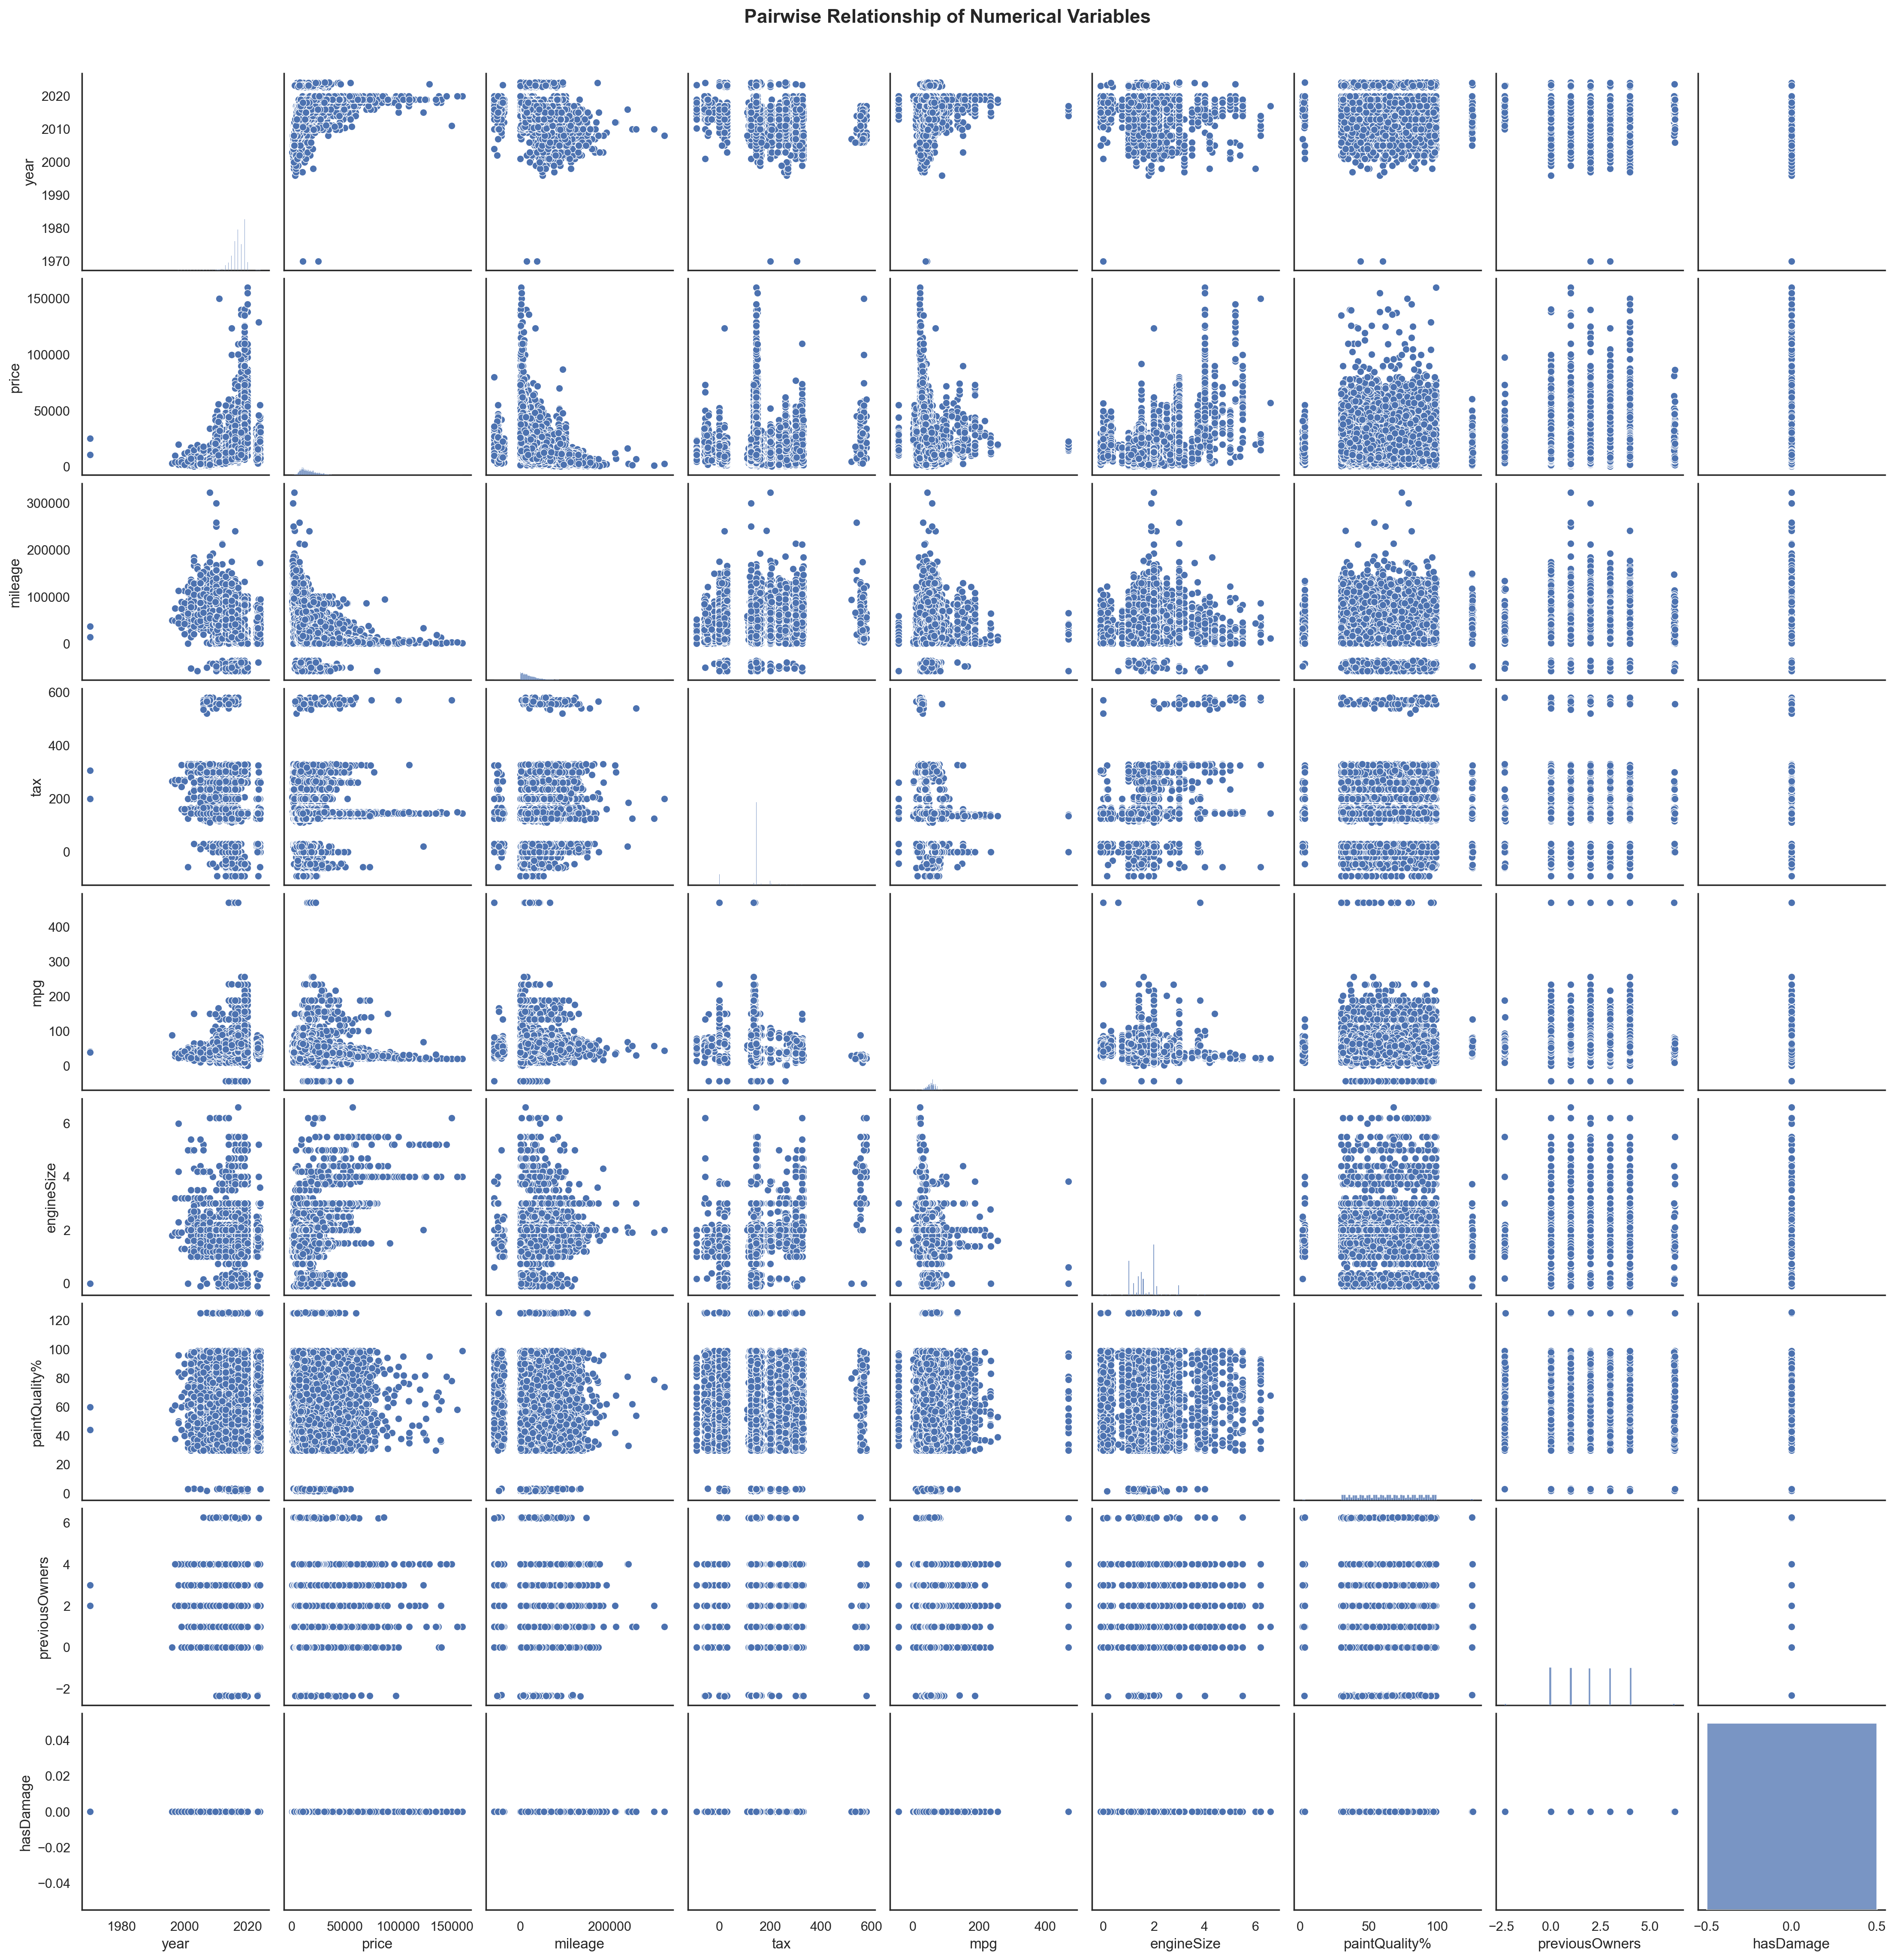

In [26]:
# Pairwise Relationship of Numerical Variables
plt.figure(figsize=(13, 12))
sns.pairplot(car_eval[num], diag_kind='hist')
plt.suptitle('Pairwise Relationship of Numerical Variables', fontweight='bold', fontsize=16, y=1.02)
plt.show()

<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">
TO DO
</div>

In [14]:
X = car_eval.drop(columns=['price'])
y = car_eval[['price']]

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                 test_size = 0.2,
                                                 shuffle = True,
                                                 random_state = 0)

It is essential to split the data into train and validation sets before performing steps such as missing value imputation or scaling, since the model should learn only from the training data. Otherwise, we would be introducing data leakage, which makes the model appear better than it actually is.

In [28]:
# Check for missing values in the training, validation and test sets
train_n = X_train.isnull().sum()
train_pct = (X_train.isnull().mean()*100).round(2)

val_n = X_val.isnull().sum()
val_pct = (X_val.isnull().mean()*100).round(2)

test_n = X_test.isnull().sum()
test_pct = (X_test.isnull().mean()*100).round(2)

# Create a DataFrame to display missing data information
missing_data = pd.DataFrame({
    "Train n": train_n,
    "Train %": train_pct,
    "Validation n": val_n,
    "Validation %": val_pct,
    "Test n": test_n,
    "Test %": test_pct
})

missing_data

Train n  Train %  Validation n  Validation %  Test n  Test %
Brand              1210     1.99           311          2.05     649    1.99
model              1215     2.00           302          1.99     650    2.00
year               1202     1.98           289          1.90     653    2.01
transmission       1233     2.03           289          1.90     623    1.91
mileage            1174     1.93           288          1.90     689    2.12
fuelType           1204     1.98           307          2.02     656    2.01
tax                6341    10.43          1561         10.27    3308   10.16
mpg                6340    10.43          1584         10.43    3288   10.10
engineSize         1174     1.93           342          2.25     628    1.93
paintQuality%      1214     2.00           310          2.04     625    1.92
previousOwners     1221     2.01           329          2.17     597    1.83
hasDamage          1249     2.06           299          1.97     597    1.83

<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">
TO DO
</div>

In [29]:
# ###APAGAR###
# # # Para cada variável, printar os carID que têm missing e entre parêntesis a contagem cumulativa de vezes que esse carID já apareceu como missing

# from collections import Counter
# # Counter to keep track of how many times each carID appears with missing values
# missing_counter = Counter()

# # Iterate over each column
# for col in X_train.columns:
#     # Find rows where the column has missing values
#     missing_mask = X_train[col].isna()
    
#     # Get the carIDs from the index where missing
#     missing_ids = X_train.index[missing_mask].tolist()
    
#     if not missing_ids:
#         print(f'{col}: no missing values')
#         continue
    
#     # For each carID with missing, increment counter and prepare the print
#     prints = []
#     for cid in missing_ids:
#         missing_counter[cid] += 1
#         prints.append(f'{cid} ({missing_counter[cid]})')
    
#     # Print column name followed by carIDs with cumulative missing counts
#     print(f'{col}: ' + ', '.join(prints))

## <span style="color: #ffffff;">2.4 |  Inconsistency Checks</span>

<div style="background-color:#644712c5; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2.4 | Inconsistency Checks</b></span>
    </h1>
</div>

In [30]:
# Get unique counts for each column
unique_counts = car_eval.nunique()

# Filter columns with less than 100 unique values
filtered_col = [col for col in unique_counts.index if unique_counts[col] < 100]

# Display unique values for filtered columns
print("\033[1mUnique values for each column:\033[0m")
for col in filtered_col:
    print(f"{col} ({unique_counts[col]}): {car_eval[col].unique()}\n")


Unique values for each column:
Brand (72): ['VW' 'Toyota' 'Audi' 'Ford' 'BMW' 'Skoda' 'Opel' 'Mercedes' 'FOR'
 'mercedes' 'Hyundai' 'w' 'ord' 'MW' 'bmw' nan 'yundai' 'BM' 'Toyot' 'udi'
 'Ope' 'AUDI' 'V' 'opel' 'pel' 'For' 'pe' 'Mercede' 'audi' 'MERCEDES'
 'OPEL' 'koda' 'FORD' 'Hyunda' 'W' 'Aud' 'vw' 'hyundai' 'skoda' 'ford'
 'TOYOTA' 'ercedes' 'oyota' 'toyota' 'SKODA' 'Skod' 'HYUNDAI' 'kod' 'v'
 'for' 'SKOD' 'aud' 'KODA' 'PEL' 'yunda' 'or' 'UDI' 'OYOTA' 'HYUNDA' 'mw'
 'OPE' 'mercede' 'ERCEDES' 'ercede' 'TOYOT' 'MERCEDE' 'ORD' 'ud' 'ope'
 'AUD' 'hyunda' 'skod' 'toyot']

year (44): [2016.         2019.         2018.         2014.         2017.
 2020.         2013.                   nan 2015.         2023.36707842
 2011.         2012.         2023.1169636  2003.         2009.
 2007.         2005.         2011.11118842 2011.21085349 2023.97731126
 2004.         2010.         2010.56500919 2008.         2024.12175905
 2006.         2023.60527574 2023.38982198 2010.67696784 2001.
 2000.     

We were already aware of many inconsistencies from the word cloud, but here we can get a clearer picture of them. In the next section, we will address the inconsistencies found in the training set and take the opportunity to create general consistency rules that can also be applied to the test set.

### <span style="color: #ffffff;">2.4.1 |  Brand & model</span>

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.4.1 |  Brand & model</b></span>
    </h1>
</div>

<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

DECIDIMOS JUNTAR AS DUAS VARIÁVEIS PORQUE ESTÃO MUITO CORRELACIONADAS

Regarding the variable `Brand`, we already know that there are many spelling errors and inconsistencies 

...

Visualmente conseguimos identificar as allowed_brands que confirmamos que são de facto marcas de carros

In [31]:
### APAGAR ###
#EXPLICAR COMO SE CHEGA À ALLOWED_BRANDS
#FAZER COM QUE O RETIRAR DO brand_model_dic SEJA LOGO NO PROJECT_DATA

#EXPLICAR PORQUÊ QUE FOI PRECISO FAZER O REPLACE DE MERCEDES-BENZ POR MERCEDES

#COMO APLICAR AO VAL E TEST

#VERIFICAR ONDE O MESMO MODELO É USADO EM MARCAS !=

#EXPLICAR COMO SE CHEGOU A BRAND_ALIAS E PREFERRED_BRAND_BY_MODEL E SHORT_OK (E APARECE SÓ NO TRAIN), PORQUÊ QUE ESTAMOS A ASSUMIR

#PENSAR SE TEMOS OU NÃO DATA LEAKAGE

# OS IFS ESTÃO BEM ORDENADOS?

In [32]:
# Function to normalize strings
def norm(s: Optional[str]) -> str:
    if pd.isnull(s):
        return None
    # Separate accents, lowercase, removes spaces
    s = unicodedata.normalize("NFKD", str(s).strip().lower())
    # Remove accents, keeping only the base characters
    s = "".join(ch for ch in s if not unicodedata.combining(ch))
    # Replace non-alphanumeric (e.g. punctuation) characters with a single space
    return re.sub(r"[^a-z0-9]+"," ", s).strip()

def fmatch(q: str, keys, cutoff=0.85):
    # To avoid doing the matching if the query is empty
    if not q: 
        return None
    # If an exact match exists, return it immediately
    if q in keys: 
        return q
    best,score=None,0.0
    for k in keys:
        # Compute similarity ratio (between 0 and 1)
        r = difflib.SequenceMatcher(None, q, k).ratio()
        # Update best match if current is better 
        if r>score: best,score=k,r
    # Return the best match if it meets the cutoff
    return best if score>=cutoff else None 

In [33]:
allowed_brands = ["Volkswagen","Toyota","Audi","Ford","BMW",
                  "Skoda","Opel","Mercedes-Benz","Hyundai"]

# To confirm the allowed brands are in the brand_model_dic
brand_model_dic = brand_model_dic[brand_model_dic["brand"].isin(allowed_brands)].copy()

### APAGAR ### JÁ SABEMOS QUE É BRAND ATÉ USAMOS ANTES, MAS NEM ACHO QUE É PRECISO
# bcol = next(c for c in brand_model_dic.columns if norm(c) in {"brand","marca","make"})
# mcol = next(c for c in brand_model_dic.columns if norm(c) in {"model","modelo"})
#bcol, mcol = "brand", "model"

#To avoid modifying the original
car_catalog = brand_model_dic.copy()
# Standardize brand names and replace 'Mercedes-Benz' with 'Mercedes'
car_catalog["brand"] = car_catalog["brand"].astype(str).str.replace(r"(?i)^mercedes[\s-]*benz$", "Mercedes", regex=True)

NameError: name 'brand_model_dic' is not defined

In [ ]:
# Create a set of normalized brand names from the catalog for matching (using the norm function)
brand_keys_norm = sorted({norm(b) for b in car_catalog["brand"].dropna().astype(str)}) #get rid of NaN, make sure it's str, apply norm, get unique values with set, sort

# Create a dictionary mapping normalized brand names to their display versions
brand_norm2disp = {norm(b):str(b) for b in car_catalog["brand"].dropna().astype(str)}

In [ ]:
# A dictionary that automatically creates an empty dict for any new key (key is the brand, and the value is another dictionary where normalized models are keys and the original model names are values)
models_by_brand = defaultdict(dict)
# Dictionary to hold unique normalized models as keys and the original model names as values (good for when same model is used by different brands)
global_models = {} 
# Dictionary where the key is the normalized model and the value is a set of brands that have that model (to infer the brand from the model)
brands_by_model_norm = defaultdict(set)

# Iterate over each non-null row
for B,M in car_catalog[["brand","model"]].dropna().itertuples(index=False):
    # Normalize brand and model using the norm function
    nb, nm = norm(B), norm(M)
    if nb and nm:
        # Get the display brand name, which will be used as the key in models_by_brand
        disp_brand = brand_norm2disp[nb]
        # Add the normalized model and its original name to the models_by_brand dictionary under the appropriate display brand
        models_by_brand[disp_brand][nm] = str(M)
        # Add the normalized model and its original name to the global_models dictionary if not already present
        global_models.setdefault(nm, str(M))
        # For each normalized model, add the display brand to the set of brands in brands_by_model_norm
        brands_by_model_norm[nm].add(disp_brand)

In [ ]:
###APAGAR###ISTO SERVE PARA QUÊ? E O  # MW/BM
brand_alias = {
    "vw":"volkswagen", "v w":"volkswagen", "w":"volkswagen",
    "mw":"bmw", "m w":"bmw", "bm":"bmw", "b m":"bmw"   # MW/BM -> BMW
}

preferred_brand_by_model = {
    "corsa":"Opel", "shuttle":"Volkswagen",
    "caddy maxi":"Volkswagen", "yeti outdoor":"Skoda",
    "slk":"Mercedes", "zafira tourer":"Opel",
    "up":"Volkswagen","u":"Volkswagen",
}

short_ok = {"ka","tt","cc","iq","sl","slk","up","u"} 
# Function to identify bad short car model names
def is_bad_short(model: str) -> bool:
    q = norm(model)
    # if it has digits, it's not a bad short
    if any(ch.isdigit() for ch in q):  # A3, Q5, 308...
        return False
    # if it's 2 or fewer characters and not in the short_ok list, it's a bad short
    return (len(q) <= 2) and (q not in short_ok)

In [ ]:
# ### APAGAR ###EXATAMENTE O MESMO AQUI
# # t_bcol = next(c for c in train.columns if norm(c) in {"brand","marca","make"})
# # t_mcol = next(c for c in train.columns if norm(c) in {"model","modelo"})


# bn_list, mn_list = [], []
# # For each row in the training set: 
# for b0, m0 in X_train[["Brand", "model"]].itertuples(index=False):
#     nb0, nm0 = norm(b0), norm(m0)

#     # Brand: if it has an alias, use it; otherwise, try to match it
#     b_key = fmatch(brand_alias.get(nb0, nb0), brand_keys_norm, cutoff=0.85)
#     # If a match is found, get the display version; otherwise, set to empty string
#     b = brand_norm2disp.get(b_key, "") if b_key else ""


#     # model:
#     m = ""
#     if nm0:
#         if b and b in models_by_brand: #if model exists and brand exists in models_by_brand, try to find the model for that specific brand
#             k = fmatch(nm0, list(models_by_brand[b].keys()), cutoff=0.85)
#             if k: m = models_by_brand[b][k]
#         if not m: # if model not found for that brand, try to find it in the global_models
#             k = fmatch(nm0, list(global_models.keys()), cutoff=0.78)
#             if k:
#                 m = global_models[k]
#                 # If the model is found globally but the brand is still empty, infer the brand from the model if there's only one candidate
#                 if not b:
#                     cands = list(brands_by_model_norm.get(k, []))
#                     if len(cands) == 1:
#                         b = cands[0]

#     # If brand is still empty but the model is known to be associated with a preferred brand, use that brand
#     if not b and nm0 in preferred_brand_by_model:
#         b = preferred_brand_by_model[nm0]
#         # If model is still empty, keep the original model (m0) without extra spaces
#         if not m: m = str(m0).strip()

#     # use is_bad_short to filter out bad short models
#     if m and is_bad_short(m):
#         m = ""

#     ###APAGAR### PORQUÊ QUE NÃO POMOS O ELSE AQUI TB?
#     # Add the processed brand and model to the bn_list and mn_list
#     bn_list.append(b)
#     mn_list.append(m if m is not None else "")

# # Change 
# X_train["Brand"] = pd.Series(bn_list, index=X_train.index).fillna("").astype(str)
# X_train["model"] = pd.Series(mn_list, index=X_train.index).fillna("").astype(str)

# ###APAGAR### PORQUÊ QUE NÃO SE DEIXOU EMPTY DESDE O INICIO?
# # Replace any empty strings with None (to standardize missing values)
# for c in ["Brand", "model"]:
#     X_train[c] = (
#         X_train[c]
#         .replace("", None, regex=True)
#     )

# print("Light cleaning done — values written to 'Brand' and 'model' ")


In [ ]:
def apply_cleaning(df_to_process, brand_keys_norm, brand_norm2disp, models_by_brand, global_models, brands_by_model_norm, brand_alias, preferred_brand_by_model, short_ok):
    bn_list, mn_list = [], []

    # For each row in the training/validation/test set: 
    for b0, m0 in df_to_process[["Brand", "model"]].itertuples(index=False):
        nb0, nm0 = norm(b0), norm(m0)
        
        # Brand: if it has an alias, use it; otherwise, try to match it
        b_key = fmatch(brand_alias.get(nb0, nb0), brand_keys_norm, cutoff=0.85)
        # If a match is found, get the display version; otherwise, set to empty string
        b = brand_norm2disp.get(b_key, "") if b_key else ""
        
        # model:
        m = ""
        if nm0:
            if b and b in models_by_brand: #if model exists and brand exists in models_by_brand, try to find the model for that specific brand
                k = fmatch(nm0, list(models_by_brand[b].keys()), cutoff=0.85)
                if k: m = models_by_brand[b][k]
            if not m: # if model not found for that brand, try to find it in the global_models
                k = fmatch(nm0, list(global_models.keys()), cutoff=0.78)
                if k:
                    m = global_models[k]
                    # If the model is found globally but the brand is still empty, infer the brand from the model if there's only one candidate
                    if not b:
                        cands = list(brands_by_model_norm.get(k, []))
                        if len(cands) == 1:
                            b = cands[0]

        # If brand is still empty but the model is known to be associated with a preferred brand, use that brand
        if not b and nm0 in preferred_brand_by_model:
            b = preferred_brand_by_model[nm0]
            # If model is still empty, keep the original model (m0) without extra spaces
            if not m: m = str(m0).strip()

        # use is_bad_short to filter out bad short models
        if m and is_bad_short(m):
            m = ""

        # Add the processed brand and model to the lists
        bn_list.append(b)
        mn_list.append(m if m is not None else "")
        
    # Update the actual DataFrame
    df_to_process["Brand"] = pd.Series(bn_list, index=df_to_process.index).fillna("").astype(str)
    df_to_process["model"] = pd.Series(mn_list, index=df_to_process.index).fillna("").astype(str)

    # Replace any empty strings with None (to standardize missing values)
    for c in ["Brand", "model"]:
        df_to_process[c] = (
            df_to_process[c]
            .replace("", None, regex=True)
        )
    return df_to_process

In [ ]:
X_train = apply_cleaning(
    X_train, 
    brand_keys_norm, 
    brand_norm2disp, 
    models_by_brand, 
    global_models, 
    brands_by_model_norm, 
    brand_alias, 
    preferred_brand_by_model, 
    short_ok
)
print("Light cleaning done in X_train — values written to 'Brand' and 'model'")

X_val = apply_cleaning(
    X_val, 
    brand_keys_norm, 
    brand_norm2disp, 
    models_by_brand, 
    global_models, 
    brands_by_model_norm, 
    brand_alias, 
    preferred_brand_by_model, 
    short_ok
)
print("Light cleaning done in X_val — values written to 'Brand' and 'model'")

X_test = apply_cleaning(
    X_test, 
    brand_keys_norm, 
    brand_norm2disp, 
    models_by_brand, 
    global_models, 
    brands_by_model_norm, 
    brand_alias, 
    preferred_brand_by_model, 
    short_ok
)
print("Light cleaning done in X_test — values written to 'Brand' and 'model'")

In [ ]:
print("Unique brands in training set:", X_train['Brand'].unique())
print("Unique models in training set:", X_train['model'].unique())

### <span style="color: #ffffff;">2.4.2 |  year</span>

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.4.2 |  year</b></span>
    </h1>
</div>

<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

Regarding the `year` variable, we know that the year must be a positive integer, so we will truncate the decimal values and take their absolute value. We also know that cars cannot have a year later than the current year. Additionally, we will consider that a car cannot be older than [30](https://www.fbhvc.co.uk/news/article/eu-parliament-re-defines-historic-vehicles?.com) years to be sold on this platform. Any values outside this range will be considered errors and will be rounded to the nearest limit. Although in this dataset no cars are older than 30 years, including this rule improves the generalization and robustness of the preprocessing for future datasets that may contain such cases.


**<span style="color:red">PROCURAR UMA FONTE MELHOR.</span>**


In [ ]:
# 'year' has to be a positive integer and between 30 years ago and now

# Convert 'year' to integer and take absolute value; if NaN, keep as NaN
X_train["year"] = X_train["year"].apply(lambda x: abs(int(x)) if pd.notnull(x) else x)


current_year = datetime.now().year
# correct values outside the range [current_year-30, current_year] to the closest limit
X_train.loc[(X_train["year"] < current_year-30), "year"] = current_year-30
X_train.loc[(X_train["year"] > current_year), "year"] = current_year


# do exactly the same for the validation and test set
X_val["year"] = X_val["year"].apply(lambda x: abs(int(x)) if pd.notnull(x) else x)
X_val.loc[(X_val["year"] < current_year-30), "year"] = current_year-30
X_val.loc[(X_val["year"] > current_year), "year"] = current_year

X_test["year"] = X_test["year"].apply(lambda x: abs(int(x)) if pd.notnull(x) else x)
X_test.loc[(X_test["year"] < current_year-30), "year"] = current_year-30
X_test.loc[(X_test["year"] > current_year), "year"] = current_year

In [ ]:
print("Unique years in training set:", X_train['year'].unique())

### <span style="color: #ffffff;">2.4.4 |  transmission</span>

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.4.4 |  transmission</b></span>
    </h1>
</div>

<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

Regarding the `transmission` variable, by combining domain knowledge with the unique values observed in the dataset, we identified the possible valid transmission types as *manual*, *automatic*, *semi-auto*, *unknown* (which we consider as missing), and *other*. To correct typographical and formatting errors, we created a generic function called `correct`, which normalizes values (lowercasing and trimming spaces) and uses fuzzy matching to map each entry to the closest valid category. Missing values are kept as they are and will be handled later. This function can also be applied to other variables that exhibit similar inconsistencies.


APAGAR, ESTE TEXTO ESTÁ DESATUALIZADO AGORA

In [ ]:
###APAGAR### AINDA SÓ ESTÁ APLICADO AO TRAIN É PRECISO GENERALIZAR PARA VAL E TEST

In [ ]:
def correct(
    input_value: Optional[str],
    valid_values: list,
    threshold: float = 0.85,
    fallback_value: str = "unknown"
) -> str:
    """
    Normalizes the input and finds the closest valid value using SequenceMatcher.
    Returns the fallback_value if no match reaches the threshold.    
    """
    # Create a dictionary mapping normalized version to the original value
    normalized_dict = {}
    for value in valid_values:
        normalized = norm(value)
        if normalized:
            normalized_dict[normalized] = value

    # Normalize the input
    normalized_input = norm(input_value)
    if normalized_input is None or normalized_input == "":
        return fallback_value

    best_score = 0.0
    best_match = fallback_value

    # Iterate over normalized keys of valid values
    for candidate_norm, original_value in normalized_dict.items():
        # Use SequenceMatcher to calculate similarity (0.0 to 1.0)
        score = SequenceMatcher(None, normalized_input, candidate_norm).ratio()
        if score > best_score:
            best_score = score
            best_match = original_value

    # Return the best match if it passes the threshold, otherwise fallback
    return best_match if best_score >= threshold else fallback_value


In [ ]:
#### APAGAR ### ESTE NÃO ESTÁ ATUALIZADO
# def clean_simple_categorical(df_target: pd.DataFrame, col_to_clean: str, valid_values: Dict[str, str], threshold: float = 0.80) -> pd.DataFrame:
#     """
#     Applies fuzzy matching and standardization to a column with a fixed set of valid values 
#     (like transmission or fuel type), using the mapping logic inspired by find_transmission.
    
#     Args:
#         df_target (pd.DataFrame): The DataFrame to be cleaned.
#         col_to_clean (str): The column name in df_target to be cleaned.
#         valid_values (dict): Dictionary where keys are normalized valid strings (from norm()) 
#                              and values are the desired display strings (e.g., {'manual': 'Manual'}).
#         threshold (float): Minimum similarity score required for a match.
#     """
    
#     # 1. Prepare Keys and Normalization Map
#     # Keys are the normalized versions of the valid display values
#     candidate_keys_norm = {norm(display_val): norm_val for norm_val, display_val in valid_values.items()}
    
#     # Find the actual column name in the DataFrame (case-insensitive check)
#     try:
#         t_col = next(c for c in df_target.columns if norm(c) == norm(col_to_clean))
#     except StopIteration:
#         print(f"Warning: Column '{col_to_clean}' not found in DataFrame. Skipping.")
#         return df_target

#     cleaned_values = []
    
#     for original_value in df_target[t_col].astype(str).str.strip():
        
#         # 1. Handle Missing Values First (Must be done before norm() if norm() returns "")
#         if pd.isnull(original_value) or original_value.lower() in ('nan', 'none', ''):
#             cleaned_values.append(None) # Keep as NaN/None
#             continue

#         normalized_input = norm(original_value)
        
#         # 2. Fuzzy Matching using the pre-calculated keys
#         best_score = 0.0
#         best_match_display = 'unknown'
        
#         # Optimization: If normalized input is an exact match to a normalized key
#         if normalized_input in candidate_keys_norm:
#             best_score = 1.0
#             best_match_display = candidate_keys_norm[normalized_input]
        
#         else:
#             # Perform fuzzy matching against all normalized keys
#             for candidate_norm, display_value in candidate_keys_norm.items():
#                 score = difflib.SequenceMatcher(None, normalized_input, candidate_norm).ratio()
                
#                 if score > best_score:
#                     best_score = score
#                     best_match_display = display_display # Use the actual display value for the match

#         # 3. Final Assignment
#         if best_score >= threshold:
#             final_value = best_match_display
#         else:
#             # If no match, assign 'unknown' (or keep None if it was originally missing)
#             final_value = 'unknown' 
            
#         cleaned_values.append(final_value)

#     # Update the actual DataFrame column
#     df_target[t_col] = pd.Series(cleaned_values, index=df_target.index)
#     print(f"Simple Cleaning applied to column: {col_to_clean}")
#     return df_target

In [ ]:
transmission_uniques = ['manual', 'automatic', 'semi-auto', 'unknown', 'other']

X_train["transmission"] = X_train["transmission"].apply(
    lambda x: correct(x, transmission_uniques, fallback_value="unknown")
)

In [ ]:
print("Unique transmission types in training set:", X_train['transmission'].unique())

In [ ]:
# We consider that 'unknown' is the same as missing
X_train['transmission'] = X_train['transmission'].replace('unknown', np.nan)
#X_val['transmission'] = X_val['transmission'].replace('unknown', np.nan)
#X_test['transmission'] = X_test['transmission'].replace('unknown', np.nan)

In [ ]:
# ###APAGAR###
# car_eval['transmission'] = car_eval['transmission'].apply(correct_transmission)

# mean_unknown = car_eval.loc[car_eval['transmission'] == 'unknown', 'price'].mean()
# median_unknown = car_eval.loc[car_eval['transmission'] == 'unknown', 'price'].median()
# std_unknown = car_eval.loc[car_eval['transmission'] == 'unknown', 'price'].std()

# mean_known = car_eval.loc[car_eval['transmission'] != 'unknown', 'price'].mean()
# median_known = car_eval.loc[car_eval['transmission'] != 'unknown', 'price'].median()
# std_known = car_eval.loc[car_eval['transmission'] != 'unknown', 'price'].std()

# print("Stats for 'unknown' transmission:")
# print("Mean:", mean_unknown, "Median:", median_unknown, "Std:", std_unknown)
# print("Stats for known transmissions:")
# print("Mean:", mean_known, "Median:", median_known, "Std:", std_known)


#--------------------------------------------------------
# Stats for 'unknown' transmission:
# Mean: 16857.379076086956 Median: 14688.0 Std: 9418.2313820754
# Stats for known transmissions:
# Mean: 16882.129324667385 Median: 14699.0 Std: 9740.05268596625

In [ ]:
# ###APAGAR###
# mean_nan = car_eval.loc[car_eval['transmission'].isna(), 'price'].mean()
# median_nan = car_eval.loc[car_eval['transmission'].isna(), 'price'].median()
# std_nan = car_eval.loc[car_eval['transmission'].isna(), 'price'].std()

# mean_not_nan = car_eval.loc[car_eval['transmission'].notna(), 'price'].mean()
# median_not_nan = car_eval.loc[car_eval['transmission'].notna(), 'price'].median()
# std_not_nan = car_eval.loc[car_eval['transmission'].notna(), 'price'].std()

# print("Stats for 'NaN' transmission:")
# print("Mean:", mean_nan, "Median:", median_nan, "Std:", std_nan)
# print("Stats for known transmissions:")
# print("Mean:", mean_not_nan, "Median:", median_not_nan, "Std:", std_not_nan)



#--------------------------------------------------------
# Stats for 'NaN' transmission:
# Mean: 16864.080157687255 Median: 14669.5 Std: 9465.81339565881
# Stats for known transmissions:
# Mean: 16882.253629904233 Median: 14699.0 Std: 9742.451484229981

### <span style="color: #ffffff;">2.4.5 |  mileage</span>

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.4.5 |  mileage</b></span>
    </h1>
</div>

<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

Regarding the `mileage` variable, we know that the it must be a positive value but we have some cases of negative mileage. For that reason we are going to na

In [ ]:
### APAGAR ### PODEMOS CONSIDERAR OS VALORES NEGATIVOS COMO POSITIVOS OU PÔR A MISSING E TARTAR DEPOIS

## Consistência com year

In [ ]:
# Median, mean and standard deviation of cars' mileage before and after year 2017
median_before_2017 = X_train.loc[X_train['year'] < 2017, 'mileage'].median()
mean_before_2017 = X_train.loc[X_train['year'] < 2017, 'mileage'].mean()
std_before_2017 = X_train.loc[X_train['year'] < 2017, 'mileage'].std()
median_after_2017 = X_train.loc[X_train['year'] >= 2017, 'mileage'].median()
mean_after_2017 = X_train.loc[X_train['year'] >= 2017, 'mileage'].mean()
std_after_2017 = X_train.loc[X_train['year'] >= 2017, 'mileage'].std()
print("Mileage stats for cars before 2017:")
print("Median:", median_before_2017, "Mean:", mean_before_2017, "Std:", std_before_2017)
print("Mileage stats for cars from 2017 and after:")
print("Median:", median_after_2017, "Mean:", mean_after_2017, "Std:", std_after_2017)

In [ ]:
# Median, mean and standard deviation of cars' price for mileage <0 and from 0 to Q1 
median_mileage_neg = car_eval.loc[car_eval['mileage'] < 0, 'price'].median()
mean_mileage_neg = car_eval.loc[car_eval['mileage'] < 0, 'price'].mean()
std_mileage_neg = car_eval.loc[car_eval['mileage'] < 0, 'price'].std()
median_mileage_0_Q1 = car_eval.loc[(car_eval['mileage'] >= 0) & (car_eval['mileage'] <= car_eval['mileage'].quantile(0.25)), 'price'].median()
mean_mileage_0_Q1 = car_eval.loc[(car_eval['mileage'] >= 0) & (car_eval['mileage'] <= car_eval['mileage'].quantile(0.25)), 'price'].mean()
std_mileage_0_Q1 = car_eval.loc[(car_eval['mileage'] >= 0) & (car_eval['mileage'] <= car_eval['mileage'].quantile(0.25)), 'price'].std()
print("Price stats for cars with mileage < 0:")
print("Median:", median_mileage_neg, "Mean:", mean_mileage_neg, "Std:", std_mileage_neg)
print("Price stats for cars with mileage between 0 and Q1:")
print("Median:", median_mileage_0_Q1, "Mean:", mean_mileage_0_Q1, "Std:", std_mileage_0_Q1)

In [ ]:
# Median, mean and standard deviation of cars' price for mileage <0 and from 0 to 10
median_mileage_0_500 = car_eval.loc[(car_eval['mileage'] >= 0) & (car_eval['mileage'] <= 10), 'price'].median()
mean_mileage_0_500 = car_eval.loc[(car_eval['mileage'] >= 0) & (car_eval['mileage'] <= 10), 'price'].mean()
std_mileage_0_500 = car_eval.loc[(car_eval['mileage'] >= 0) & (car_eval['mileage'] <= 10), 'price'].std()
print("Price stats for cars with mileage < 0:")
print("Median:", median_mileage_neg, "Mean:", mean_mileage_neg, "Std:", std_mileage_neg)
print("Price stats for cars with mileage between 0 and 500:")
print("Median:", median_mileage_0_500, "Mean:", mean_mileage_0_500, "Std:", std_mileage_0_500)

In [ ]:
# Convert 'mileage' to float; if negative, set to absolute value; if NaN, keep as NaN
X_train["mileage"] = X_train["mileage"].apply(
    lambda x: float(x) if pd.notnull(x) and x >= 0 else (abs(float(x)) if pd.notnull(x) else np.nan)
)

# Do exactly the same for the validation and test set
X_val["mileage"] = X_val["mileage"].apply(
    lambda x: float(x) if pd.notnull(x) and x >= 0 else (abs(float(x)) if pd.notnull(x) else np.nan)
)
X_test["mileage"] = X_test["mileage"].apply(
    lambda x: float(x) if pd.notnull(x) and x >= 0 else (abs(float(x)) if pd.notnull(x) else np.nan)
)

### <span style="color: #ffffff;">2.4.6 |  fuelType</span>

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.4.6 |  fuelType</b></span>
    </h1>
</div>

<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

Regarding the `fuelType` variable, by combining domain knowledge with the unique values observed in the dataset, we identified the possible valid fuel types as *petrol*, *diesel*, *hybrid*, *electric*, and *other*. To correct typographical and formatting errors, we applied the previously created `correct` function.
</div>


In [ ]:
fueltype_uniques = ['petrol', 'diesel', 'hybrid', 'electric', 'other']

# Apply the correction function to the 'fuelType' column
X_train['fuelType'] = X_train['fuelType'].apply(
    lambda x: correct(x, fueltype_uniques, fallback_value="other")
)
#X_val['fuelType']
#X_test['fuelType']

In [ ]:
print("Unique fuel types in training set:", X_train['fuelType'].unique())

In [ ]:
### APAGAR ###
# for 'eletric' and 'hybrid', print the unique engine sizes and mpg values to check for inconsistencies
print("Engine sizes for 'electric' in training set:", X_train.loc[X_train['fuelType'] == 'electric', 'engineSize'].unique())
print("MPG values for 'electric' in training set:", X_train.loc[X_train['fuelType'] == 'electric', 'mpg'].unique())
print("Engine sizes for 'hybrid' in training set:", X_train.loc[X_train['fuelType'] == 'hybrid', 'engineSize'].unique())
print("MPG values for 'hybrid' in training set:", X_train.loc[X_train['fuelType'] == 'hybrid', 'mpg'].unique())

### <span style="color: #ffffff;">2.4.7 |  tax</span>

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.4.7 |  tax</b></span>
    </h1>
</div>

In [ ]:
# É MELHOR TESTAR SE FUNCIONA MELHOR PONDO A ZERO OU VALOR ABS OU MISSING
#CRIAR UMA FUNÇÃO PARA INCONSISTÊNCIAS DE VARIÁVEIS NUMÉRICAS E OUTRA QUE CRIA A SOBREPOSIÇÃO DE GRÁFICOS

# Max within reason: "Drivers of less fuel-efficient cars pay more, up to a maximum of £5490" (Gov.uk)
# Floats: Several values are fractional (non-integers). why? there is no oficial float value for road tax brackets (MAS EXISTEM FLOATS)
# (1) Round to Nearest Integer
#car_eval['tax'] = car_eval['tax'].round().astype(int)


## Eletric accounts for a miniscule proportion, that would not justify the zeros. Hybrid counts for roughtly 3%, yet hybrid veicles still pay >0 tax according to research
## Hence, it is not clear at this moment why such a significant amount of zero tax vehicles.
#SUPOSTO HAVER TAX ZERO PARA ELETRIC?


## Most zeros are for fossil-fuel vehicles. Other possiblilites for zero tax: 
## Disable users, historic veicles (<1985), vehicles use for agriculture, other zero emission vehicles (Gov.Uk). Hence, it is plausible this proportion of zeros.

In [ ]:
#% of negative, positive, nan and zero values in tax 
tax_negative = (car_eval['tax'] < 0).mean() * 100
tax_positive = (car_eval['tax'] > 0).mean() * 100 
tax_zero = (car_eval['tax'] == 0).mean() * 100 
tax_nan = (car_eval['tax'].isna()).mean() * 100 
print(f"Negative tax values: {tax_negative:.2f}%") 
print(f"Positive tax values: {tax_positive:.2f}%") 
print(f"Zero tax values: {tax_zero:.2f}%") 
print(f"NaN tax values: {tax_nan:.2f}%")

In [ ]:
# For tax=0 group by fuelType and count occurrences
tax_zero_fuel_counts = X_train.loc[X_train['tax'] == 0, 'fuelType'].value_counts()
print("Counts of fuel types for tax=0:")
print(tax_zero_fuel_counts)

# For tax=0 group by fuelType and count occurrences

In [ ]:
# Median, mean and standard deviation of cars' price for tax <0 and 0<=tax<= abs(min(tax)) 
median_tax_neg = car_eval.loc[car_eval['tax'] < 0, 'price'].median()
mean_tax_neg = car_eval.loc[car_eval['tax'] < 0, 'price'].mean()
std_tax_neg = car_eval.loc[car_eval['tax'] < 0, 'price'].std()
median_tax_0_min = car_eval.loc[(car_eval['tax'] >= 0) & (car_eval['tax'] <= abs(car_eval['tax'].min())), 'price'].median()
mean_tax_0_min = car_eval.loc[(car_eval['tax'] >= 0) & (car_eval['tax'] <= abs(car_eval['tax'].min())), 'price'].mean()
std_tax_0_min = car_eval.loc[(car_eval['tax'] >= 0) & (car_eval['tax'] <= abs(car_eval['tax'].min())), 'price'].std()
print("Price stats for cars with tax < 0:")
print("Median:", median_tax_neg, "Mean:", mean_tax_neg, "Std:", std_tax_neg)
print("Price stats for cars with tax between 0 and abs(min(tax)):")
print("Median:", median_tax_0_min, "Mean:", mean_tax_0_min, "Std:", std_tax_0_min)

In [ ]:
# Convert 'tax' to float; if negative, set to absolute value; if NaN, keep as NaN
X_train["tax"] = X_train["tax"].apply(
    lambda x: float(x) if pd.notnull(x) and x >= 0 else (abs(float(x)) if pd.notnull(x) else np.nan)
)

# Do exactly the same for the validation and test set
X_val["tax"] = X_val["tax"].apply(
    lambda x: float(x) if pd.notnull(x) and x >= 0 else (abs(float(x)) if pd.notnull(x) else np.nan)
)
X_test["tax"] = X_test["tax"].apply(
    lambda x: float(x) if pd.notnull(x) and x >= 0 else (abs(float(x)) if pd.notnull(x) else np.nan)
)

In [ ]:
### APAGAR ### TORNAR O GRÁFICO MELHOR

price_tax_neg = car_eval.loc[car_eval['tax'] < 0, 'price']
#price_tax_0_min = car_eval.loc[(car_eval['tax'] >= 0) & (car_eval['tax'] <= abs(car_eval['tax'].min())), 'price']
price_tax_0_min = car_eval.loc[(car_eval['tax'] >= 0) & (car_eval['tax'] == 0), 'price']

plt.figure(figsize=(10,6))
plt.hist(price_tax_neg, bins=30, alpha=0.6, label='Tax < 0', color='red', density=True)
plt.hist(price_tax_0_min, bins=30, alpha=0.6, label='0 <= Tax <= abs(min)', color='blue', density=True)

plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Price Distribution by Tax Category')
plt.legend()
plt.show()


### <span style="color: #ffffff;">2.4.8 |  mpg</span>

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.4.8 |  mpg</b></span>
    </h1>
</div>

In [ ]:
# Valores negativos ou extremamente altos.

# Inconsistência com fuelType (um híbrido/eléctrico sem consumo de gasolina/diesel).

In [ ]:
# Median, mean and standard deviation of cars' price for mpg <0 and 0<=mpg<= abs(min(tax)) 
median_mpg_neg = car_eval.loc[car_eval['mpg'] < 0, 'price'].median()
mean_mpg_neg = car_eval.loc[car_eval['mpg'] < 0, 'price'].mean()
std_mpg_neg = car_eval.loc[car_eval['mpg'] < 0, 'price'].std()
median_mpg_0_min = car_eval.loc[(car_eval['mpg'] >= 0) & (car_eval['mpg'] <= abs(car_eval['mpg'].min())), 'price'].median()
mean_mpg_0_min = car_eval.loc[(car_eval['mpg'] >= 0) & (car_eval['mpg'] <= abs(car_eval['mpg'].min())), 'price'].mean()
std_mpg_0_min = car_eval.loc[(car_eval['mpg'] >= 0) & (car_eval['mpg'] <= abs(car_eval['mpg'].min())), 'price'].std()
print("Price stats for cars with mpg < 0:")
print("Median:", median_mpg_neg, "Mean:", mean_mpg_neg, "Std:", std_mpg_neg)
print("Price stats for cars with mpg between 0 and abs(min(mpg)):")
print("Median:", median_mpg_0_min, "Mean:", mean_mpg_0_min, "Std:", std_mpg_0_min)

In [ ]:
# Convert 'mpg' to float; if negative, set to absolute value; if NaN, keep as NaN
X_train["mpg"] = X_train["mpg"].apply(
    lambda x: float(x) if pd.notnull(x) and x >= 0 else (abs(float(x)) if pd.notnull(x) else np.nan)
)

# Do exactly the same for the validation and test set
X_val["mpg"] = X_val["mpg"].apply(
    lambda x: float(x) if pd.notnull(x) and x >= 0 else (abs(float(x)) if pd.notnull(x) else np.nan)
)
X_test["mpg"] = X_test["mpg"].apply(
    lambda x: float(x) if pd.notnull(x) and x >= 0 else (abs(float(x)) if pd.notnull(x) else np.nan)
)

### <span style="color: #ffffff;">2.4.9 |  engineSize</span>

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.4.9 |  engineSize</b></span>
    </h1>
</div>

In [ ]:
# Valores negativos ou zeros.

# Inconsistência com fuelType (por ex., um motor elétrico não tem litros)

In [ ]:
# Convert 'engineSize' to float; if negative, set to absolute value; if NaN, keep as NaN
X_train["engineSize"] = X_train["engineSize"].apply(
    lambda x: float(x) if pd.notnull(x) and x >= 0 else (abs(float(x)) if pd.notnull(x) else np.nan)
)

# Do exactly the same for the validation and test set
X_val["engineSize"] = X_val["engineSize"].apply(
    lambda x: float(x) if pd.notnull(x) and x >= 0 else (abs(float(x)) if pd.notnull(x) else np.nan)
)
X_test["engineSize"] = X_test["engineSize"].apply(
    lambda x: float(x) if pd.notnull(x) and x >= 0 else (abs(float(x)) if pd.notnull(x) else np.nan)
)

### <span style="color: #ffffff;">2.4.10 |  paintQuality%</span>

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.4.10 |  paintQuality%</b></span>
    </h1>
</div>

In [ ]:
#ENTRE  3.254760 E 30 NÃO HÁ NADA E ABAIXO DE 3.254760 E ACIMA 100 SÃO OS ÚNICOS COM CASAS DECIMAIS 

In [ ]:
# % of cases with paintQuality% between 0-100, NaN and beyond 100
paint_quality_valid = ((X_train['paintQuality%'] >= 0) & (X_train['paintQuality%'] <= 100)).mean() * 100
paint_quality_nan = (X_train['paintQuality%'].isna()).mean() * 100
paint_quality_out_of_range = ((X_train['paintQuality%'] < 0) | (X_train['paintQuality%'] > 100)).mean() * 100
print(f"Valid paintQuality (0-100): {paint_quality_valid:.2f}%")
print(f"NaN paintQuality: {paint_quality_nan:.2f}%")
print(f"Out of range paintQuality (<0 or >100): {paint_quality_out_of_range:.2f}%")

In [ ]:
# Median, mean and standard deviation of cars' price for paintQuality% >100 and 95<=paintQuality%<= 100
median_paint_above_100 = car_eval.loc[car_eval['paintQuality%'] >100, 'price'].median()
mean_paint_above_100 = car_eval.loc[car_eval['paintQuality%'] >100, 'price'].mean()
std_paint_above_100 = car_eval.loc[car_eval['paintQuality%'] >100, 'price'].std()
median_paint_95_100 = car_eval.loc[(car_eval['paintQuality%'] >= 95) & (car_eval['paintQuality%'] <= 100), 'price'].median()
mean_paint_95_100 = car_eval.loc[(car_eval['paintQuality%'] >= 95) & (car_eval['paintQuality%'] <= 100), 'price'].mean()
std_paint_95_100 = car_eval.loc[(car_eval['paintQuality%'] >= 95) & (car_eval['paintQuality%'] <= 100), 'price'].std()
print("Price stats for cars with paintQuality > 100:")
print("Median:", median_paint_above_100, "Mean:", mean_paint_above_100, "Std:", std_paint_above_100)
print("Price stats for cars with paintQuality between 95 and 100:")
print("Median:", median_paint_95_100, "Mean:", mean_paint_95_100, "Std:", std_paint_95_100)

In [ ]:
# Clip 'paintQuality%' to be within [0, 100]; if NaN, keep as NaN
X_train["paintQuality%"] = (
    pd.to_numeric(X_train["paintQuality%"], errors="coerce")
      .clip(lower=0, upper=100)                             
)

# Do exactly the same for the validation and test set
X_val["paintQuality%"] = (
    pd.to_numeric(X_val["paintQuality%"], errors="coerce")
      .clip(lower=0, upper=100)                             
)
X_test["paintQuality%"] = (
    pd.to_numeric(X_test["paintQuality%"], errors="coerce")
      .clip(lower=0, upper=100)
)

### <span style="color: #ffffff;">2.4.11 |  previousOwners</span>

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.4.11 |  previousOwners</b></span>
    </h1>
</div>

In [ ]:
# Valores negativos ou irrealisticamente altos. QUAL CORR COM YEARS E MILEAGE

In [ ]:
# Convert 'previousOwners' to int; if negative, set to absolute value; if NaN, keep as NaN
X_train["previousOwners"] = X_train["previousOwners"].apply(
    lambda x: int(x) if pd.notnull(x) and x >= 0 else (abs(int(x)) if pd.notnull(x) else np.nan)
)

# Do exactly the same for the validation and test set
X_val["previousOwners"] = X_val["previousOwners"].apply(
    lambda x: int(x) if pd.notnull(x) and x >= 0 else (abs(int(x)) if pd.notnull(x) else np.nan)
)
X_test["previousOwners"] = X_test["previousOwners"].apply(
    lambda x: int(x) if pd.notnull(x) and x >= 0 else (abs(int(x)) if pd.notnull(x) else np.nan)
)

### <span style="color: #ffffff;">2.4.12 |  hasDamage</span>

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.4.12 |  hasDamage</b></span>
    </h1>
</div>

In [ ]:
### APAGAR ### OBVIAMENTE TESTAR SE FUNCIONA MELHOR PÔR A ZERO OU A 1

In [ ]:
train_0 = car_eval[car_eval["hasDamage"]== 0]
train_nan = car_eval[~(car_eval["hasDamage"] == 0)]
print("Price stats for cars with hasDamage == 0:")
print("Median:", train_0['price'].median(), "Mean:", train_0['price'].mean(), "Std:", train_0['price'].std())
print("Price stats for cars with hasDamage != 0 or NaN:")
print("Median:", train_nan['price'].median(), "Mean:", train_nan['price'].mean(), "Std:", train_nan['price'].std())

<div style="background-color:#e5c120ff; padding:1px; border-radius:10px;">
</div>

In [ ]:
#Check for duplicates in the training, validation, and test sets
print(car_eval.duplicated().sum())
print(X_test.duplicated().sum())
print(X_train.duplicated().sum())
print(X_val.duplicated().sum())

In [ ]:
X_train.info()

Agora que já lidámos com insconsistências é possível que tenhamos mais duplicates

In [ ]:
# #Check for duplicates
# print(f"Total duplicates: {car_eval.duplicated().sum()}")
# #Check for duplicates without the carID column
# print(f"Duplicates without carID: {car_eval.drop(columns=['carID']).duplicated().sum()}")
# #Check for duplicates without the price column
# print(f"Duplicates without price and carID: {car_eval.drop(columns=['price', 'carID']).duplicated().sum()}")

# # Repeat for the test set
# print(f"Total duplicates in test set: {X_test.duplicated().sum()}")
# print(f"Duplicates without carID in test set: {X_test.drop(columns=['carID']).duplicated().sum()}")


#ACABAR O CÓDIGO
#SE NESTA FASE NÃO FIZERMOS NENHUM IMPUTAÇÃO ENTÃO NA VERDADE PODEMOS AGUARDAR O SPLIT ATÉ À PARTE DE PREENCHER OS MISSING E AQUI VEMOS CAR_EVAL DUPLICATES E TEST TAMBÉM


## <span style="color: #ffffff;">2.3 | Explore Data Visualizations (Continued)</span>

<div style="background-color:#644712c5; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2.3 | Explore Data Visualizations (Continued)</b></span>
    </h1>
</div>

## <span style="color: #ffffff;">2.5 |  Missing Data</span>

<div style="background-color:#644712c5; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2.5 | Missing Data</b></span>
    </h1>
</div>

In [ ]:
#DEPOIS DE TRATAR DOS MISSINGS DE YEAR É QUE PODEMOS DEIXAR A INT64

In [23]:
# get rows that have at least 40% missing values
threshold = 0.4
missing_rows_train = X_train[X_train.isna().mean(axis=1) >= threshold]
missing_rows_val = X_val[X_val.isna().mean(axis=1) >= threshold]
missing_rows_test = X_test[X_test.isna().mean(axis=1) >= threshold]
display(missing_rows_train)
display(missing_rows_val)
display(missing_rows_test)

Brand   model    year transmission  mileage fuelType  tax  mpg  \
carID                                                                  
29984   NaN   Focus 2016.00          NaN 25346.00   Diesel  NaN  NaN   
27265  Ford     NaN 2017.00    Automatic      NaN   Petrol  NaN  NaN   

       engineSize  paintQuality%  previousOwners  hasDamage  
carID                                                        
29984        1.50            NaN            3.00       0.00  
27265        1.50          64.00            1.00        NaN

Brand model    year transmission  mileage fuelType  tax  mpg  \
carID                                                                    
44389  Mercedes   NaN 2019.00    Automatic   650.00   Diesel  NaN  NaN   

       engineSize  paintQuality%  previousOwners  hasDamage  
carID                                                        
44389         NaN            NaN            2.00       0.00

Brand model    year transmission  mileage fuelType    tax  mpg  \
carID                                                                  
77268  Audi    A4 2017.00          NaN      NaN      NaN 125.00  NaN   

       engineSize  paintQuality%  previousOwners  hasDamage  
carID                                                        
77268         NaN          45.00             NaN       0.00

In [24]:
# Check for missing values in the training, validation, and test sets
train_n = X_train.isnull().sum()
train_pct = (X_train.isnull().mean() * 100).round(2)

val_n = X_val.isnull().sum()
val_pct = (X_val.isnull().mean() * 100).round(2)

test_n = X_test.isnull().sum()
test_pct = (X_test.isnull().mean() * 100).round(2)

# Create a DataFrame to display missing data information
missing_data = pd.DataFrame({
    "Train n": train_n,
    "Train %": train_pct,
    "Validation n": val_n,
    "Validation %": val_pct,
    "Test n": test_n,
    "Test %": test_pct
})

missing_data

Train n  Train %  Validation n  Validation %  Test n  Test %
Brand              1210     1.99           311          2.05     649    1.99
model              1215     2.00           302          1.99     650    2.00
year               1202     1.98           289          1.90     653    2.01
transmission       1233     2.03           289          1.90     623    1.91
mileage            1174     1.93           288          1.90     689    2.12
fuelType           1204     1.98           307          2.02     656    2.01
tax                6341    10.43          1561         10.27    3308   10.16
mpg                6340    10.43          1584         10.43    3288   10.10
engineSize         1174     1.93           342          2.25     628    1.93
paintQuality%      1214     2.00           310          2.04     625    1.92
previousOwners     1221     2.01           329          2.17     597    1.83
hasDamage          1249     2.06           299          1.97     597    1.83

In [25]:
# fill missing values with median or mode
for col in X_train.columns:
    if X_train[col].dtype in ['float64', 'int64']: # Numerical variables
        median = X_train[col].median()
        X_train[col].fillna(median, inplace=True)
        X_val[col].fillna(median, inplace=True)
        X_test[col].fillna(median, inplace=True)
    else:  # Categorical variables
        mode = X_train[col].mode()[0]
        X_train[col].fillna(mode, inplace=True)
        X_val[col].fillna(mode, inplace=True)
        X_test[col].fillna(mode, inplace=True)

In [ ]:
###APAGAR### VER O QUE A MARTA FEZ AQUI

In [ ]:
# Check for missing values in the training set
train_n = X_train.isnull().sum()
train_pct = (X_train.isnull().mean() * 100).round(2)

val_n = X_val.isnull().sum()
val_pct = (X_val.isnull().mean() * 100).round(2)

test_n = X_test.isnull().sum()
test_pct = (X_test.isnull().mean() * 100).round(2)

# Create a DataFrame to display missing data information
missing_data = pd.DataFrame({
    "Train n": train_n,
    "Train %": train_pct,
    "Validation n": val_n,
    "Validation %": val_pct,
    "Test n": test_n,
    "Test %": test_pct
})

missing_data

In [ ]:
# Get categorical columns
cat_cols = car_eval.select_dtypes(include='object')

# Basic describe for categorical variables
cat_desc = cat_cols.describe().T

# Add proportion of the most frequent category
cat_desc['top_freq_ratio'] = cat_desc['freq'] / cat_desc['count']

cat_desc

In [ ]:
# Get categorical columns
cat_cols_t = X_test.select_dtypes(include='object')

# Basic describe for categorical variables
cat_desc_t = cat_cols_t.describe().T

# Add proportion of the most frequent category
cat_desc_t['top_freq_ratio'] = cat_desc_t['freq'] / cat_desc_t['count']

cat_desc_t

##### Imputing Missing values Option: MAR/MCAR

In [ ]:
# Logic:
## Variables are tested for MAR
### If MAR - KNN is used to impute values
### If MCAR - Simple imputation is used Median/Mode for numerical/categorical, respectively.

In [ ]:
# Function to Test MAR/MCAR
## Either conduct the Little's test, which requires the installation of a specific package OR Conduct t-test and chi-squared test manually as per below:

from scipy.stats import ttest_ind, chi2_contingency

def test_missingness_Xtrain(X_train, target, num_cols):

    # Create missingness indicator (1 = missing, 0 = not missing)
    miss_col = target + '_missing'
    X_train[miss_col] = X_train[target].isna().astype(int)
    
    results = []

    #  Numeric predictors:  t-tests
    for col in numeric_cols:
        if col != target and col in X_train.columns:
            group0 = X_train.loc[X_train[miss_col] == 0, col].dropna()
            group1 = X_train.loc[X_train[miss_col] == 1, col].dropna()
            if len(group0) > 1 and len(group1) > 1:
                p = ttest_ind(group0, group1, equal_var=False)[1]
                results.append((target, col, 't-test', p))

    #  Categorical predictors:  chi-square
    cat_cols = X_train.select_dtypes(exclude='number').columns
    for col in cat_cols:
        if col != target:
            table = pd.crosstab(X_train[col], X_train[miss_col])
            if table.shape[0] > 1:
                chi2, p, _, _ = chi2_contingency(table)
                results.append((target, col, 'chi-square', p))
    
    # Remove helper column
    X_train.drop(columns=[miss_col], inplace=True)
    
    return pd.DataFrame(results, columns=['Target', 'Variable', 'Test', 'p_value'])


In [ ]:
# Calling MAR/MCAR test function on all variables with missing values

# Identify variables that have missing values
vars_with_missing = [col for col in X_train.columns if X_train[col].isna().sum() > 0]

all_results = []

for var in vars_with_missing:
    results = test_missingness_Xtrain(X_train, var, numeric_cols)
    sig_vars = results[results['p_value'] < 0.05]['Variable'].tolist()
    status = "MAR" if len(sig_vars) > 0 else "MCAR"
    all_results.append({
        'Target': var,
        'Missing_Count': X_train[var].isna().sum(),
        'Missing_%': X_train[var].isna().mean() * 100,
        'Significant_Variables': sig_vars,
        'Status': status
    })

# Combine into one summary DataFrame
summary = pd.DataFrame(all_results).sort_values('Missing_%', ascending=False)
summary.reset_index(drop=True, inplace=True)

pd.set_option('display.max_colwidth', None)


# Clean up columns
summary['Missing_Count'] = summary['Missing_Count'].astype(int)
summary['Missing_%'] = summary['Missing_%'].round(2)
summary['Significant_Variables'] = summary['Significant_Variables'].apply(
    lambda lst: ', '.join(lst) if isinstance(lst, list) and len(lst) > 0 else '—'
)

# Reorder + sort + reset index
summary = (
    summary[['Target', 'Missing_Count', 'Missing_%', 'Status', 'Significant_Variables']]
    .sort_values(['Missing_%', 'Target'], ascending=[False, True])
    .reset_index(drop=True)
)

print(summary.to_string(index=False))

#### Imputing Missing Numerical Values using KNN

In [ ]:
# Separating Numerical from Categorical Variables where Missing pattern is MAR.
MAR_numerical_vars = ['mpg', 'tax', 'paintQuality%', 'previousOwners', 'mileage']
MAR_categorical_vars = ['transmission', 'Brand', 'fuelType']

##### Scaling the Numerical Features

In [ ]:
from sklearn.preprocessing import MinMaxScaler # to go to cell above if approved
from sklearn.impute import KNNImputer

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale the numeric columns
X_train_scaled = X_train.copy()
X_val_scaled   = X_val.copy()
X_test_scaled  = X_test.copy()

X_train_scaled[MAR_numerical_vars] = scaler.fit_transform(X_train_scaled[MAR_numerical_vars])
X_val_scaled[MAR_numerical_vars]   = scaler.transform(X_val[MAR_numerical_vars])
X_test_scaled[MAR_numerical_vars]  = scaler.transform(X_test[MAR_numerical_vars])

##### Imputing with KNN Imputer

In [ ]:
# Create the KNN imputer object with 5 neighbors (Standard n)
knn_imputer = KNNImputer(n_neighbors=5)

X_train_scaled[MAR_numerical_vars] = knn_imputer.fit_transform(X_train_scaled[MAR_numerical_vars])
X_val_scaled[MAR_numerical_vars]   = knn_imputer.transform(X_val_scaled[MAR_numerical_vars])
X_test_scaled[MAR_numerical_vars]  = knn_imputer.transform(X_test_scaled[MAR_numerical_vars])

##### De-Scaling numerical features

In [ ]:
# # De-scale the numerical columns after imputing
X_train[MAR_numerical_vars] = scaler.inverse_transform(X_train_scaled[MAR_numerical_vars])
X_val[MAR_numerical_vars]   = scaler.inverse_transform(X_val_scaled[MAR_numerical_vars])
X_test[MAR_numerical_vars]  = scaler.inverse_transform(X_test_scaled[MAR_numerical_vars])

#### Imputing Missing Categorical Values using KNN

##### Encoding Categorical Variables

In [ ]:
# Encode Categorical Variables using OneHotEnconder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

X_train_enc = ohe.fit_transform(X_train[MAR_categorical_vars])
X_val_enc   = ohe.transform(X_val[MAR_categorical_vars])
X_test_enc  = ohe.transform(X_test[MAR_categorical_vars])

##### Imputing Using KNN Imputer

In [ ]:
# Create the KNN imputer object with 5 neighbors (Standard n)
knn_imputer = KNNImputer(n_neighbors=5)

X_train_imp = knn_imputer.fit_transform(X_train_enc)  # fit on TRAIN
X_val_imp   = knn_imputer.transform(X_val_enc)
X_test_imp  = knn_imputer.transform(X_test_enc)

##### Decode Coded Variables

In [ ]:
X_train[MAR_categorical_vars] = ohe.inverse_transform(X_train_imp)
X_val[MAR_categorical_vars]   = ohe.inverse_transform(X_val_imp)
X_test[MAR_categorical_vars]  = ohe.inverse_transform(X_test_imp)

## <span style="color: #ffffff;">2.3 | Explore Data Visualizations (Continued)</span>

<div style="background-color:#644712c5; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2.3 | Explore Data Visualizations (Continued)</b></span>
    </h1>
</div>

In [ ]:
#sns.violinplot(x='transmission', y='price', data=car_eval)

In [ ]:
#sns.kdeplot(data=car_eval, x='mileage', hue='fuelType', fill=True)

In [ ]:
#from joypy import joyplot
#joyplot(data=car_eval, by='fuelType', column='price')

In [ ]:
#Network diagrams / Graphs com NetworkX

## <span style="color: #ffffff;">2.6 |  Outliers</span>

<div style="background-color:#644712c5; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2.6 | Outliers</b></span>
    </h1>
</div>

## <span style="color: #ffffff;">2.7 |  Categorical Variables</span>

<div style="background-color:#644712c5; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2.7 | Categorical Variables</b></span>
    </h1>
</div>

In [16]:
# Categorical variables
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()
categorical_cols

['Brand', 'model', 'transmission', 'fuelType']

In [26]:
# Make copies of the datasets
X_train_enc = X_train.copy()
X_val_enc = X_val.copy()
X_test_enc = X_test.copy()

# Initialize OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')

# Fit the encoder on the categorical columns (train + val + test)
ohe.fit(pd.concat([X_train_enc[['Brand', 'model', 'transmission', 'fuelType']],
                   X_val_enc[['Brand', 'model', 'transmission', 'fuelType']],
                   X_test_enc[['Brand', 'model', 'transmission', 'fuelType']]], axis=0))

# Helper function to transform and join to the dataset
def apply_ohe(df, encoder):
    transformed = encoder.transform(df[['Brand', 'model', 'transmission', 'fuelType']])
    transformed_df = pd.DataFrame(transformed, 
                                  columns=encoder.get_feature_names_out(['Brand', 'model', 'transmission', 'fuelType']),
                                  index=df.index)
    df = pd.concat([df.drop(columns=['Brand', 'model', 'transmission', 'fuelType']), transformed_df], axis=1)
    return df

# Apply to train, val and test
X_train_enc = apply_ohe(X_train_enc, ohe)
X_val_enc = apply_ohe(X_val_enc, ohe)
X_test_enc = apply_ohe(X_test_enc, ohe)

## <span style="color: #ffffff;">2.8 |  Review Current Features</span>

<div style="background-color:#644712c5; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2.8 | Review Current Features</b></span>
    </h1>
</div>

<div style="background-color:#e4b3c2ff; border:1.5px solid #e4b3c2ff; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

- Pôr simples gráficos e comparar o antes (guardar foto) e depois de grande parte do pre-processing
</div>


## <span style="color: #ffffff;">2.9 | Create Extra Features</span>

<div style="background-color:#644712c5; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2.9 | Create Extra Features</b></span>
    </h1>
</div>

## <span style="color: #ffffff;">2.10 | Data Scaling</span>

<div style="background-color:#644712c5; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2.10 | Data Scaling</b></span>
    </h1>
</div>

In [27]:
# Apply MinMaxScaler to the training, validation and test data 
scaler = StandardScaler()
X_train_enc = pd.DataFrame(scaler.fit_transform(X_train_enc), columns=X_train_enc.columns, index=X_train_enc.index)
X_val_enc = pd.DataFrame(scaler.transform(X_val_enc), columns=X_val_enc.columns, index=X_val_enc.index)
X_test_enc = pd.DataFrame(scaler.transform(X_test_enc), columns=X_test_enc.columns, index=X_test_enc.index)

<div style="background-color:#e5c120ff; padding:1px; border-radius:10px;">
</div>

In [ ]:
# Save the processed datasets to compressed CSV files
X_train_enc.to_csv("../project_data/X_train_cleaned.csv.gz", compression="gzip")
X_val_enc.to_csv("../project_data/X_val_cleaned.csv.gz", compression="gzip")
X_test_enc.to_csv("../project_data/X_test_cleaned.csv.gz", compression="gzip")

y_train.to_csv("../project_data/y_train.csv.gz", compression="gzip")
y_val.to_csv("../project_data/y_val.csv.gz", compression="gzip")

## <span style="color: #ffffff;">2.11 | Feature Selection</span>

<div style="background-color:#644712c5; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2.11 | Feature Selection</b></span>
    </h1>
</div>

### Filter Methods

#### Mutual Information

In [21]:
from sklearn.feature_selection import mutual_info_regression # To go to inital cells if approved

In [ ]:
# Calculate Mutual Information scores for each feature
mi_scores = mutual_info_regression(X_train_enc, y_train['price'], random_state=42)

# Create a DataFrame to pair features with their Mutual information scores
mi_df = pd.DataFrame({
    'Feature': X_train_enc.columns,
    'MI_Score': mi_scores
})

# Sort features by MI score
mi_df = mi_df.sort_values(by='MI_Score', ascending=False)

# Select top half of features 
n_features = len(X_train_enc.columns) // 2
selected_features_mi = mi_df['Feature'][:n_features].tolist()

# Print the number and names of selected features
print(f"Number of Selected Features (MI): {len(selected_features_mi)} / {len(X_train_enc.columns)}")
print("Selected Features (MI):", selected_features_mi)

In [ ]:
# Create a horizontal bar plot for Mutual Information scores
plt.figure(figsize=(10, 6))
bars = plt.barh(mi_df['Feature'], mi_df['MI_Score'])

# Add Mutual information score values on the bars
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}', va='center', ha='left', fontsize=10)

# Label the axes and set the title
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.title('Feature Importance from Mutual Information')

# Show the plot
plt.show()

### Wrapper Methods

#### Recursive Feature Elimination

In [61]:
from sklearn.ensemble import RandomForestRegressor # To go to inital cells if approved
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
# Create Linear Regression model 
model = LinearRegression()

# Perform RFE
# Select features 
rfe = RFE(estimator=model, n_features_to_select=len(X_train_enc.columns) // 2)

# Extract Price Colum
y_train_flat = y_train['price']  

# Fit RFE 
rfe.fit(X_train_enc, y_train_flat)

# Get the selected features
selected_features_rfe = [col for col, support in zip(X_train_enc.columns, rfe.support_) if support]

# Print the number and names of selected features
print(f"Number of Selected Features (RFE): {len(selected_features_rfe)} / {len(X_train_enc.columns)}")
print("Selected Features (RFE):", selected_features_rfe)

In [ ]:
# Refit the Linear Regression model using  selected features
model.fit(X_train_enc[selected_features_rfe], y_train_flat)  

# Get feature importance from the Linear Regression model (absolute coefficients)
feature_importance = np.abs(model.coef_)

# Create a DataFrame to pair features with their importance values
importance_df = pd.DataFrame({
    'Feature': selected_features_rfe,
    'Importance': feature_importance
})

# Sort by importance 
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a horizontal bar plot for feature importances
plt.figure(figsize=(10, 6))
bars = plt.barh(importance_df['Feature'], importance_df['Importance'])

# Add importance values as labels on the bars
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}', va='center', ha='left', fontsize=10)

# Label the axes and set the title
plt.xlabel('Importance (Absolute Coefficient)')
plt.ylabel('Feature')
plt.title('Feature Importance from Linear Regression')

# Show the plot
plt.show()

### Embedded Methods

#### Lasso Ridge

In [ ]:
from sklearn.linear_model import Lasso   # To go to inital cells if approved

# Create Lasso Regression model
# alpha controls regularization strength
model = Lasso(alpha=0.1, random_state=42)

# Fit Lasso model
model.fit(X_train_enc, y_train.ravel()) 

# Get selected features (those with non-zero coefficients)
selected_features_lasso = [col for col, coef in zip(X_train_enc.columns, model.coef_) if abs(coef) > 0]

# Print the number and names of selected features
print(f"Number of Selected Features (Lasso): {len(selected_features_lasso)} / {len(X_train_enc.columns)}")
print("Selected Features (Lasso):", selected_features_lasso)


In [ ]:
# Get absolute coefficients as feature importance for selected features
# Only include features with non-zero coefficients
feature_importance = np.abs(model.coef_)[model.coef_ != 0]

# Create a DataFrame to pair selected features with their importance values
importance_df = pd.DataFrame({
    'Feature': selected_features_lasso,
    'Importance': feature_importance
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a horizontal bar plot for feature importances
plt.figure(figsize=(10, 6))
bars = plt.barh(importance_df['Feature'], importance_df['Importance'])

# Add importance values as labels on the bars
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}', va='center', ha='left', fontsize=10)

# Label the axes and set the title
plt.xlabel('Importance (Absolute Coefficient)')
plt.ylabel('Feature')
plt.title('Feature Importance from Lasso Regression')

# Show the plot
plt.show()

# <span style="color: #ffffff;">3 | Regression Benchmarking</span>

<div style="background-color:#e5c120ff; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px rgba(227, 167, 108, 1);">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: #644712ff;"><b>3 | Regression Benchmarking</b></span>
    </h1>
</div>

<br>
<div style="background-color:#e4b3c2ff; border:1.5px solid #e4b3c2ff; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

- Explanation of model assessment strategy and metrics used
- Feature Selection Strategy and results
- Optimization efforts: presentation, results and discussion
- Comparison of performance between candidate models
<br><br>
 - Identify the type of problem and select the relevant algorithms.
 - Select one model assessment strategy to use throughout your work. Which metrics are you using to evaluate your model and why?
 - Train at least 1 model using the train dataset and obtain predictions for the test dataset.(Extra 1 point) Be on the Top-5 Best Groups in the Kaggle Competition
</div>


In [ ]:
# from sklearn.linear_model import LinearRegression, Ridge, Lasso
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# # Model definitions
# models = {
#     "LinearRegression": LinearRegression(),
#     "Ridge": Ridge(),
#     "Lasso": Lasso(),
#     "RandomForest": RandomForestRegressor(),
#     "GradientBoosting": GradientBoostingRegressor(),
#     "DecisionTree": DecisionTreeRegressor(),
#     "KNeighbors": KNeighborsRegressor()
# }

# # Dictionary to store results
# results = {}

# # Iterate over each model
# for model_name, model in models.items():
#     print(f"Training {model_name}...")
    
#     # Train the model
#     model.fit(X_train_enc, y_train) 
    
#     # Predict on validation set
#     y_pred = model.predict(X_val_enc)
    
#     # Calculate metrics
#     mae = mean_absolute_error(y_val, y_pred)
#     mse = mean_squared_error(y_val, y_pred)
#     rmse = np.sqrt(mse)
#     r2 = r2_score(y_val, y_pred)
    
#     # Store results
#     results[model_name] = {
#         "MAE": mae,
#         "MSE": mse,
#         "RMSE": rmse,
#         "R2": r2
#     }
    
#     # Print results
#     print(f"{model_name} MAE: {mae:.4f}")
#     print(f"{model_name} RMSE: {rmse:.4f}")
#     print(f"{model_name} R²: {r2:.4f}")
#     print("-" * 50)

# # Print summary of all models
# print("\nModel Evaluation Results Summary:")
# for model_name, metrics in results.items():
#     print(f"{model_name}: MAE = {metrics['MAE']:.4f}, RMSE = {metrics['RMSE']:.4f}, R² = {metrics['R2']:.4f}")

In [ ]:
# Sem criar nem tirar variáveis (sem feature selection), usando OHE, sem tratar inconsistências, sem tratar outliers, sem fazer hyperparameter tuning
# tratando missing values com média, usando StandardScaler
# Model Evaluation Results Summary:
# LinearRegression: MAE = 2554.7321, RMSE = 4177.1965, R² = 0.8204
# Ridge: MAE = 2553.7875, RMSE = 4175.5577, R² = 0.8206
# Lasso: MAE = 2551.7477, RMSE = 4173.1808, R² = 0.8208
# RandomForest: MAE = 1482.2024, RMSE = 2499.0898, R² = 0.9357
# GradientBoosting: MAE = 2321.1029, RMSE = 3500.0157, R² = 0.8739
# DecisionTree: MAE = 1941.1537, RMSE = 3275.1219, R² = 0.8896
# KNeighbors: MAE = 2384.9863, RMSE = 4107.6665, R² = 0.8264


#--------------------------------------------------
# + tirar hasDamage e ver inconsistências em year
# Model Evaluation Results Summary:
# LinearRegression: MAE = 2554.5123, RMSE = 4174.7889, R² = 0.8206
# Ridge: MAE = 2553.6070, RMSE = 4173.2138, R² = 0.8208
# Lasso: MAE = 2551.6108, RMSE = 4170.9067, R² = 0.8210
# RandomForest: MAE = 1483.6105, RMSE = 2516.0255, R² = 0.9349
# GradientBoosting: MAE = 2321.9590, RMSE = 3489.0630, R² = 0.8747
# DecisionTree: MAE = 1952.7124, RMSE = 3365.4139, R² = 0.8834
# KNeighbors: MAE = 2384.8373, RMSE = 4107.8976, R² = 0.8263
#não houve grandes alterações, em alguns modelos melhorou, noutros piorou


# --------------------------------------------------
# tratando das inconsistências das minhas variáveis + ter hasdamage
# Model Evaluation Results Summary:
# LinearRegression: MAE = 2549.0179, RMSE = 4170.6681, R² = 0.8210
# Ridge: MAE = 2548.0386, RMSE = 4169.0990, R² = 0.8211
# Lasso: MAE = 2546.5207, RMSE = 4167.1186, R² = 0.8213
# RandomForest: MAE = 1466.3328, RMSE = 2485.5036, R² = 0.9364
# GradientBoosting: MAE = 2307.7618, RMSE = 3451.5030, R² = 0.8774
# DecisionTree: MAE = 1942.4345, RMSE = 3364.6791, R² = 0.8835
# KNeighbors: MAE = 2106.1056, RMSE = 3683.4455, R² = 0.8604
# melhorou até bastante



<div style="background-color:#ecc1b9ff; border:1.5px solid #f06c55ff; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">
Para muitas destas variáveis era precisa scaling da target

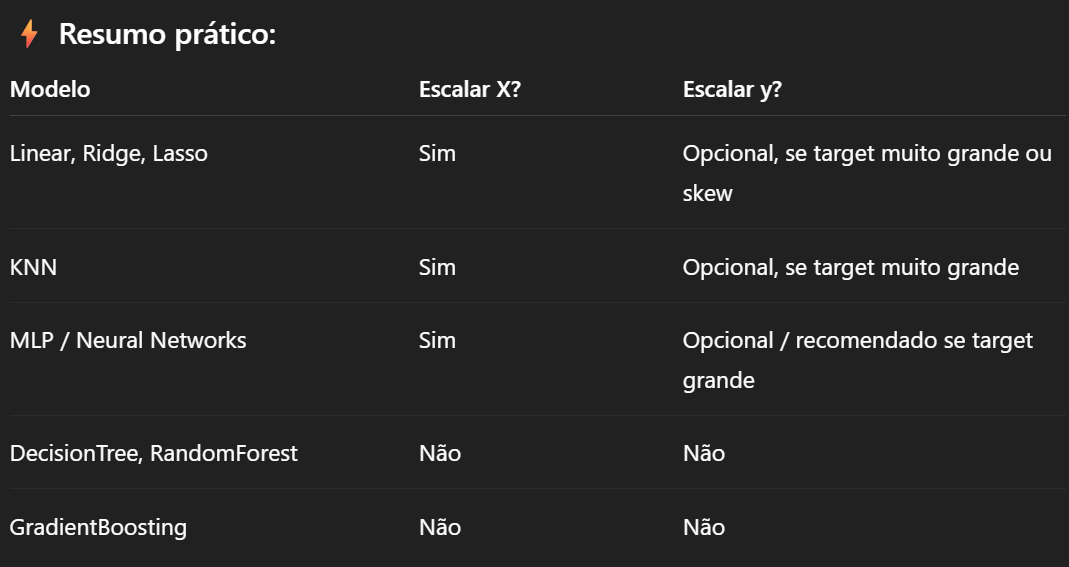

</div>


In [ ]:
# PARA QUANDO FORMOS VER CORRELAÇÕES JÁ TEMOS ESTES INSIGHTS
# It is peculiar that enginesize is slightly negatively correlated with mpg
# Tax and engingesize positively correlated as expected
# Tax and mpg negatively (contrary to what expected), same as for eginesize vs mpg
# Price and tax positively correlated as expected (extra tax above a threshold of price aka luxury tax)
## Nonetheless, the below are negigible correlation values